3.6.9



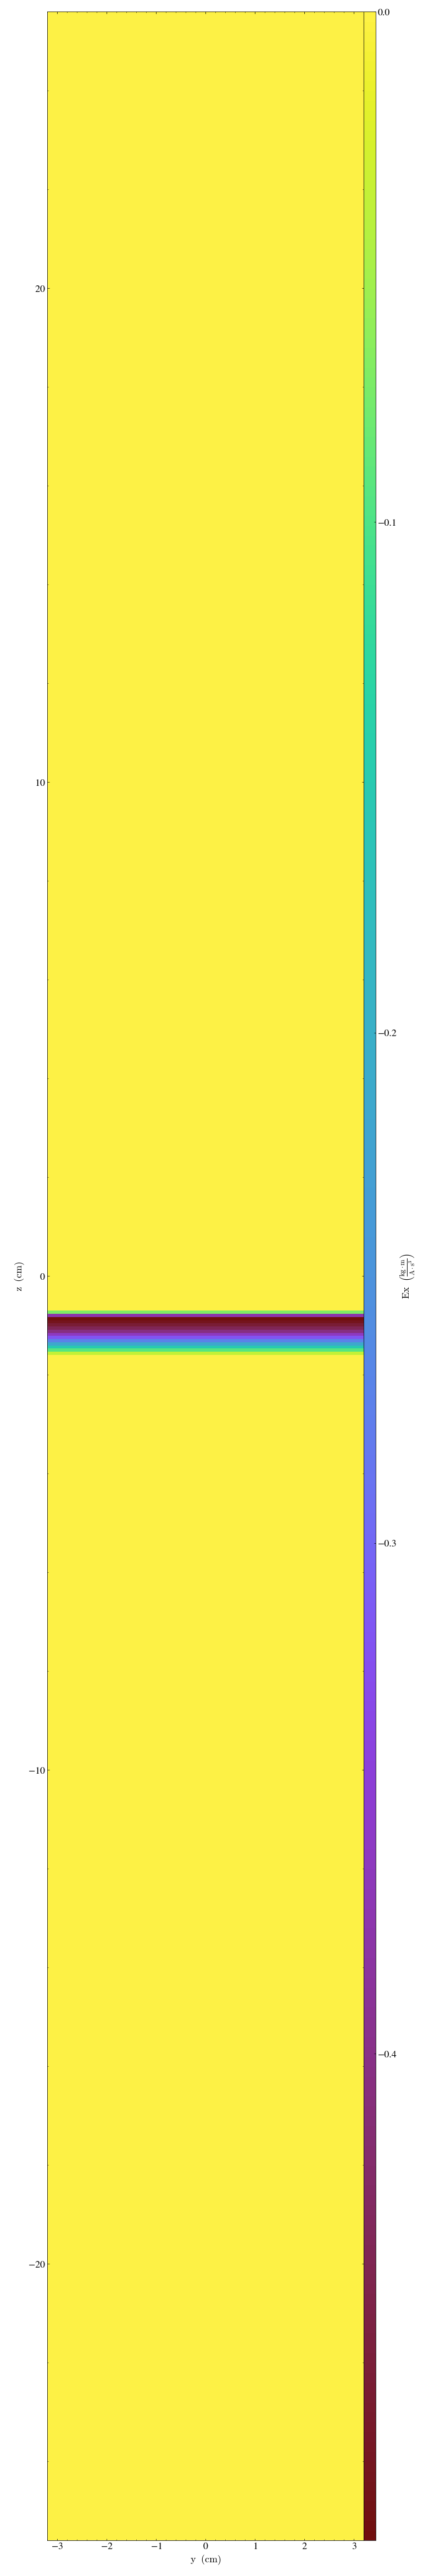


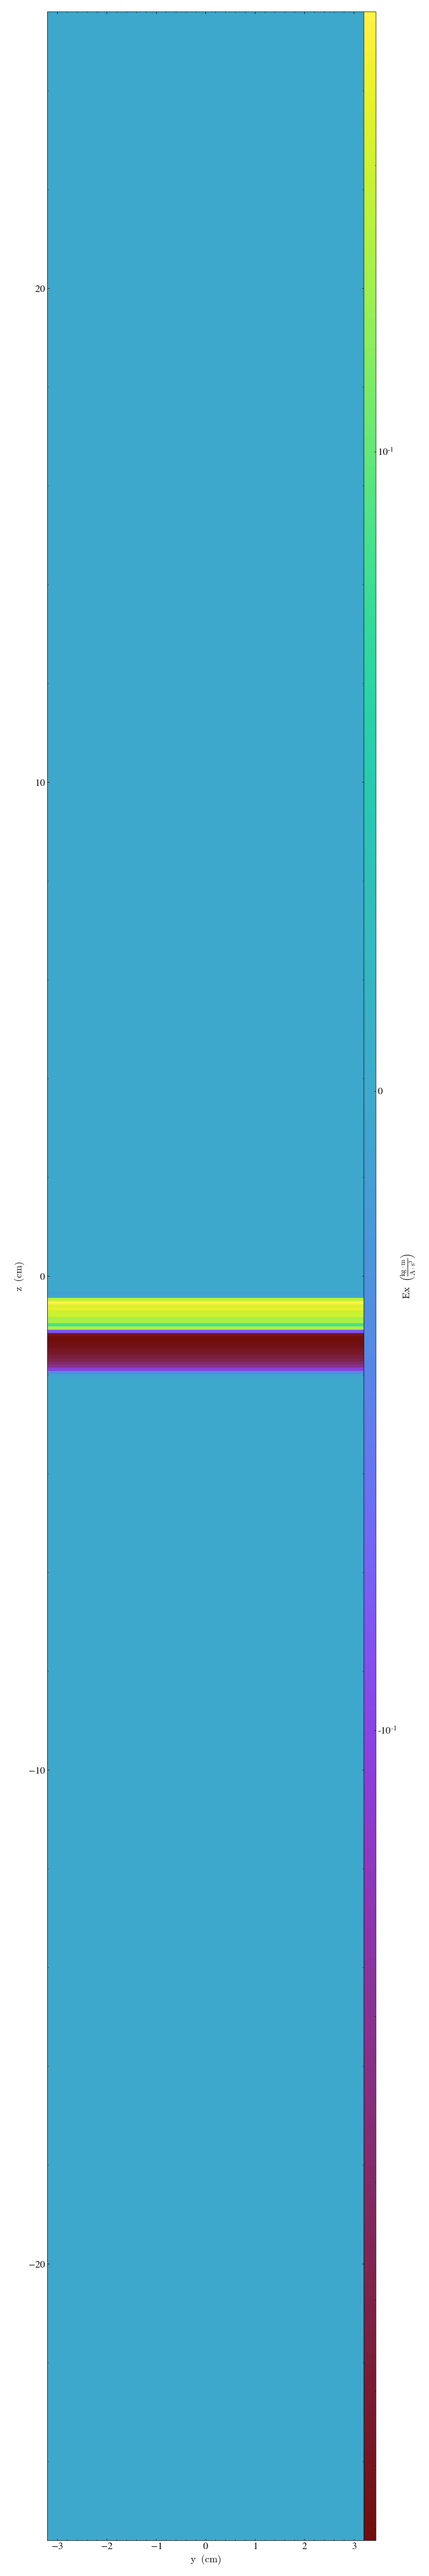


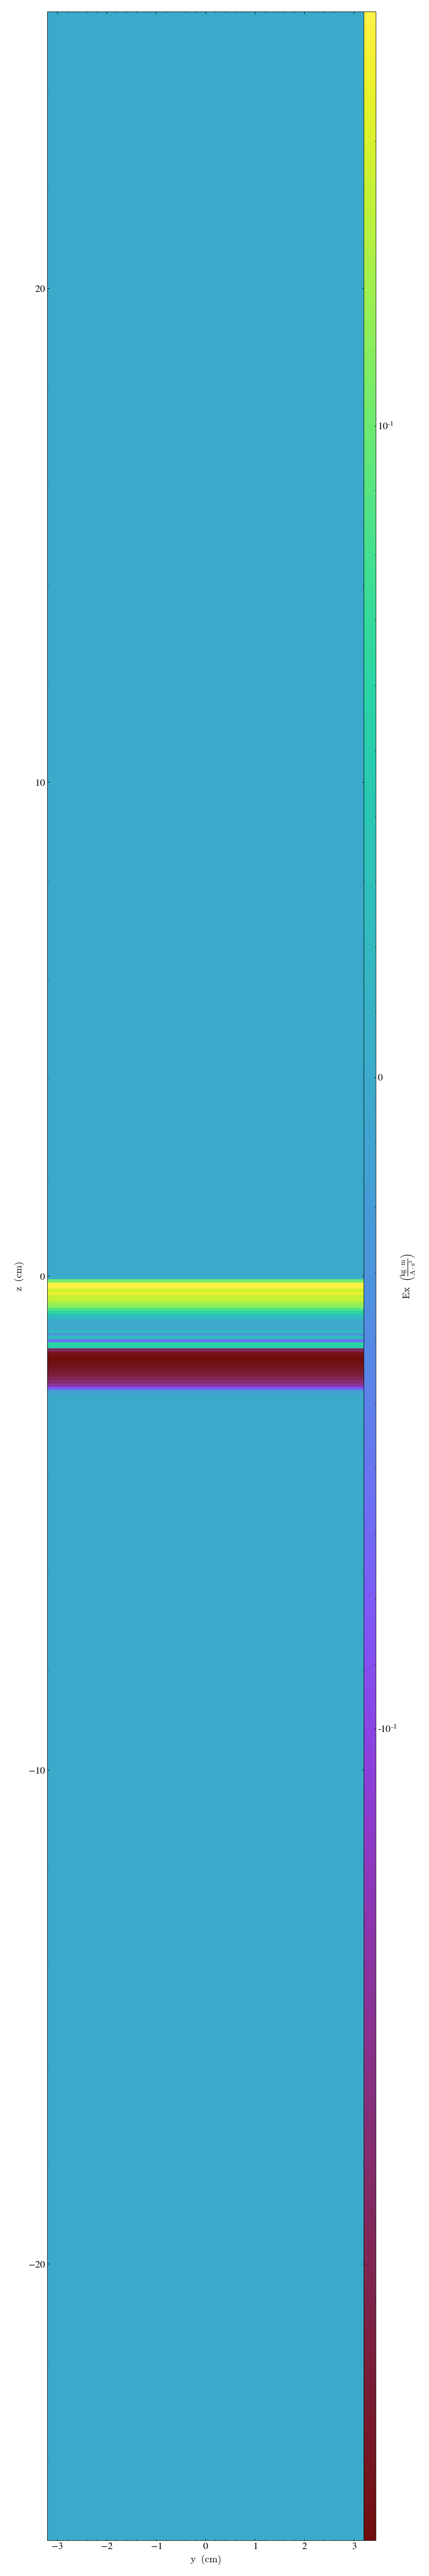


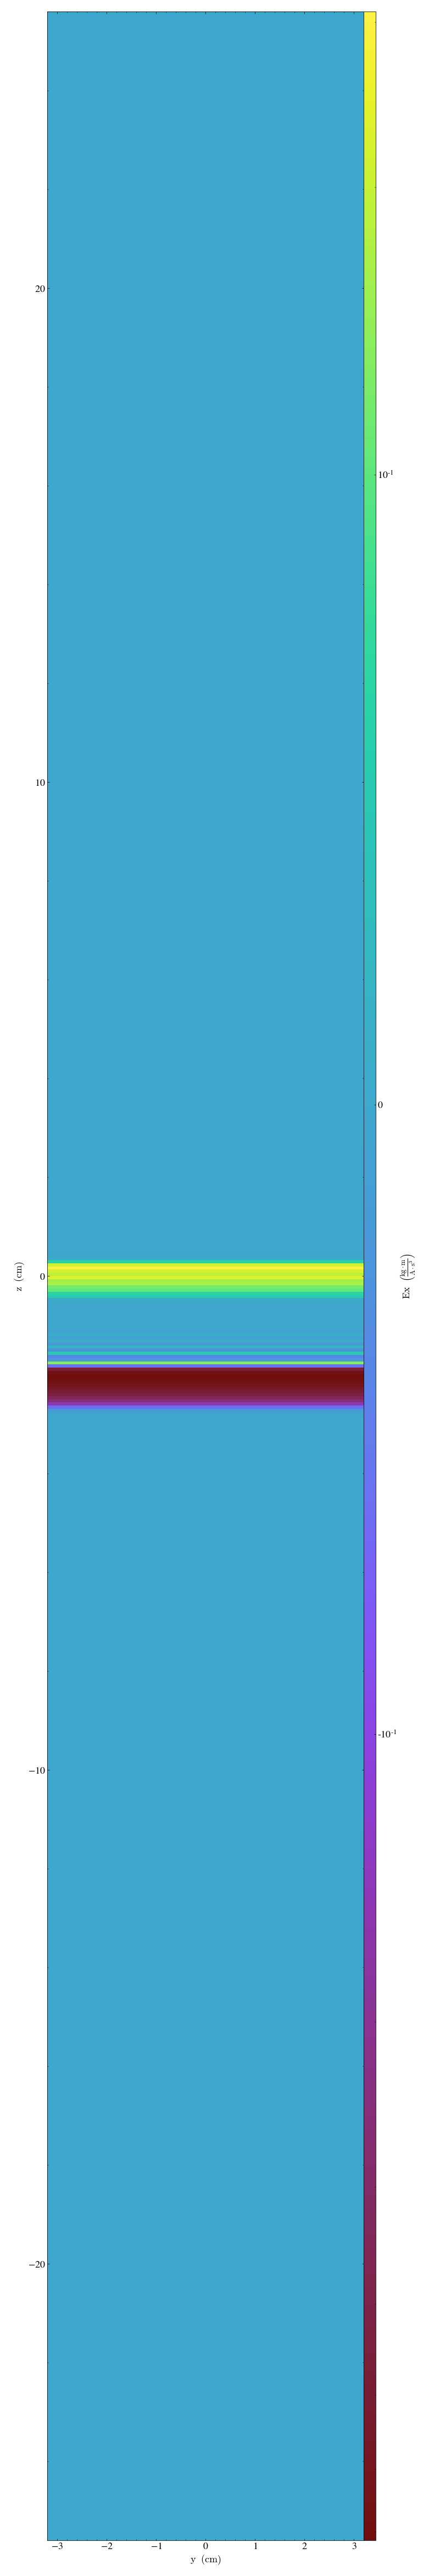


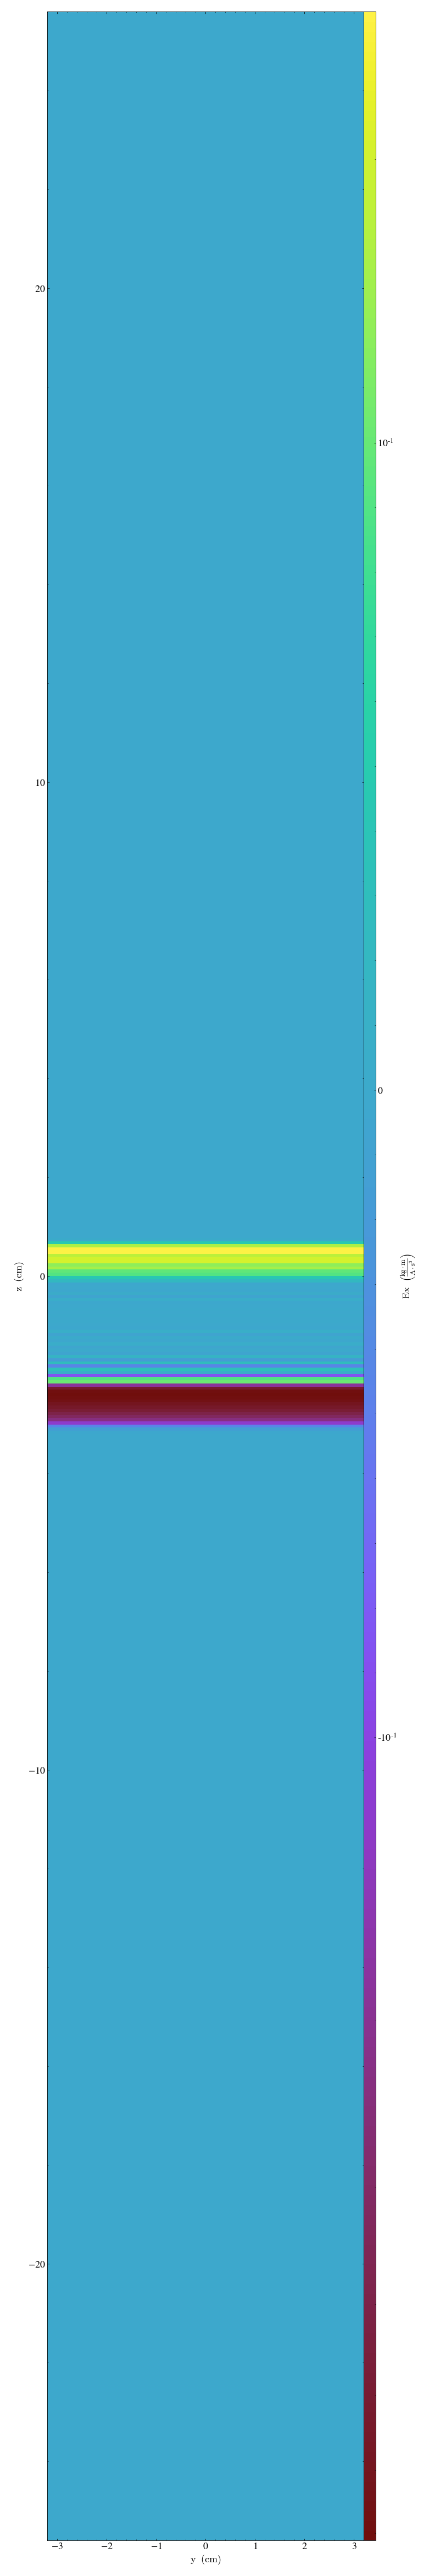


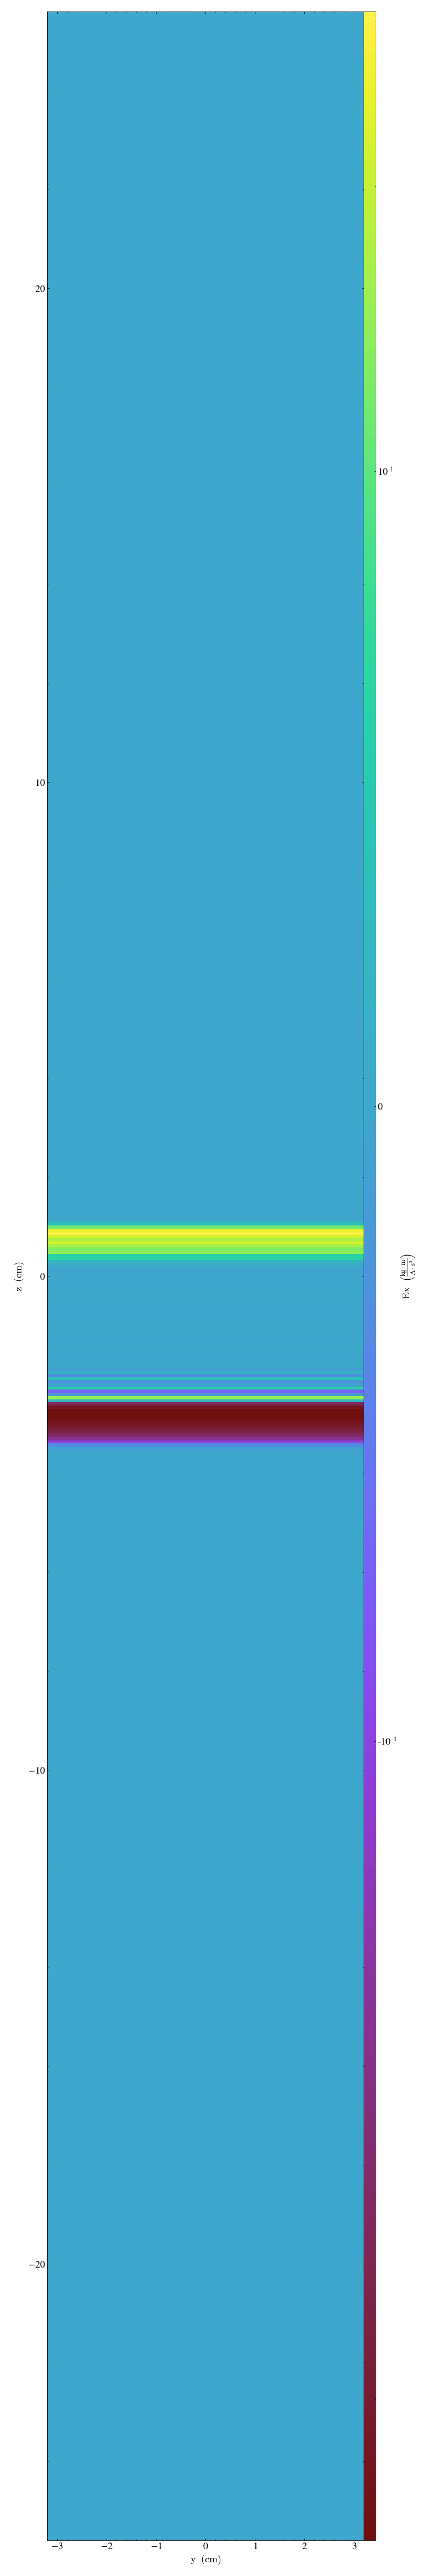


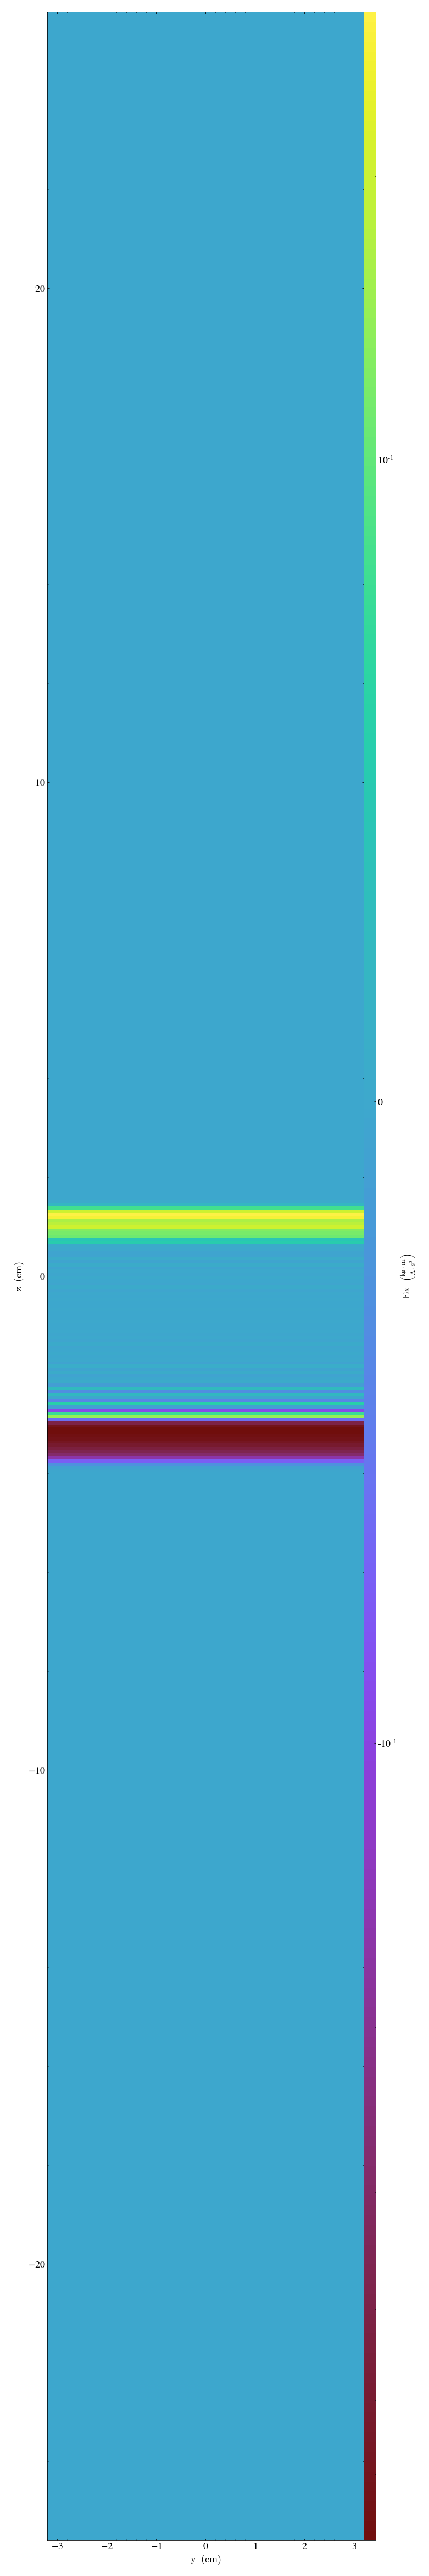


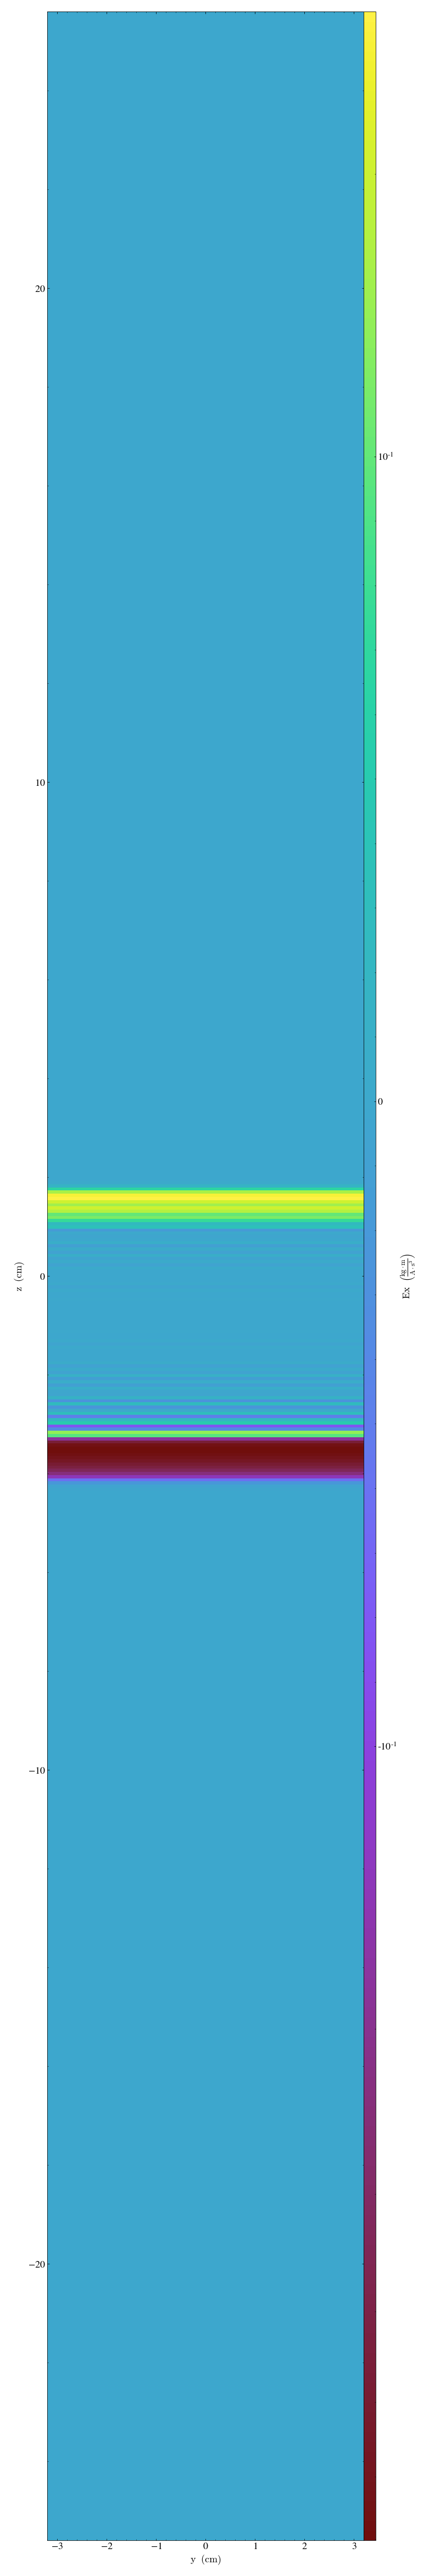


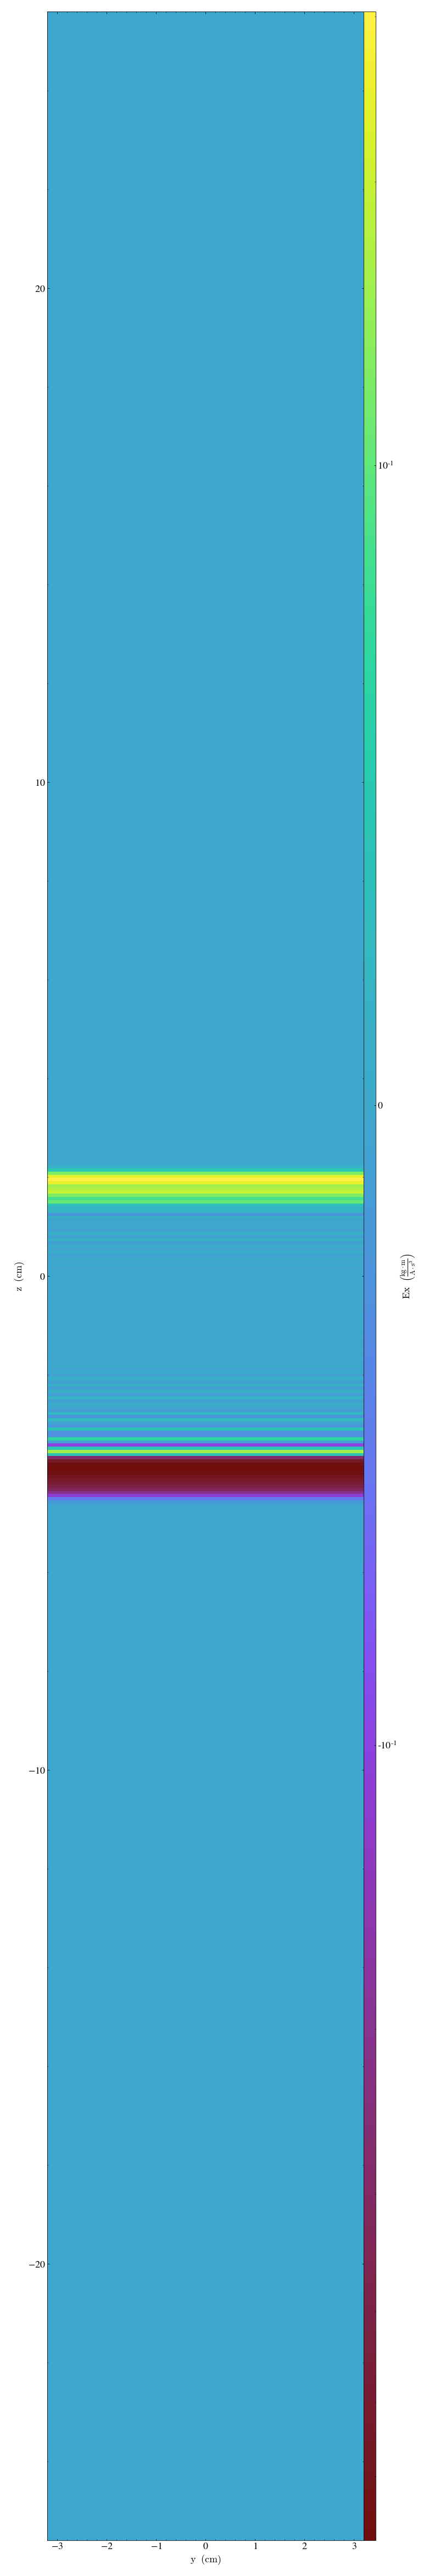


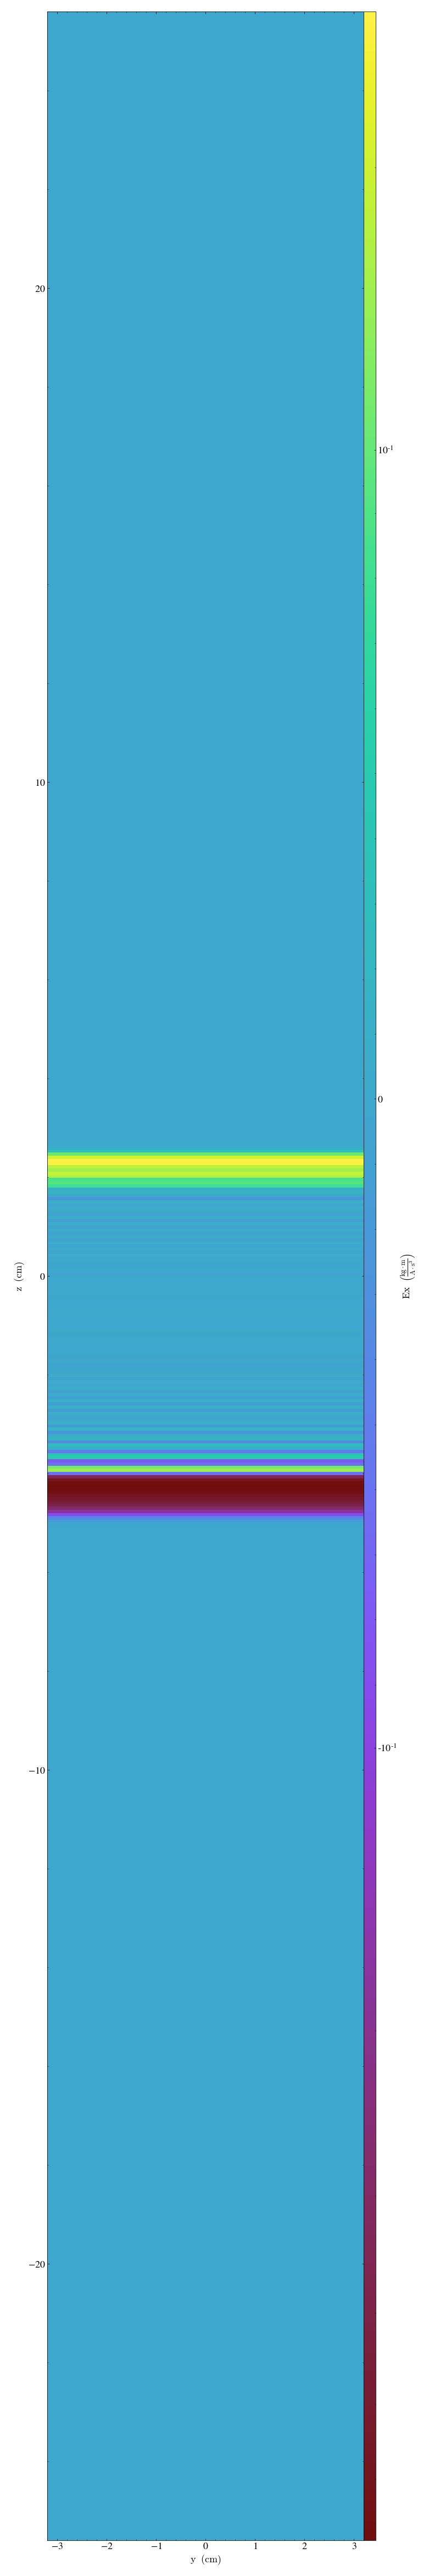


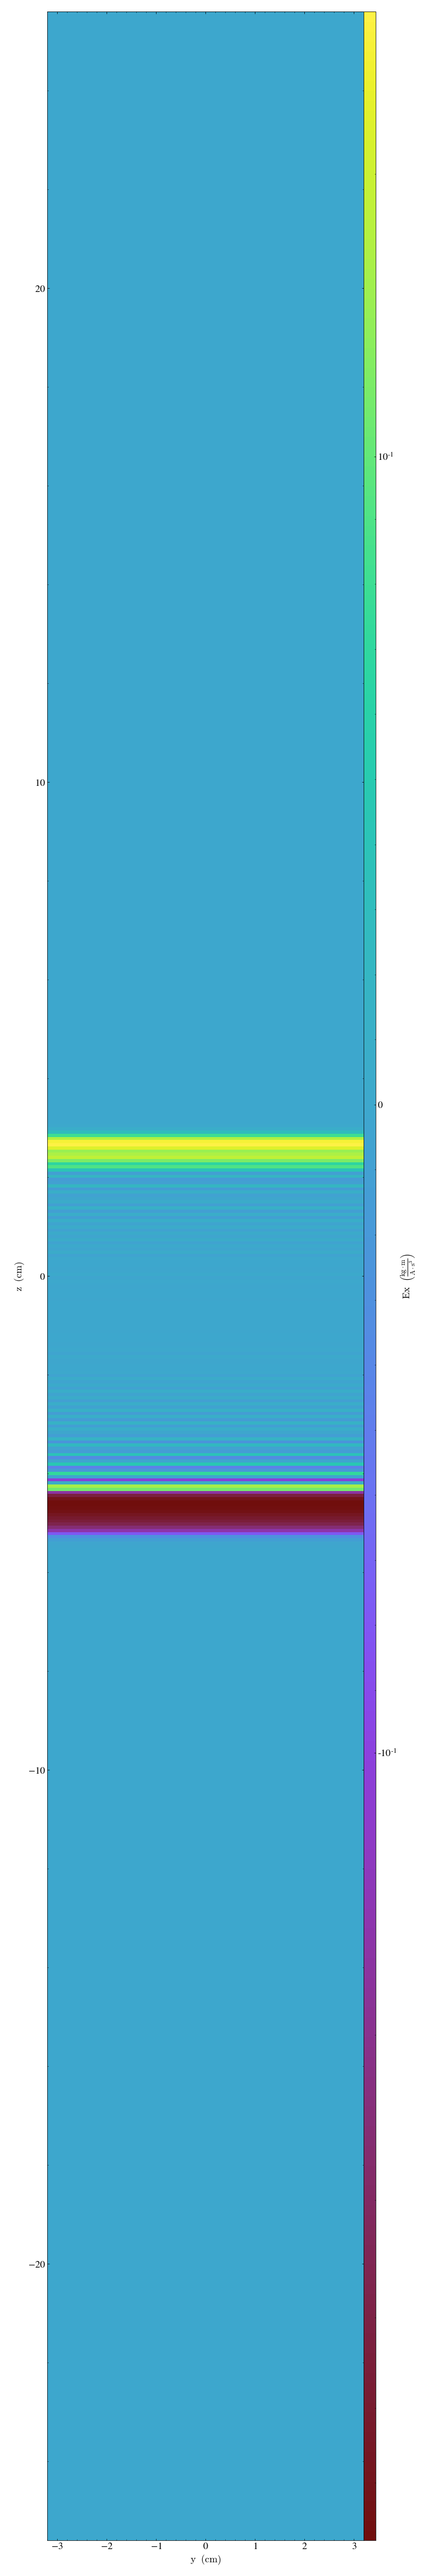


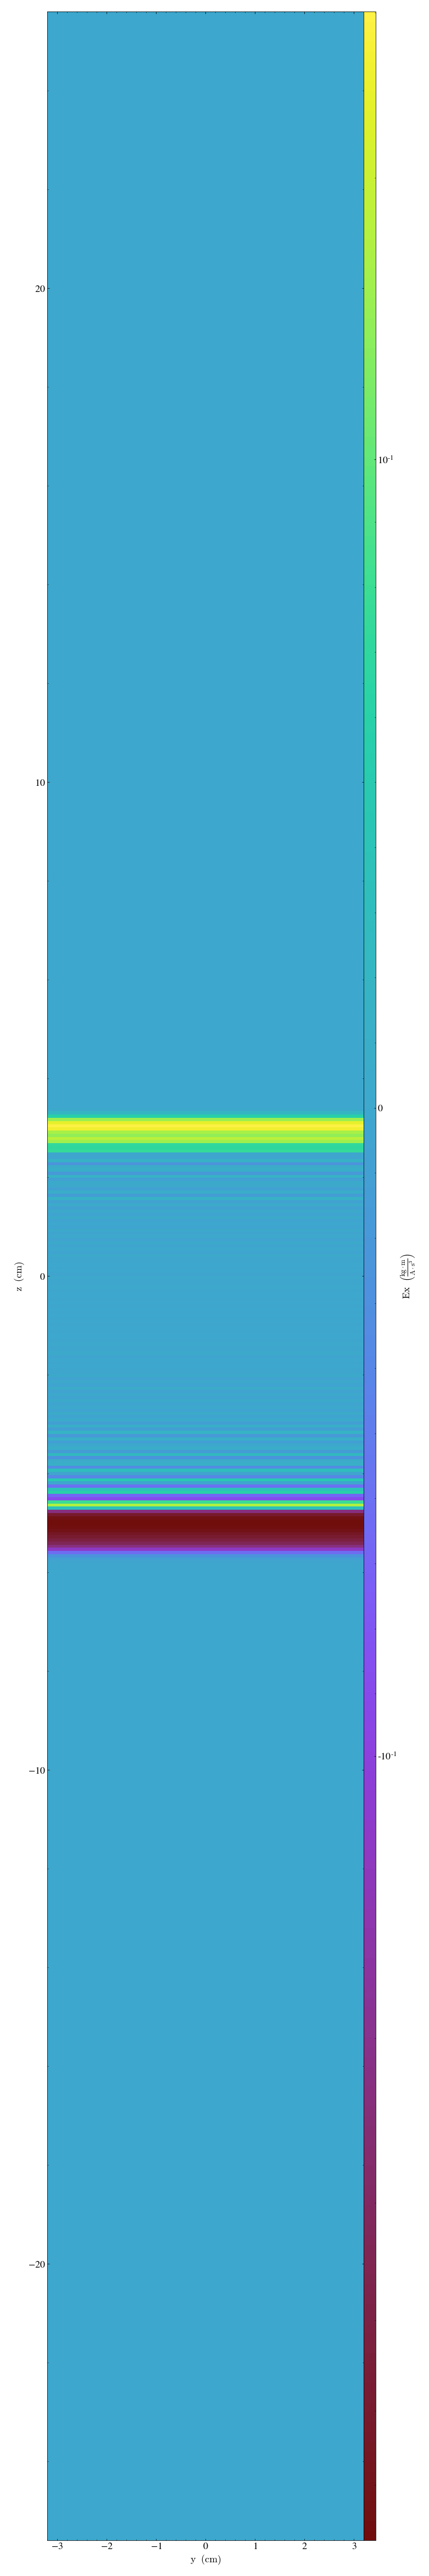


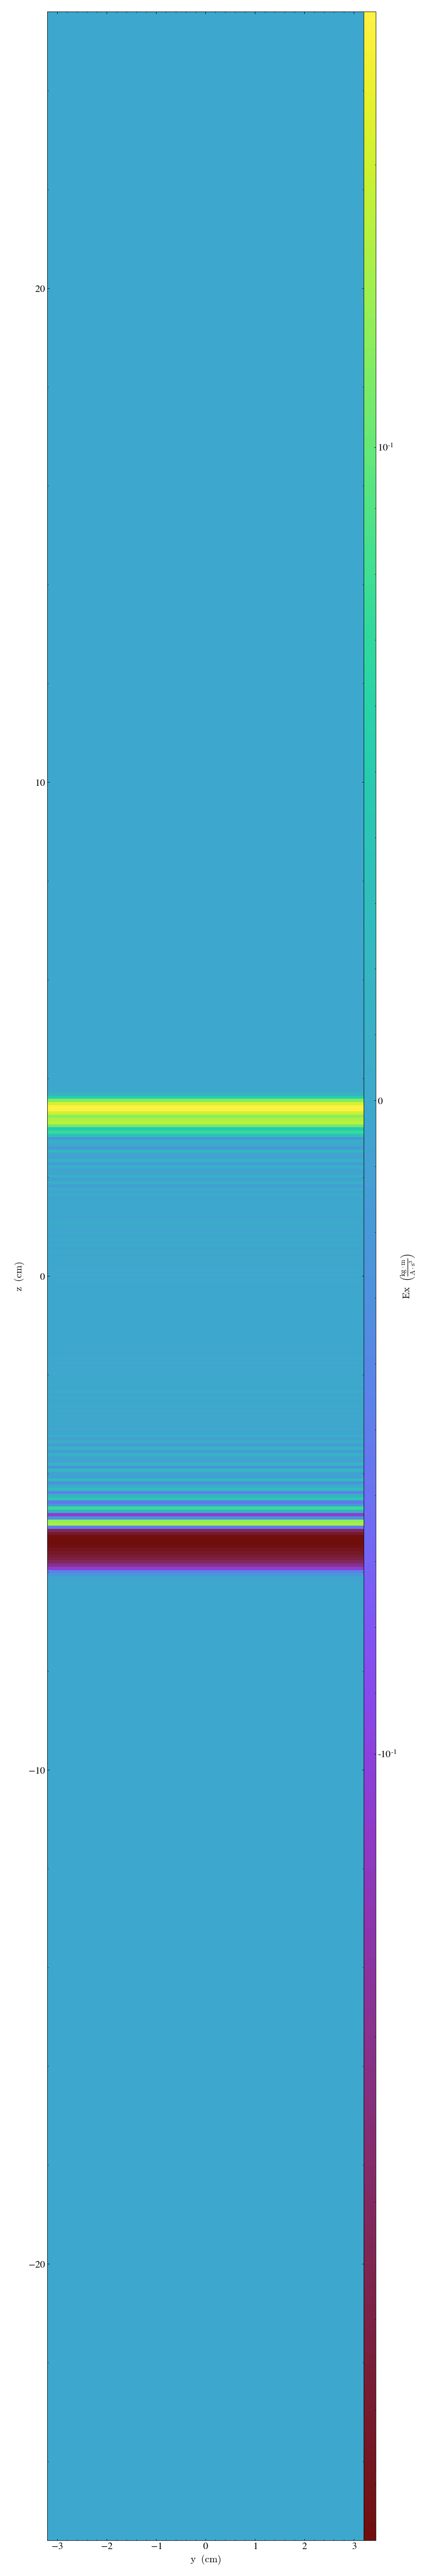


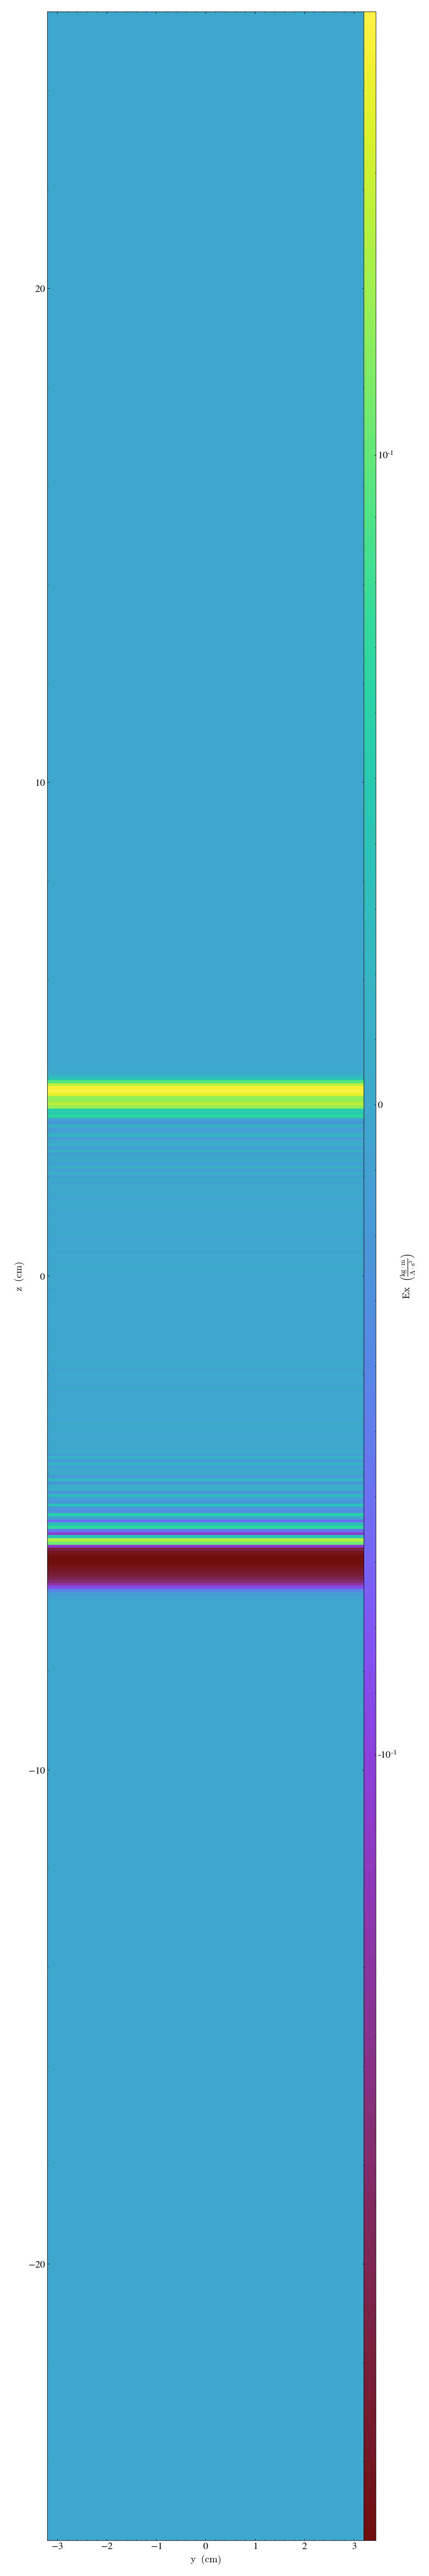


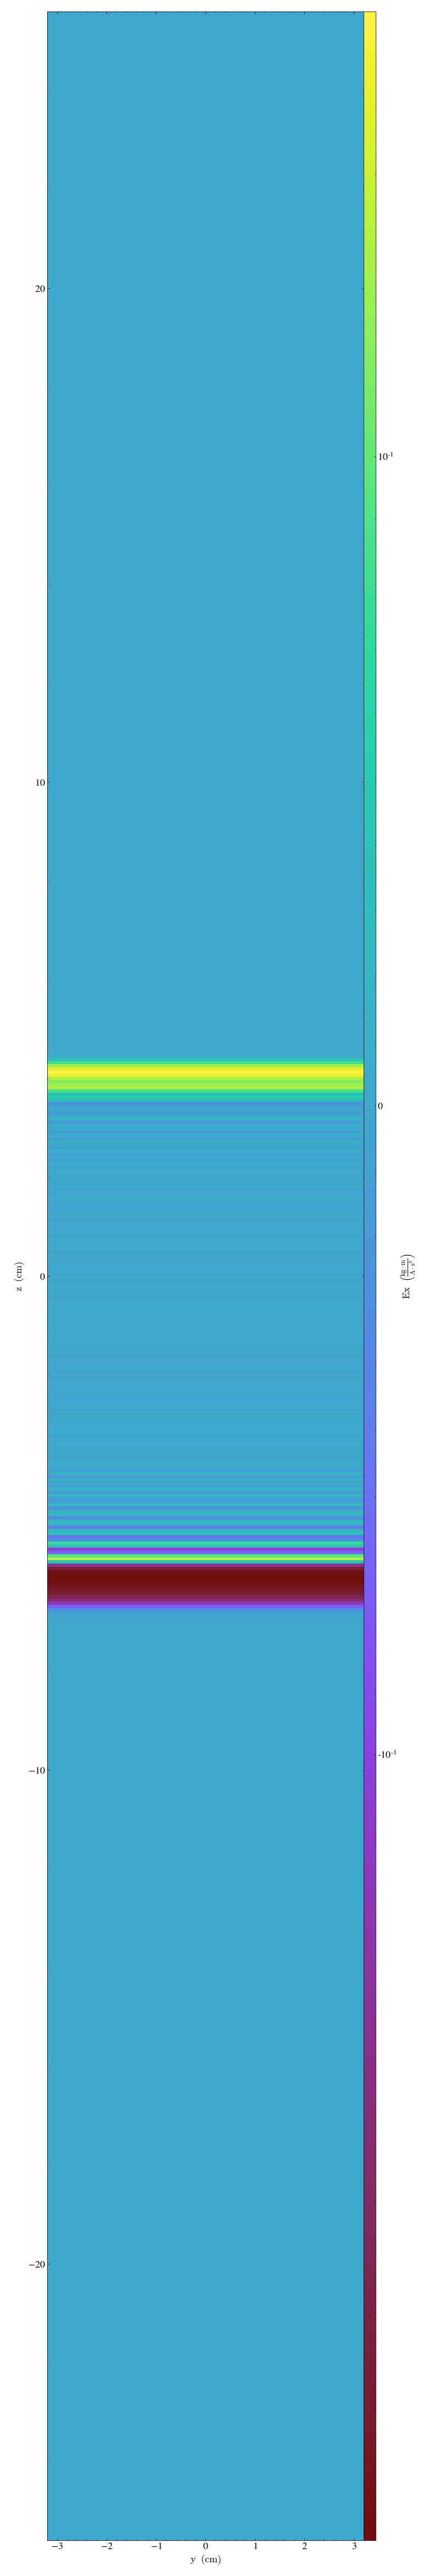


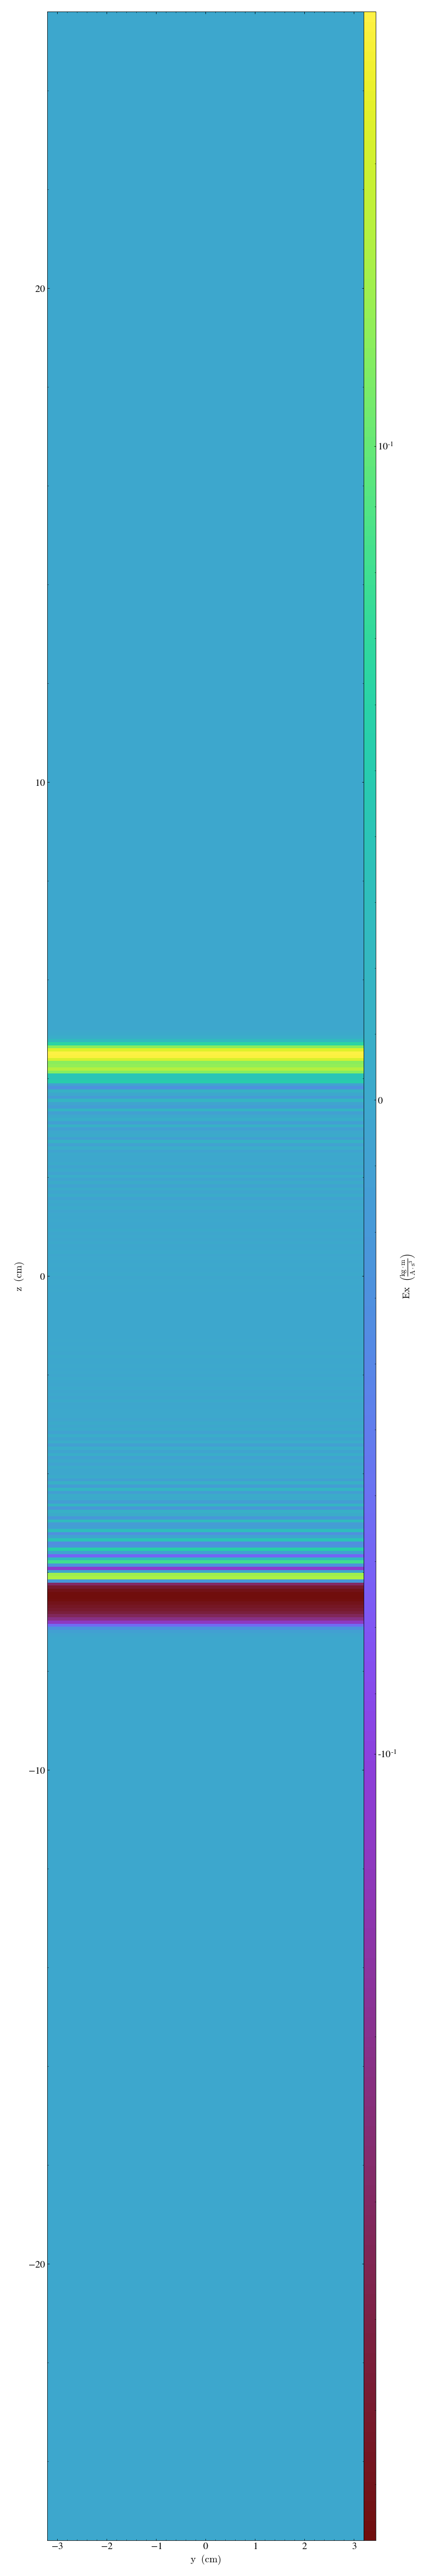


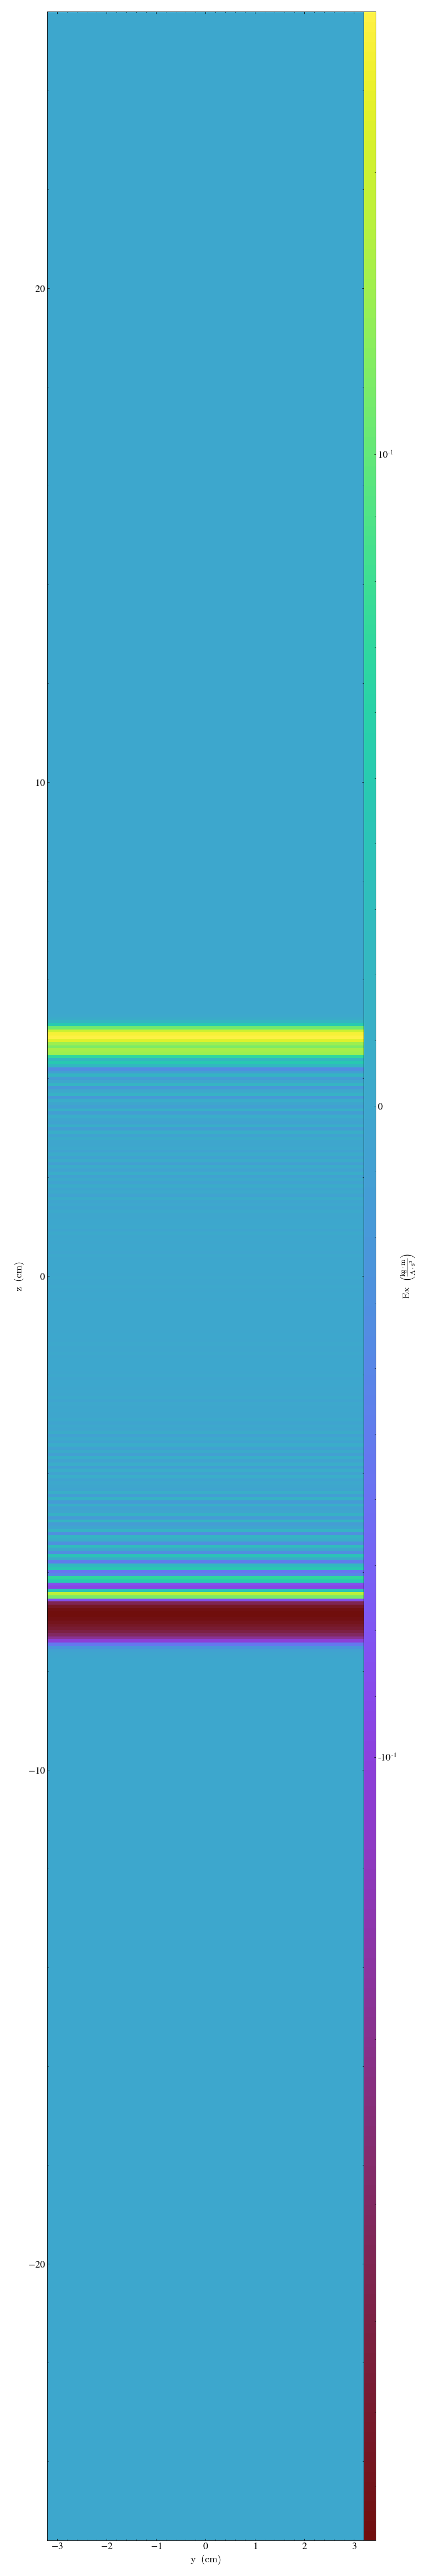


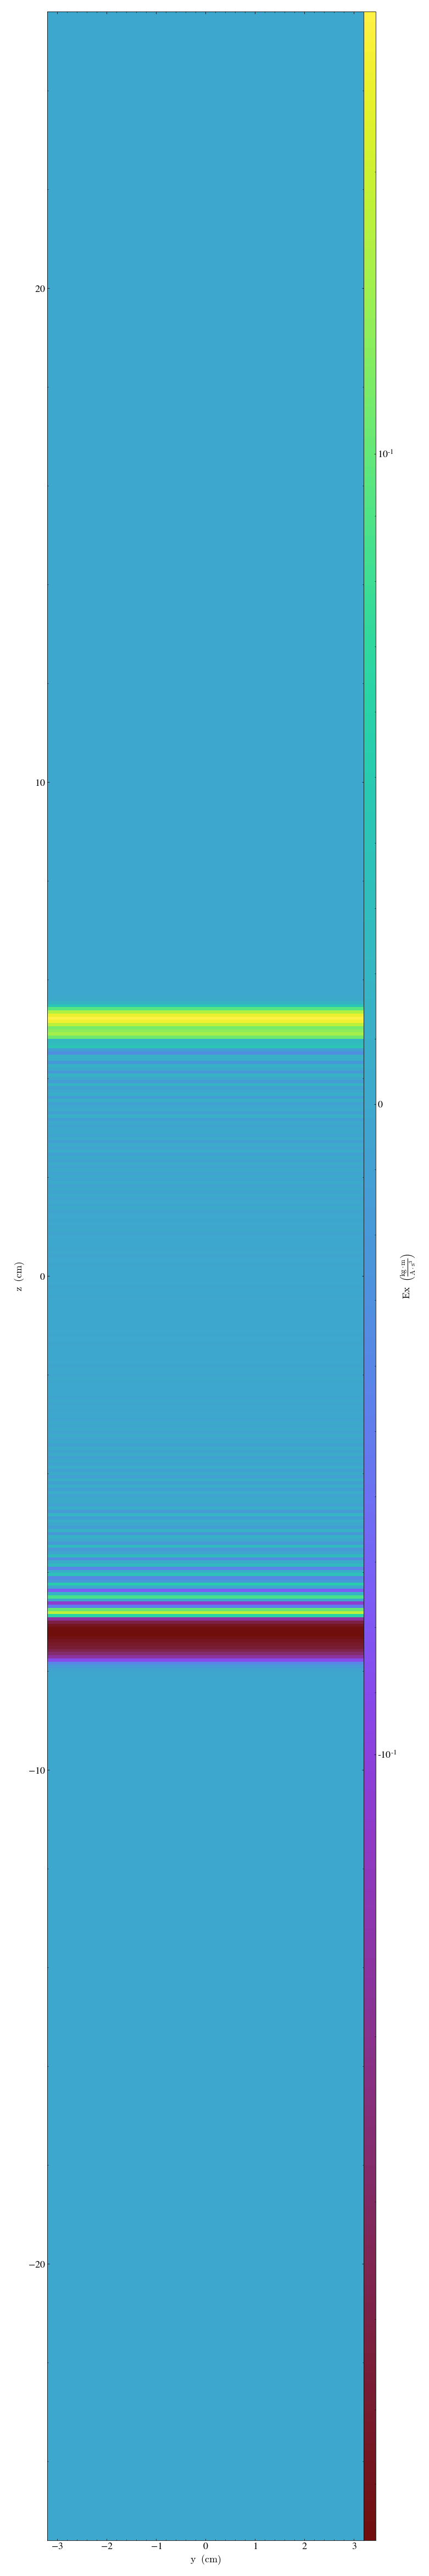


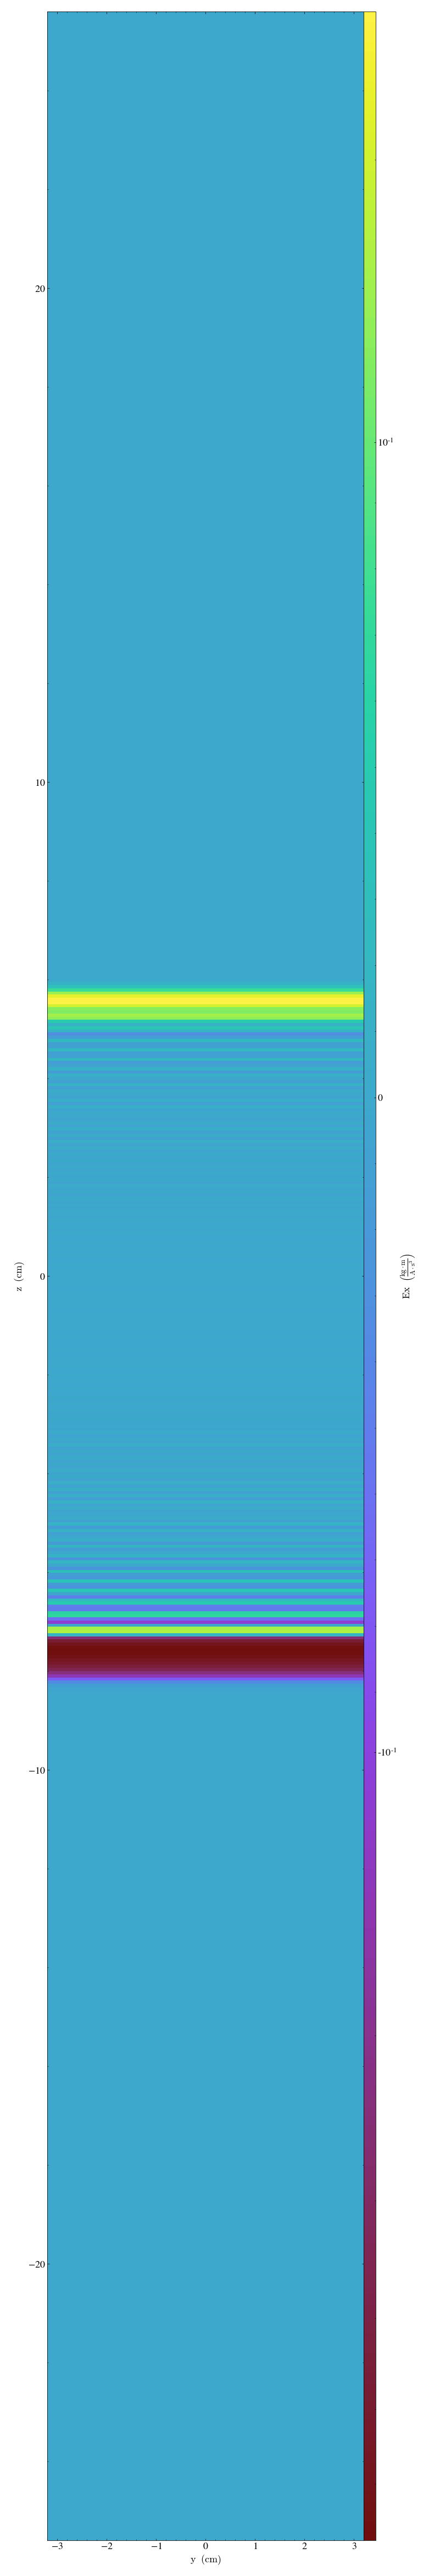


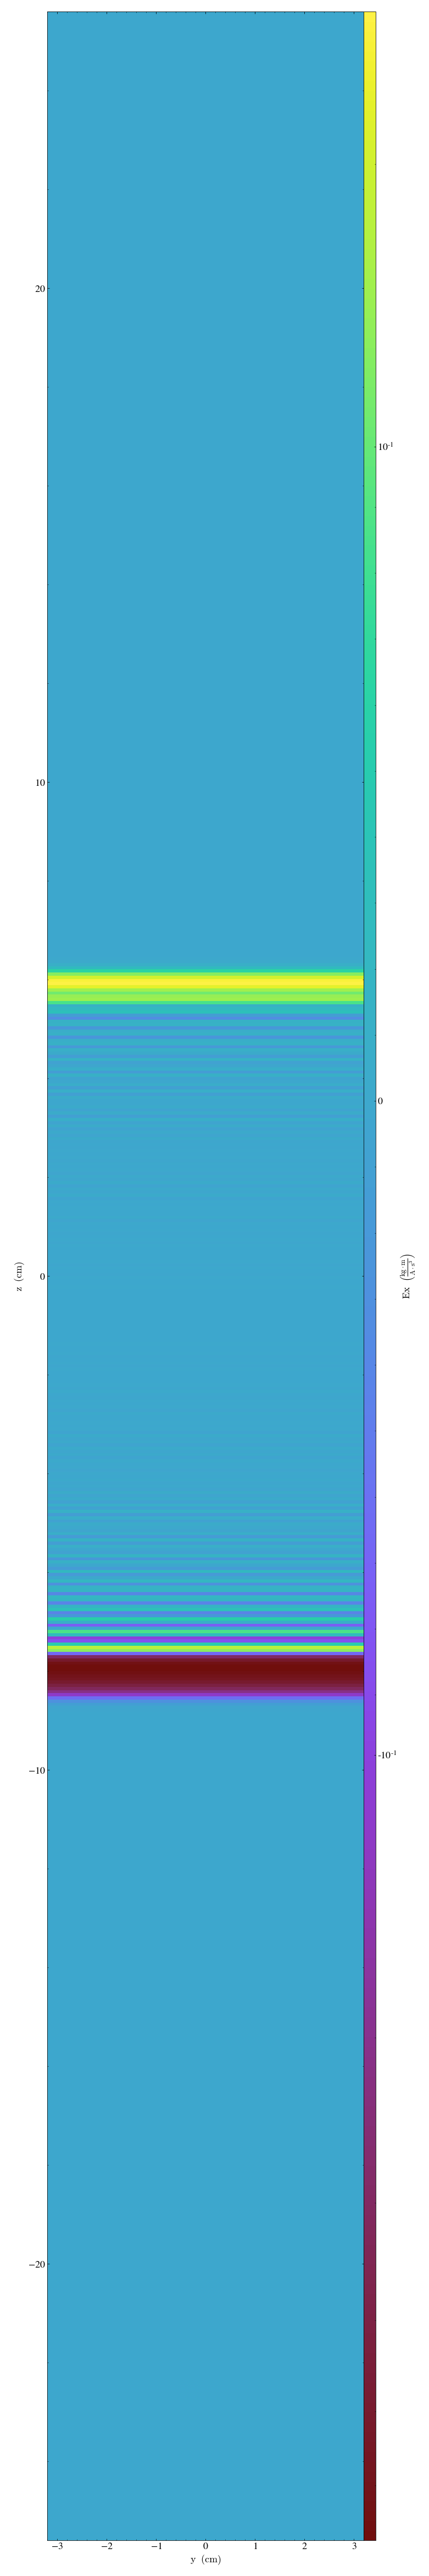


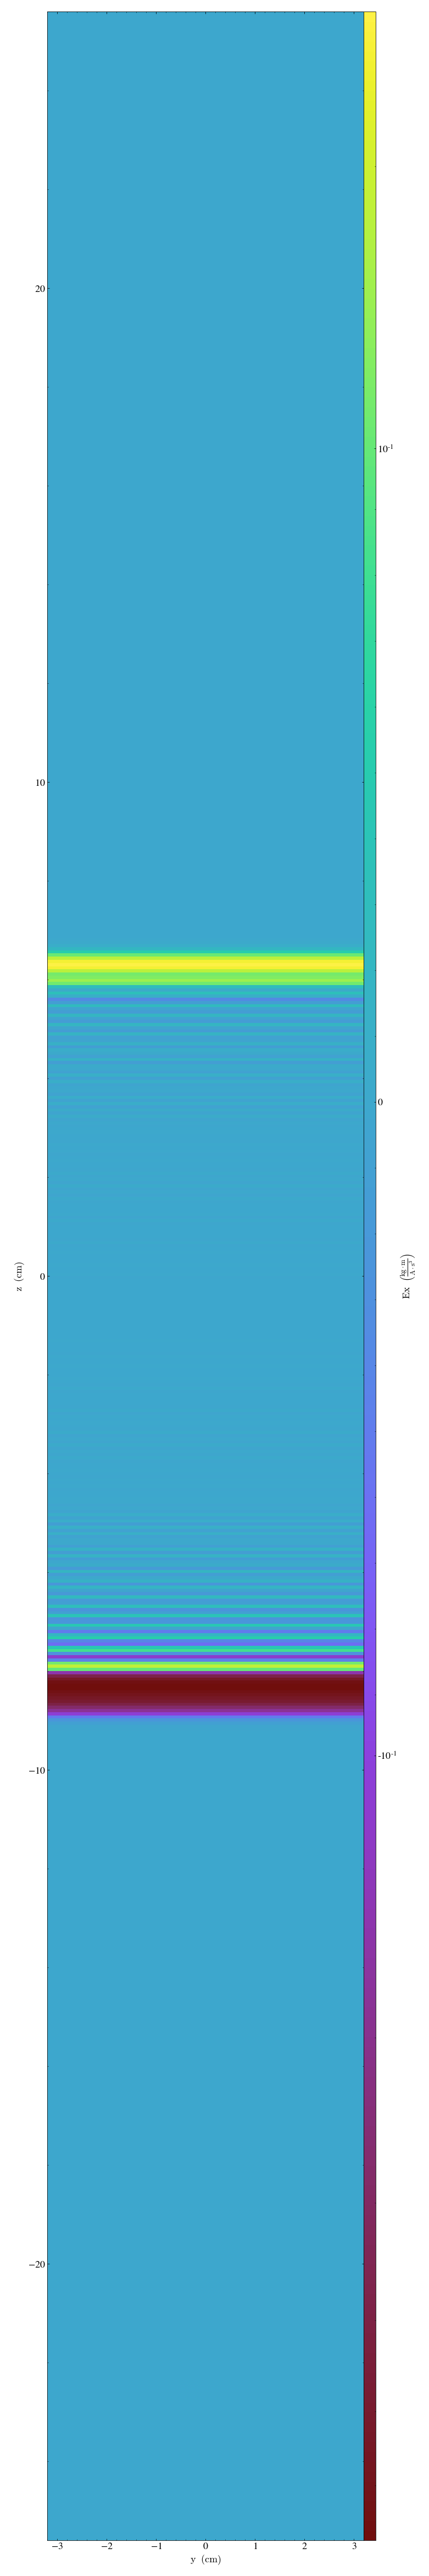


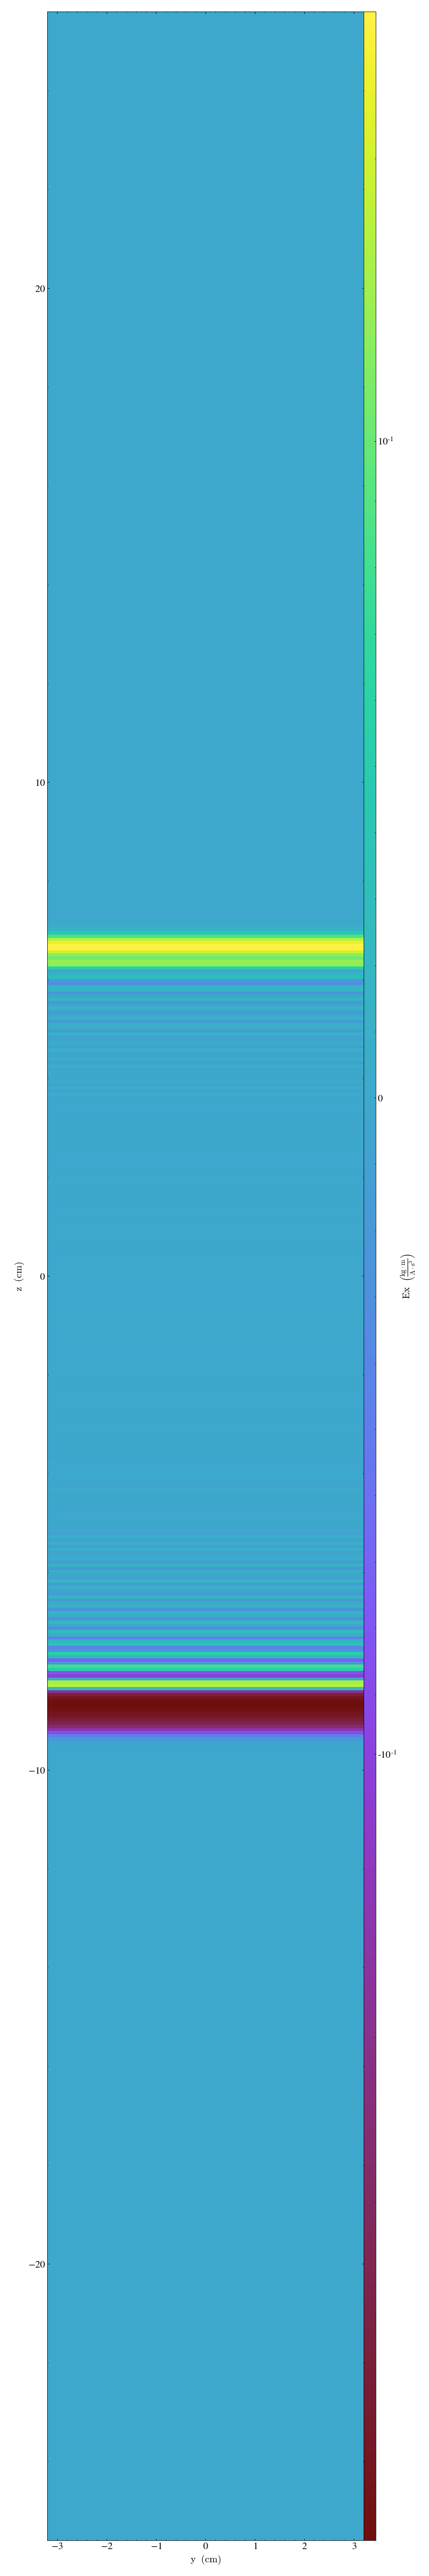


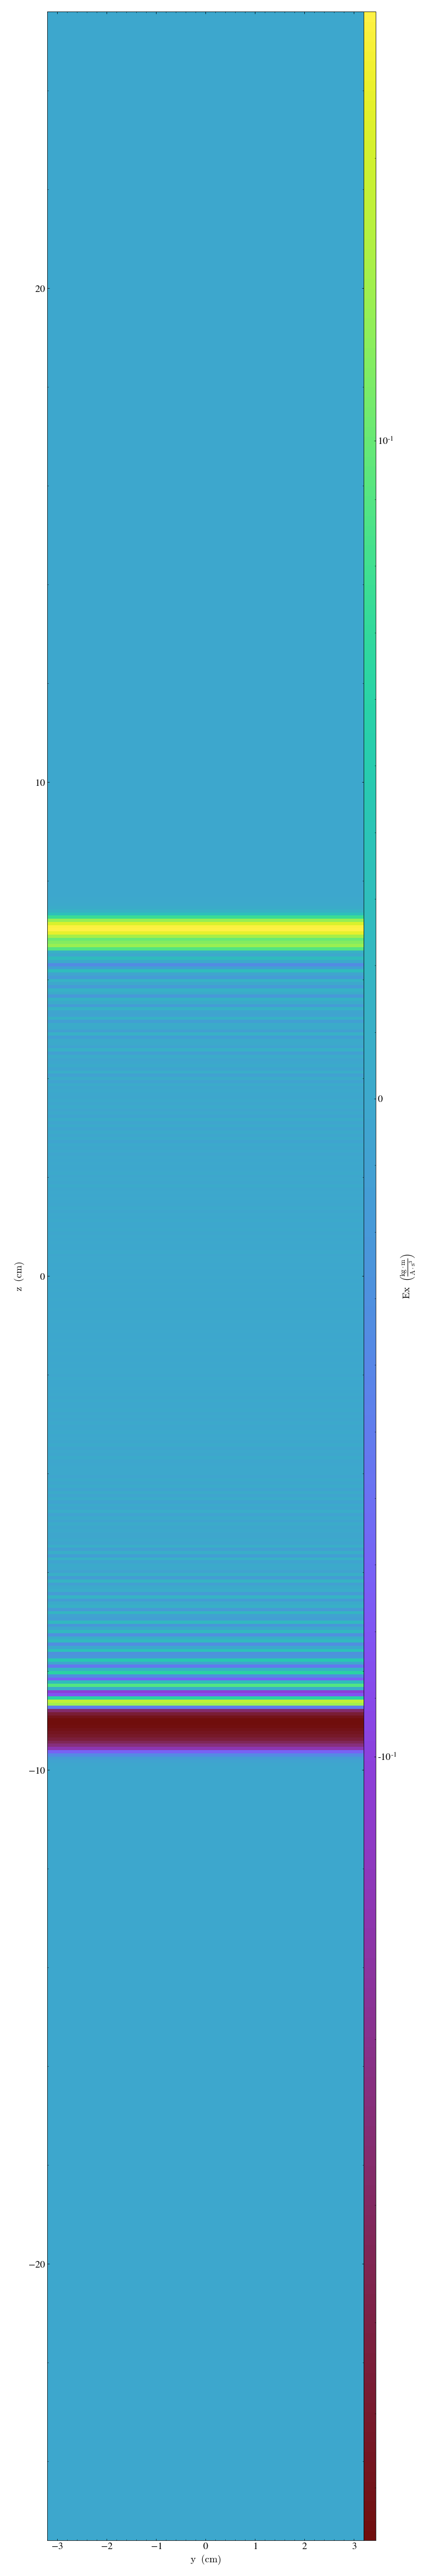


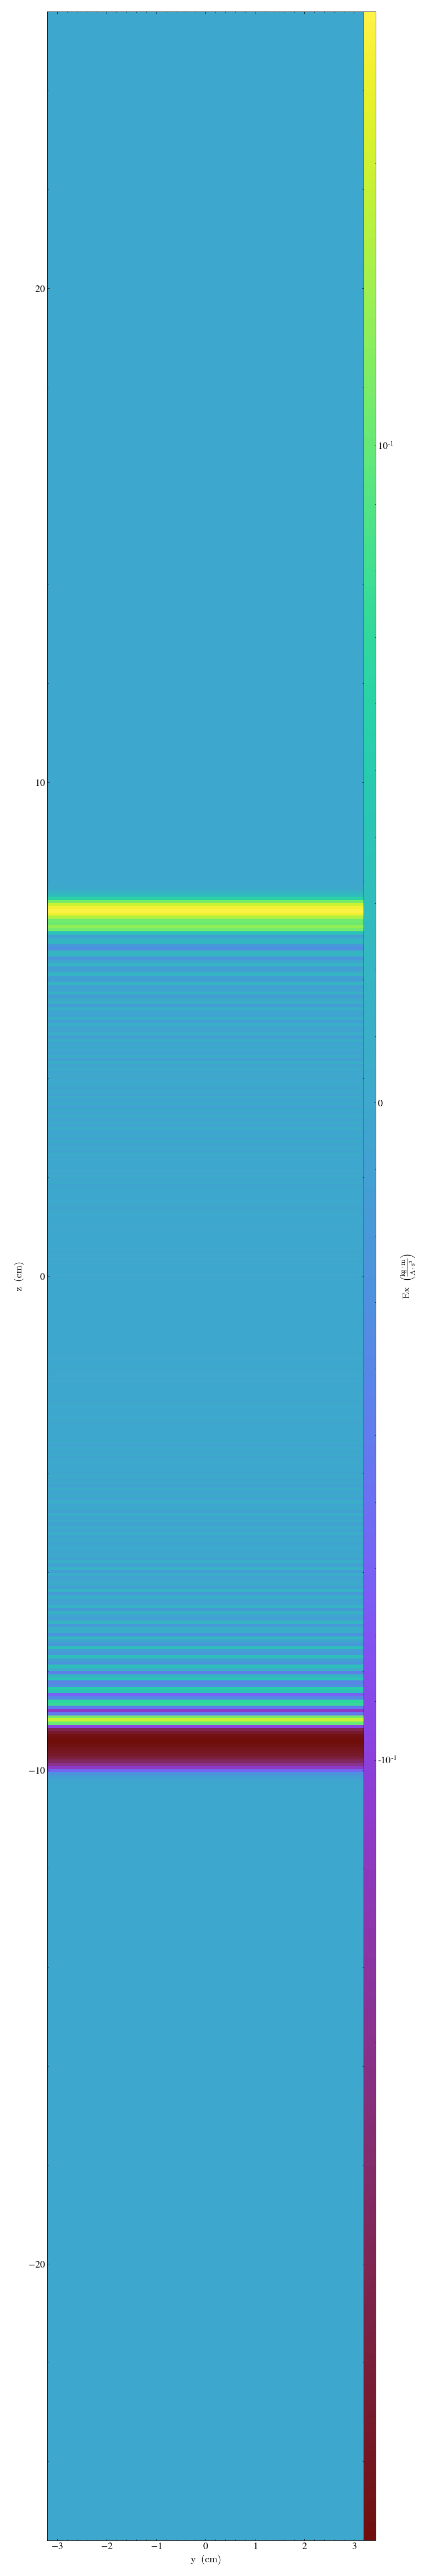


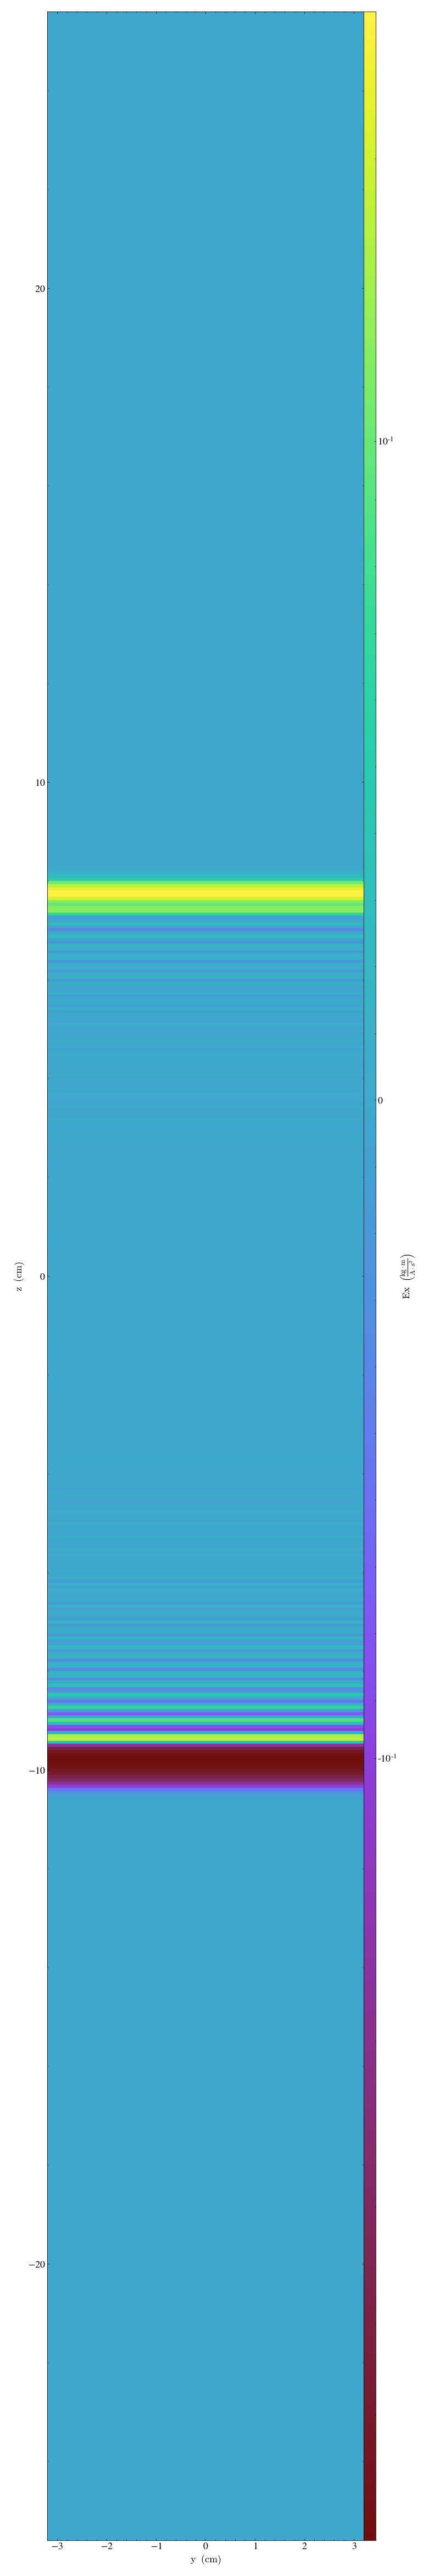


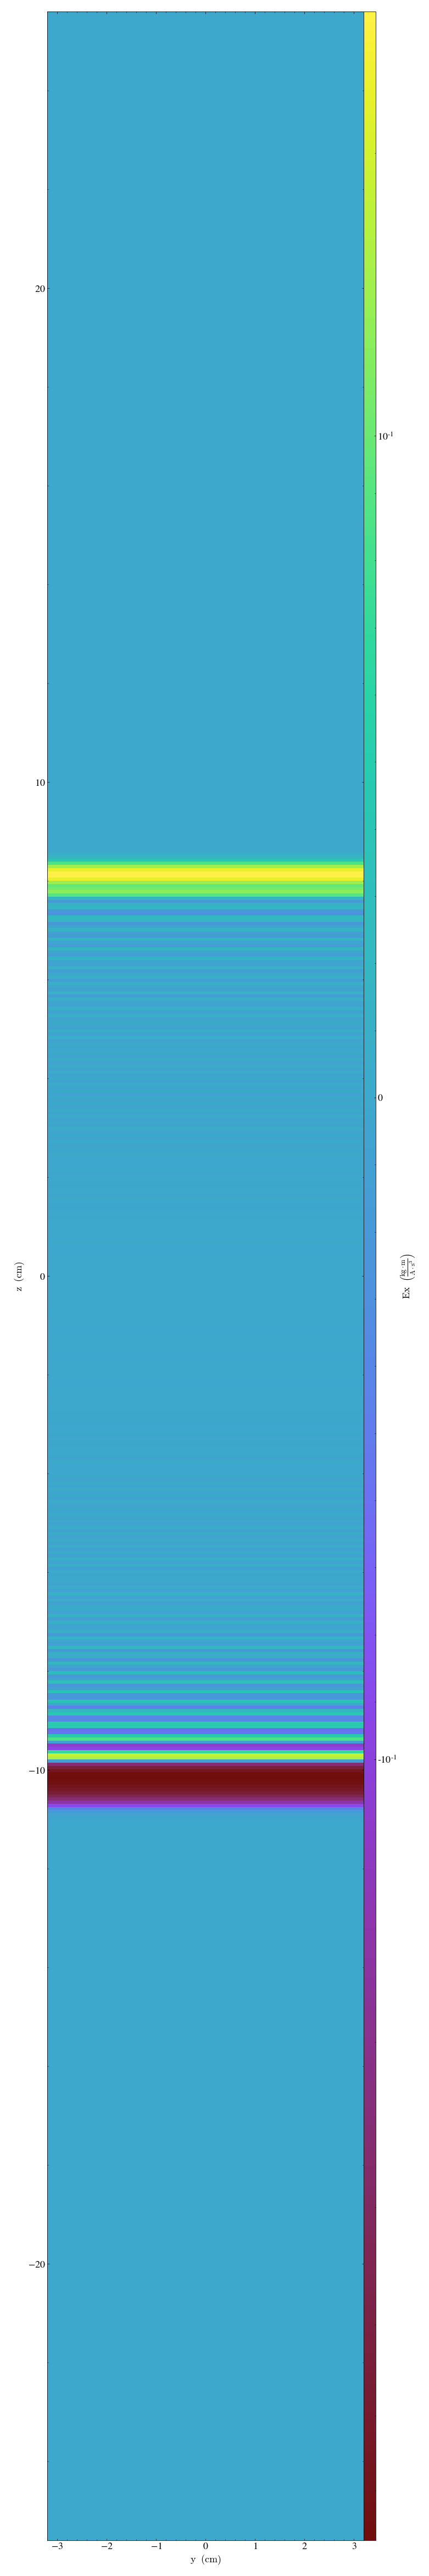


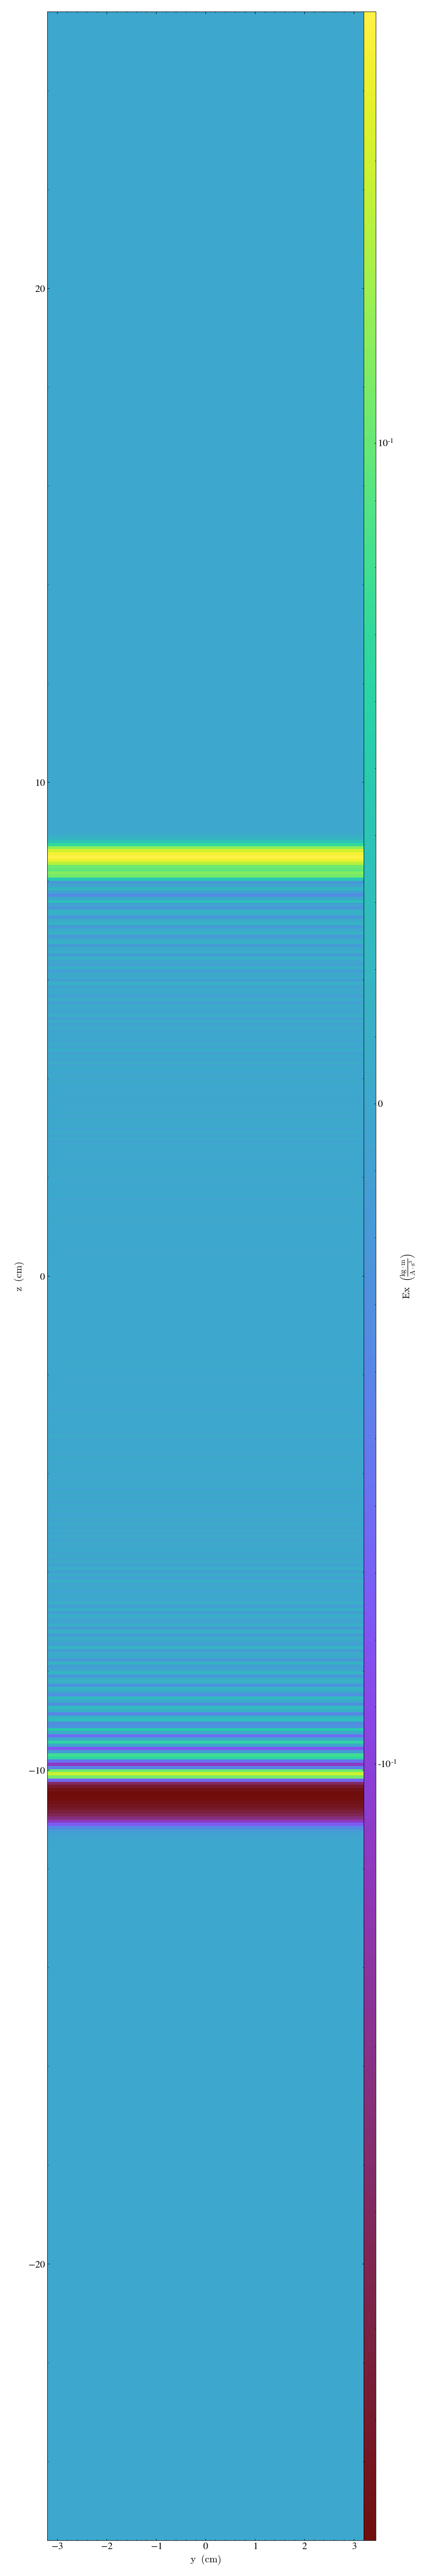


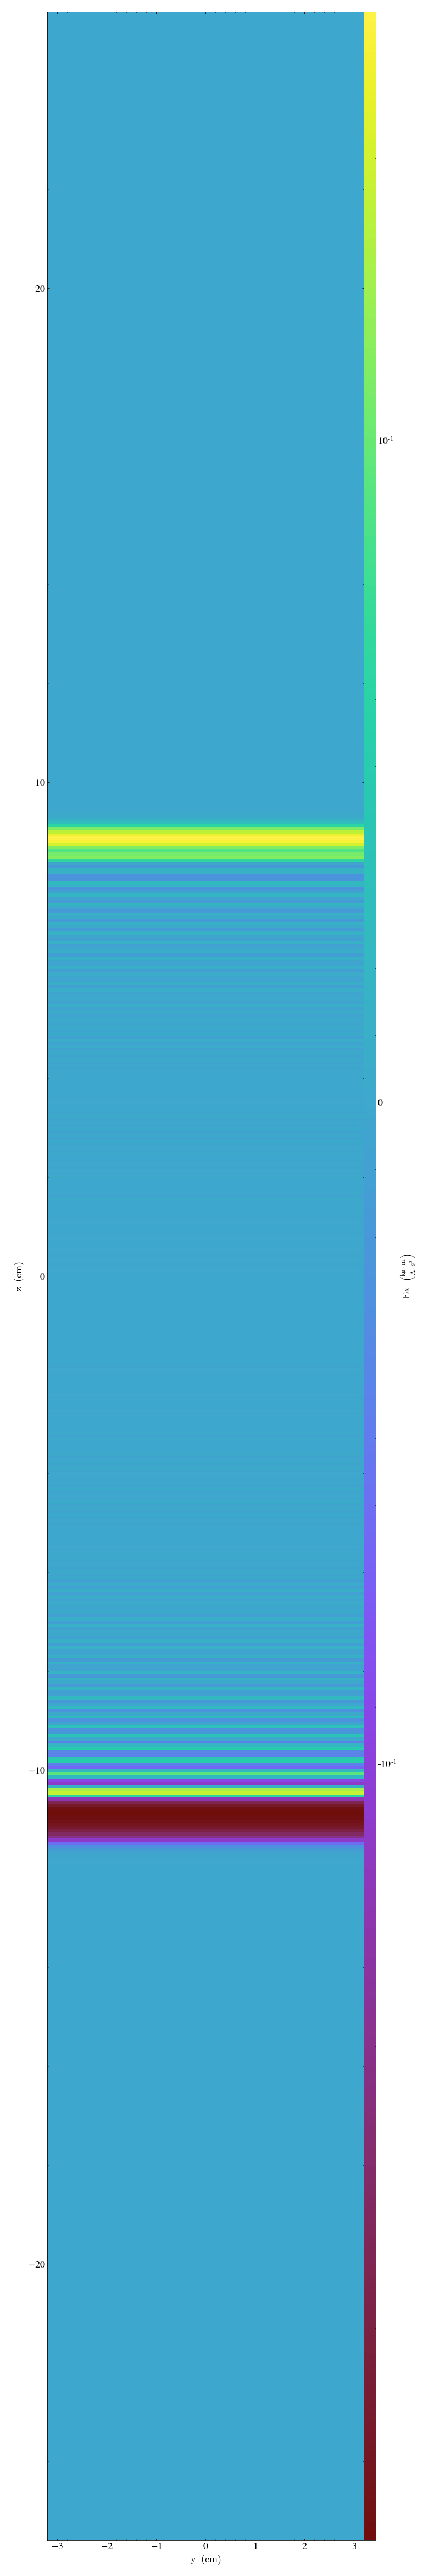


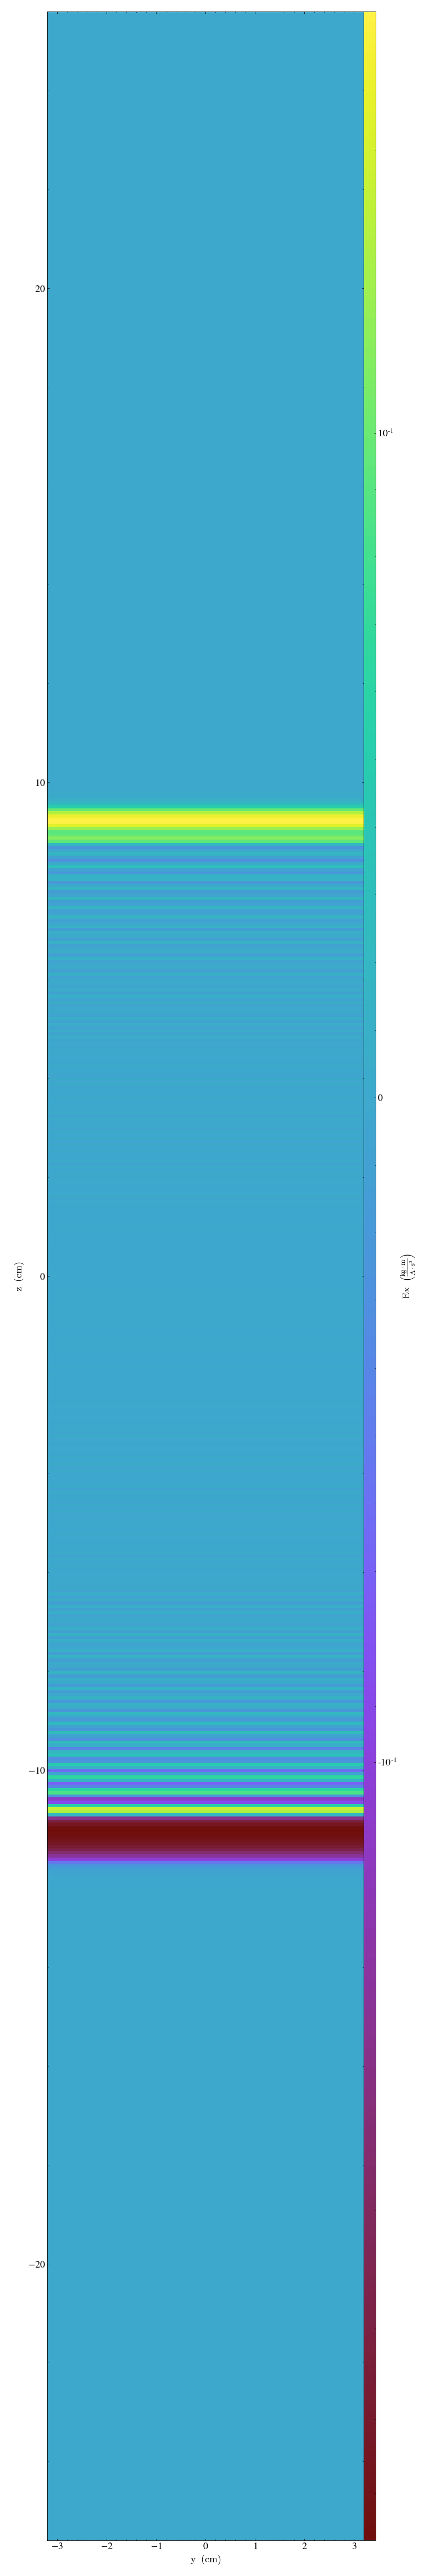


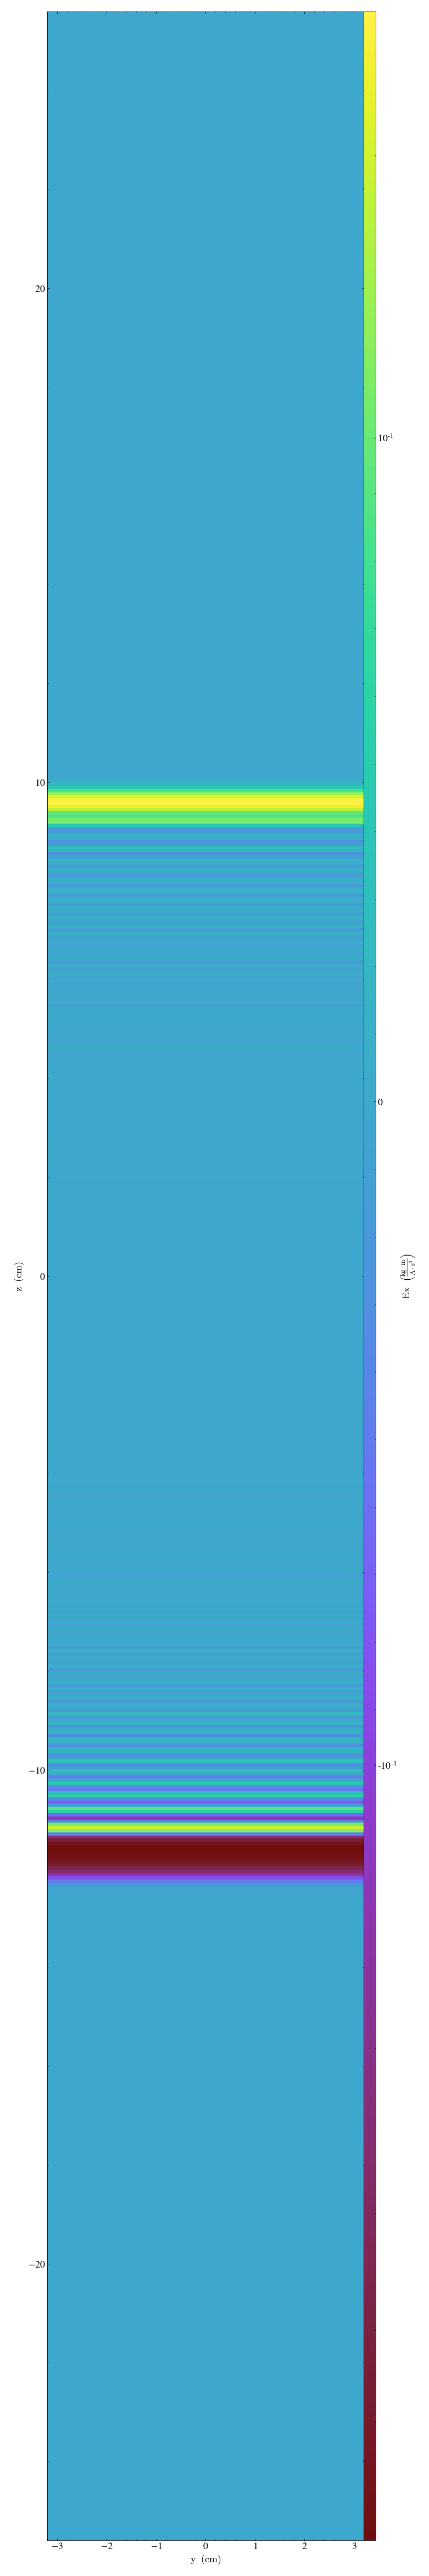


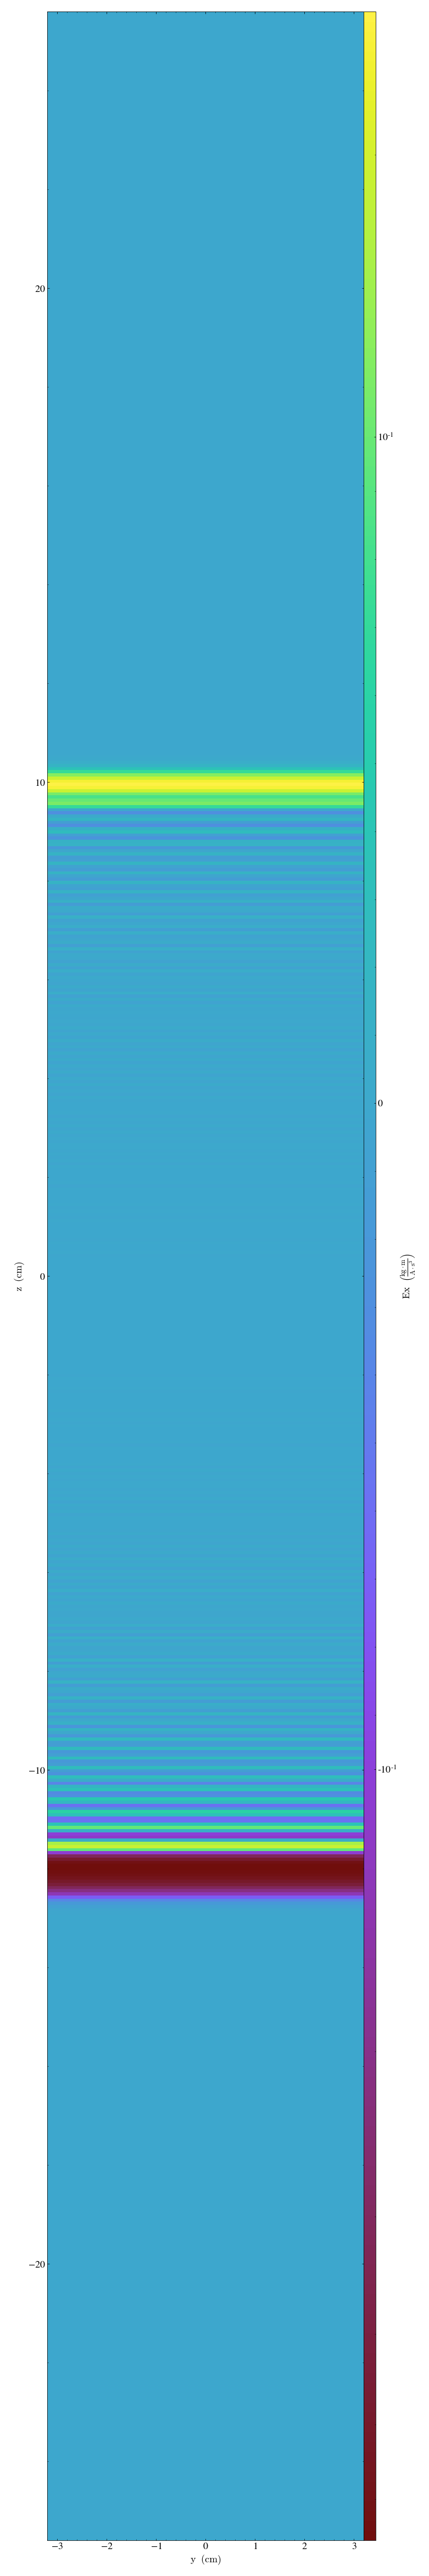


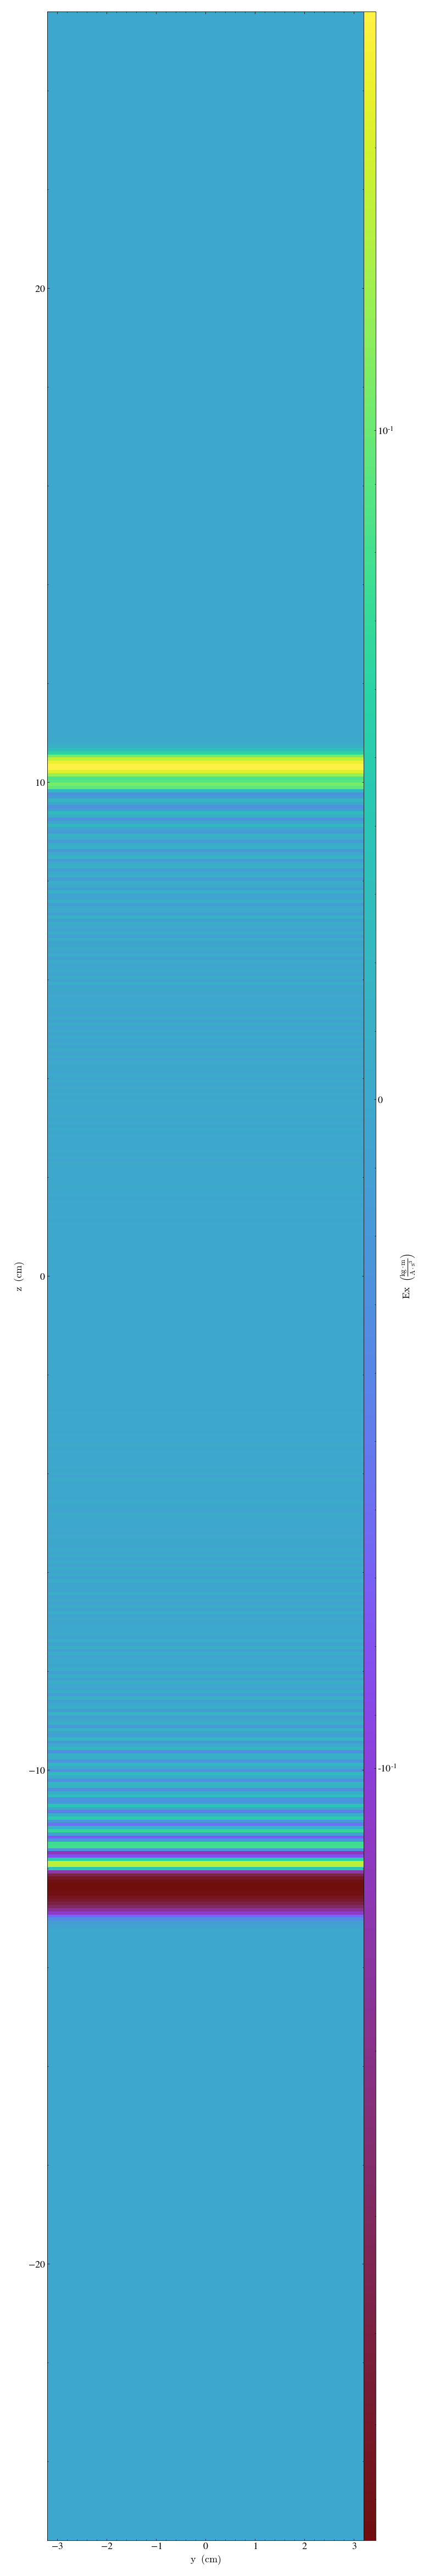


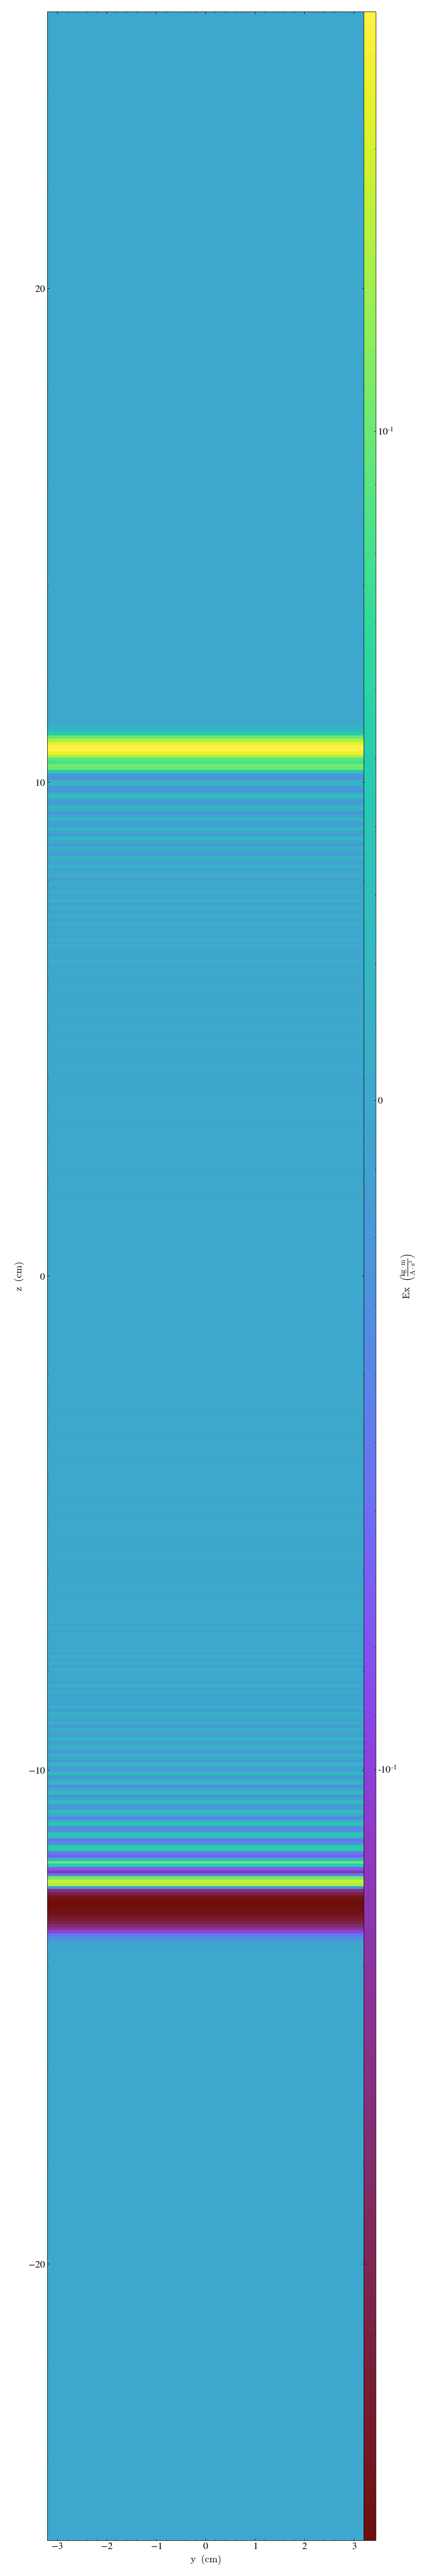


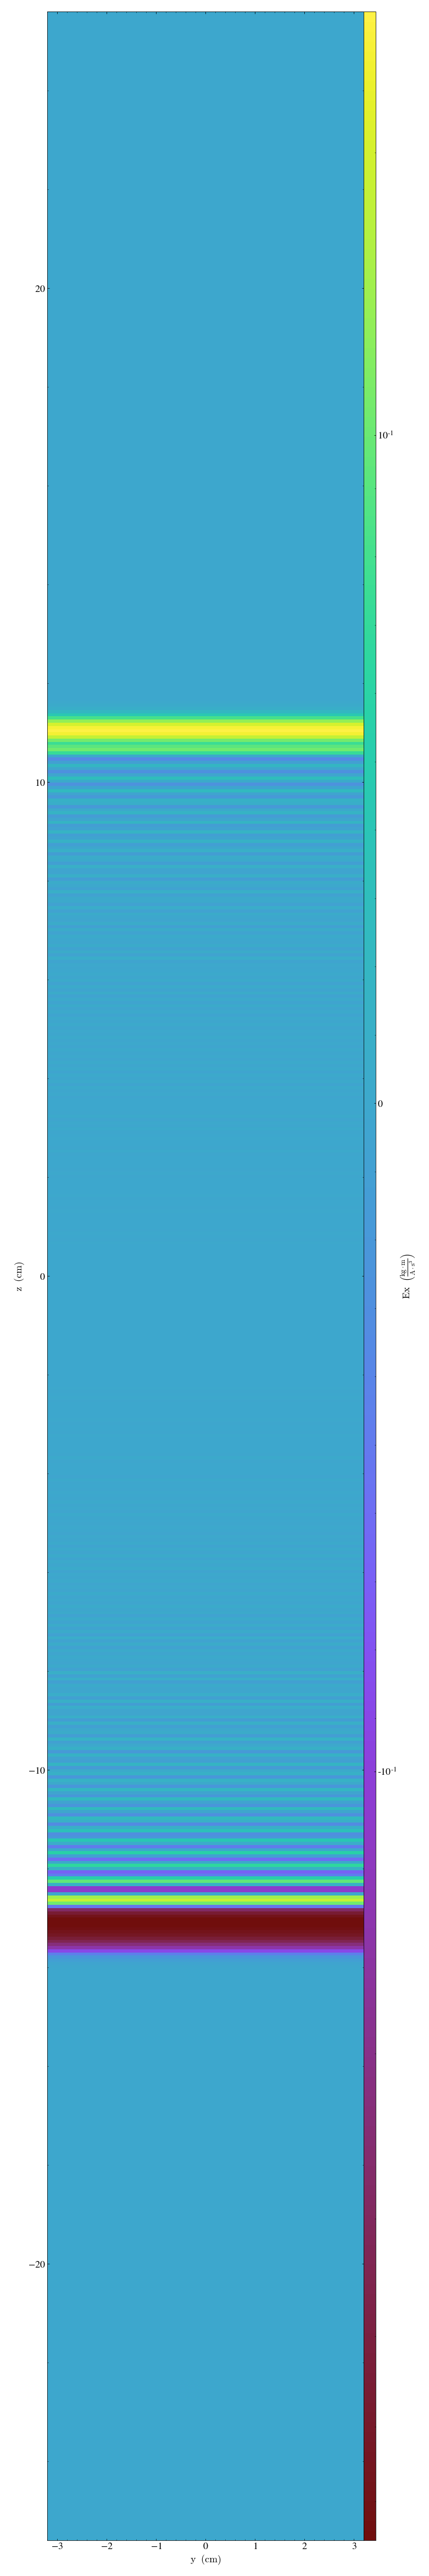


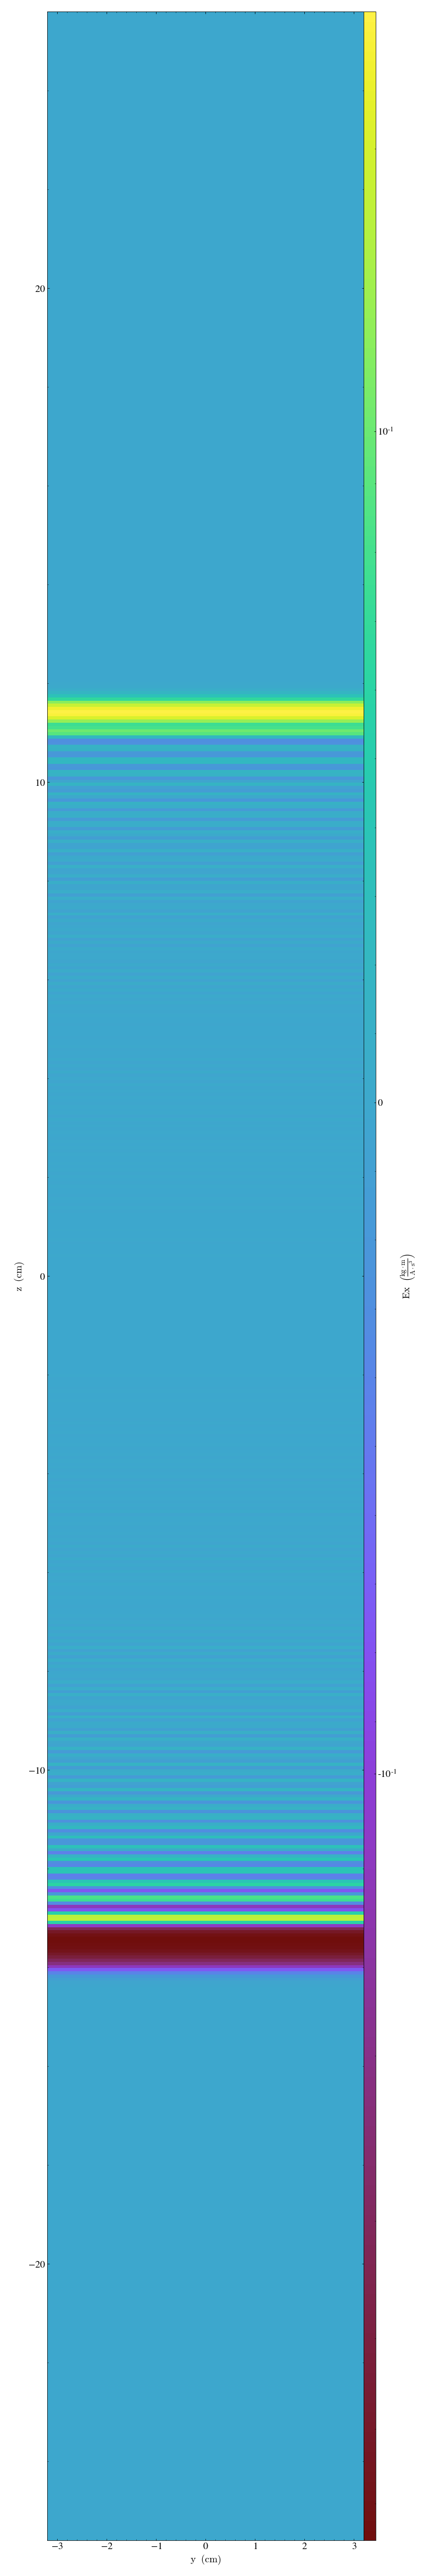


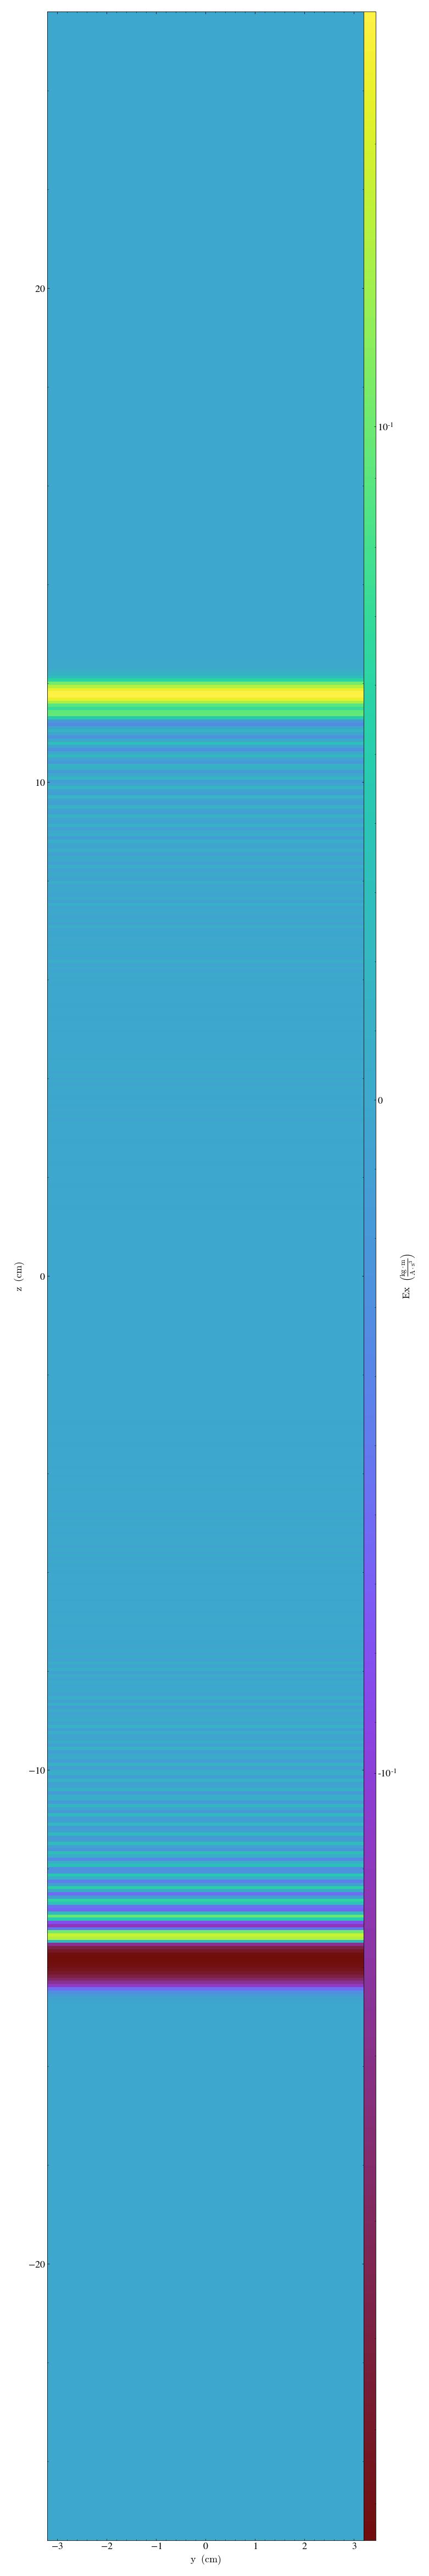


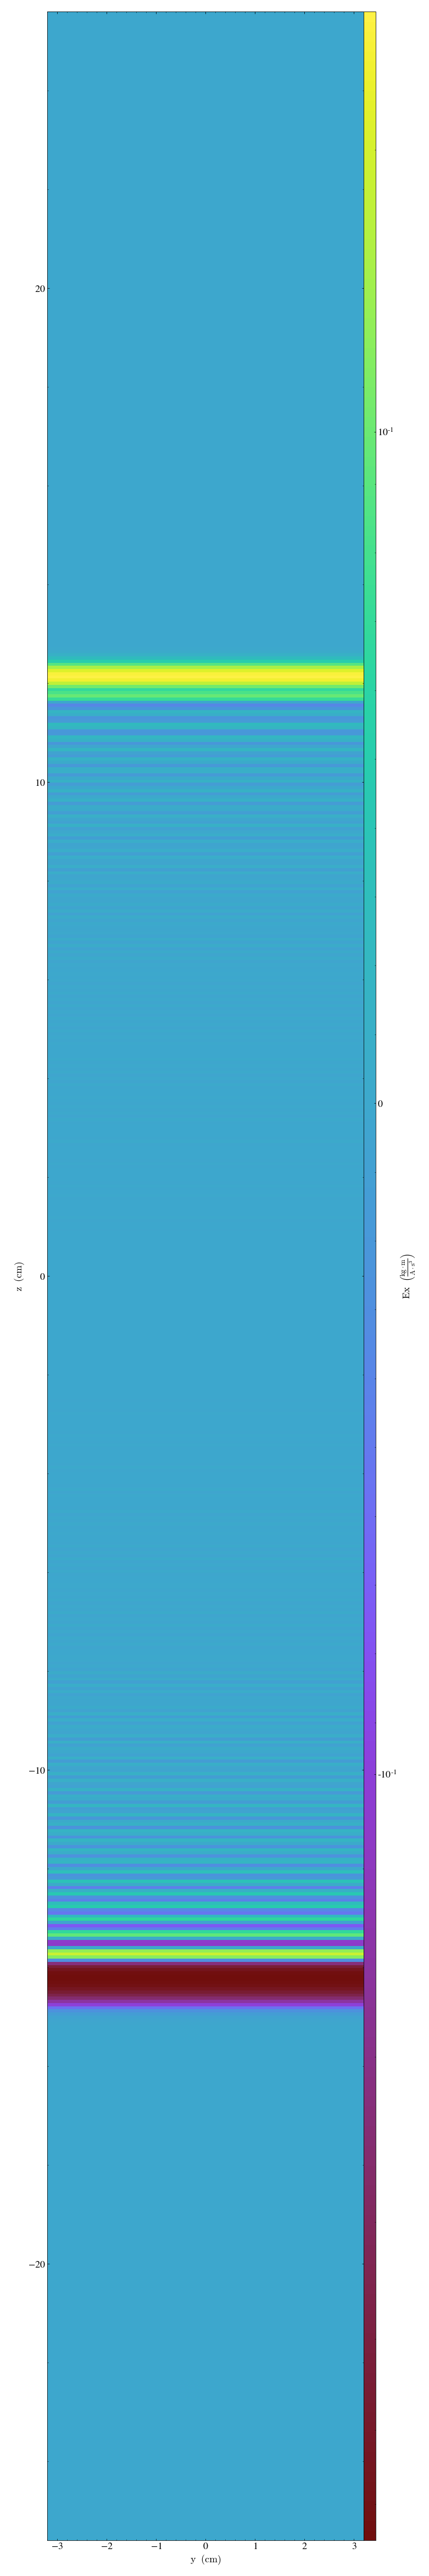


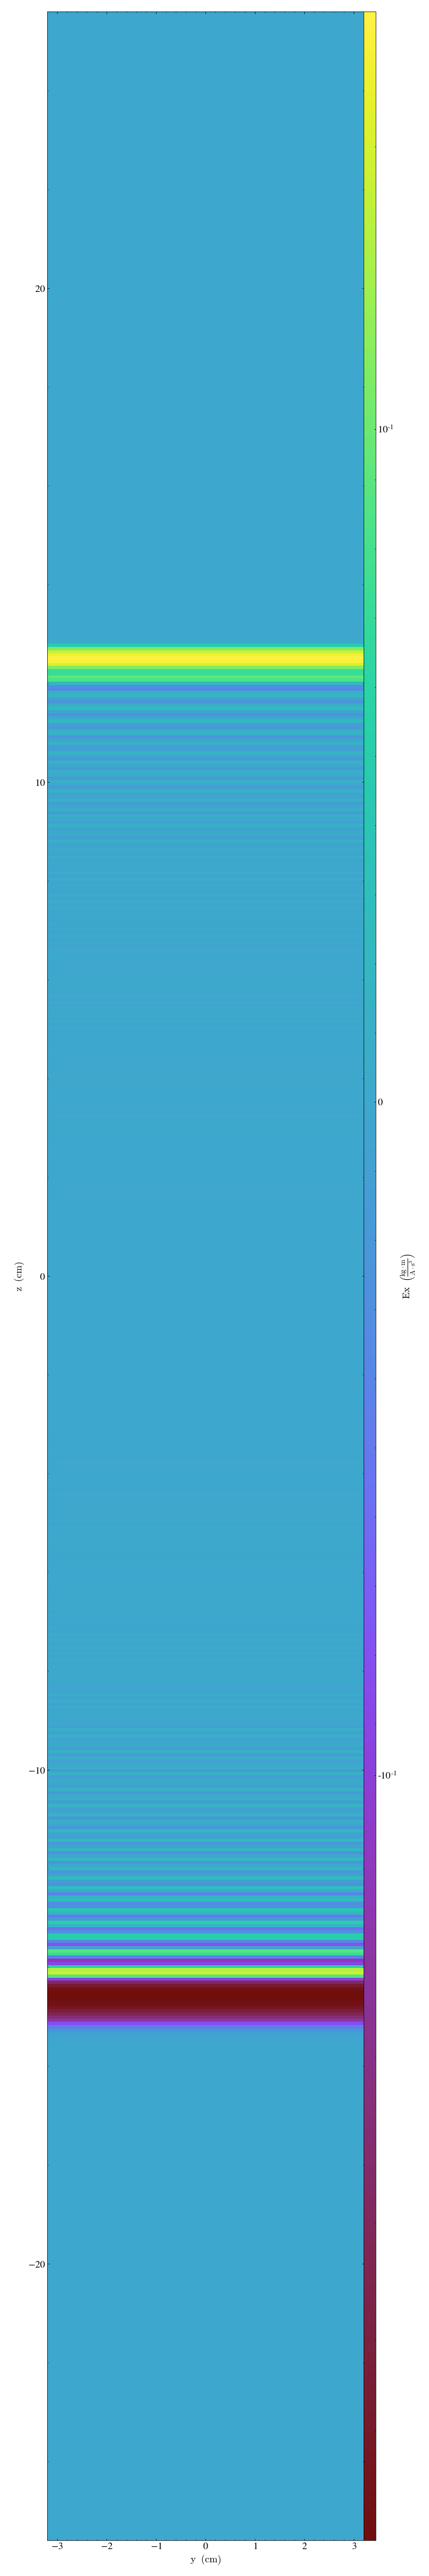


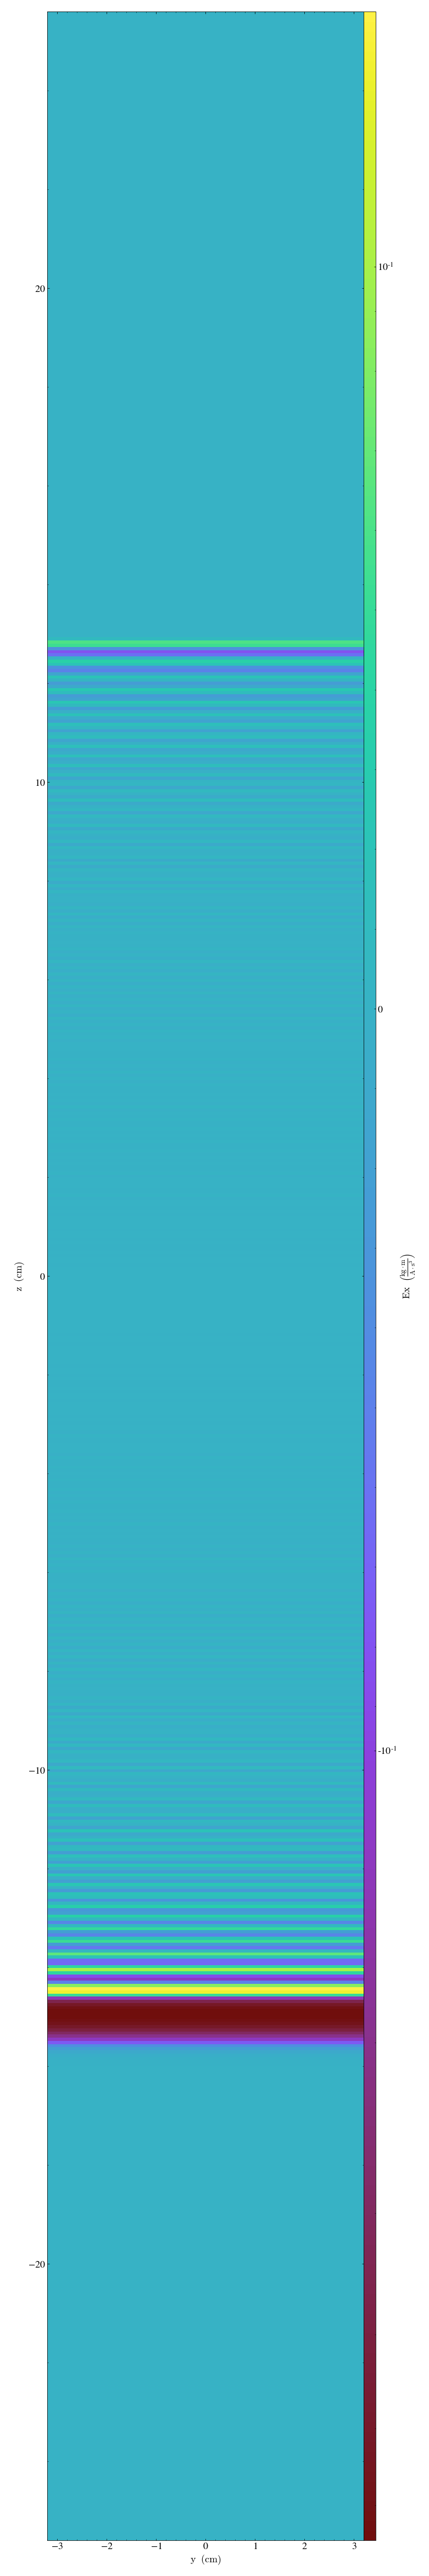


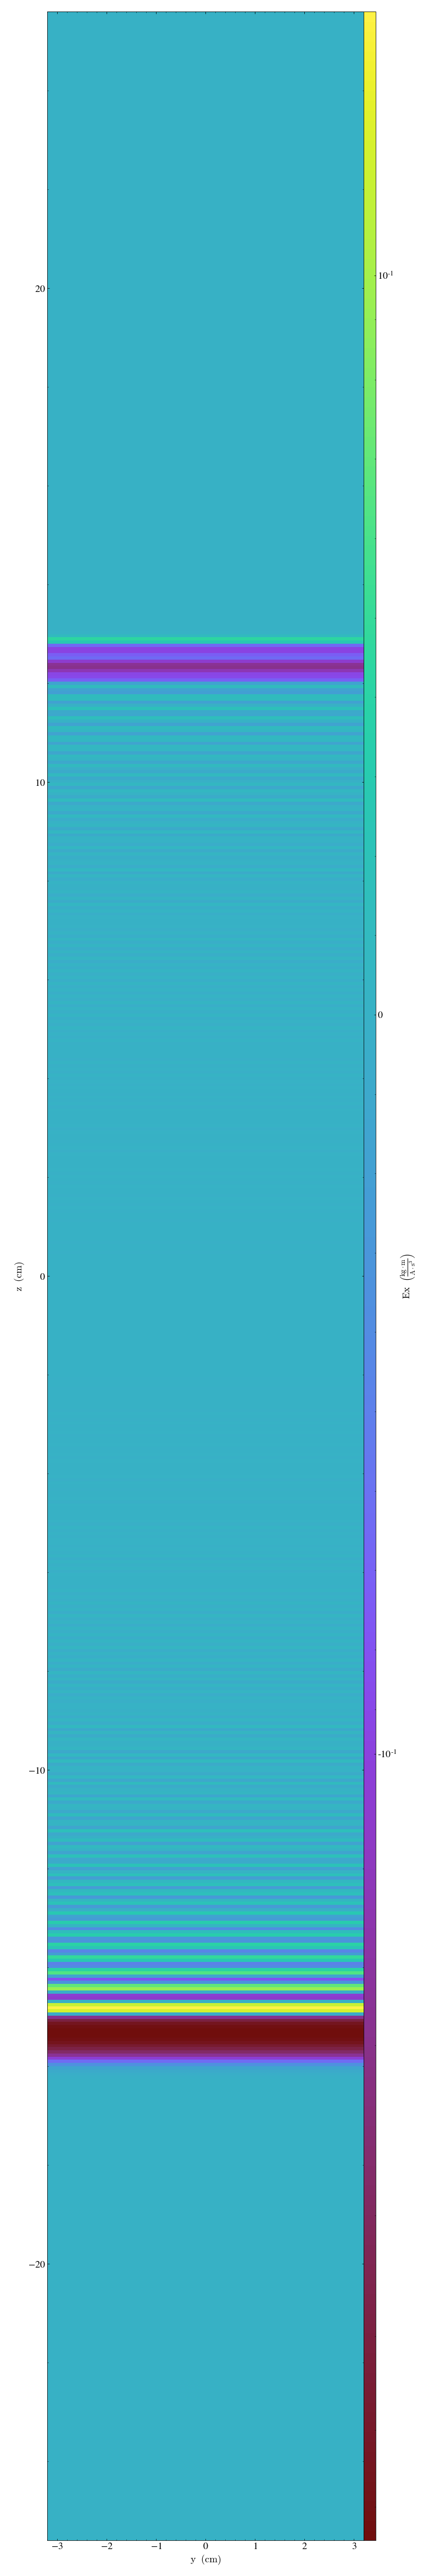


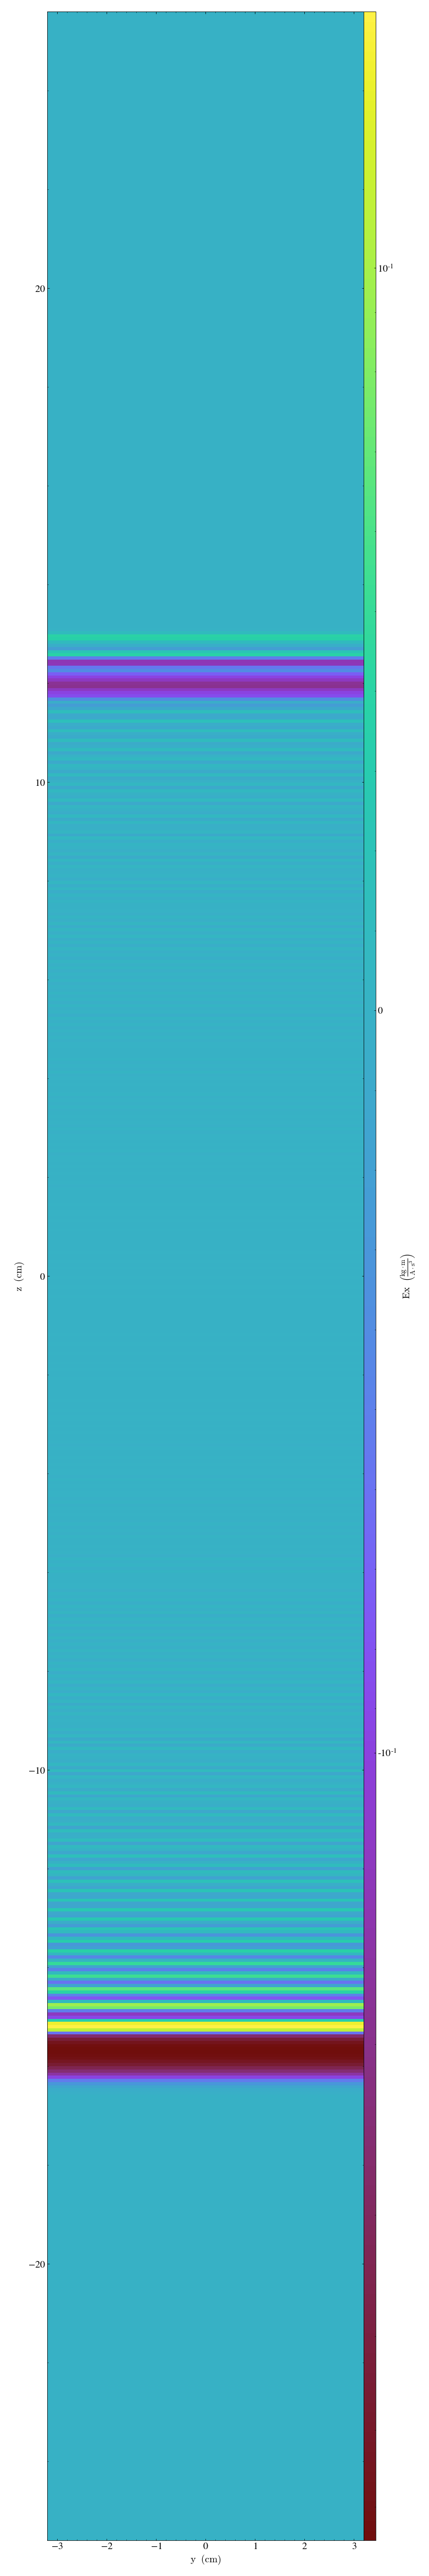


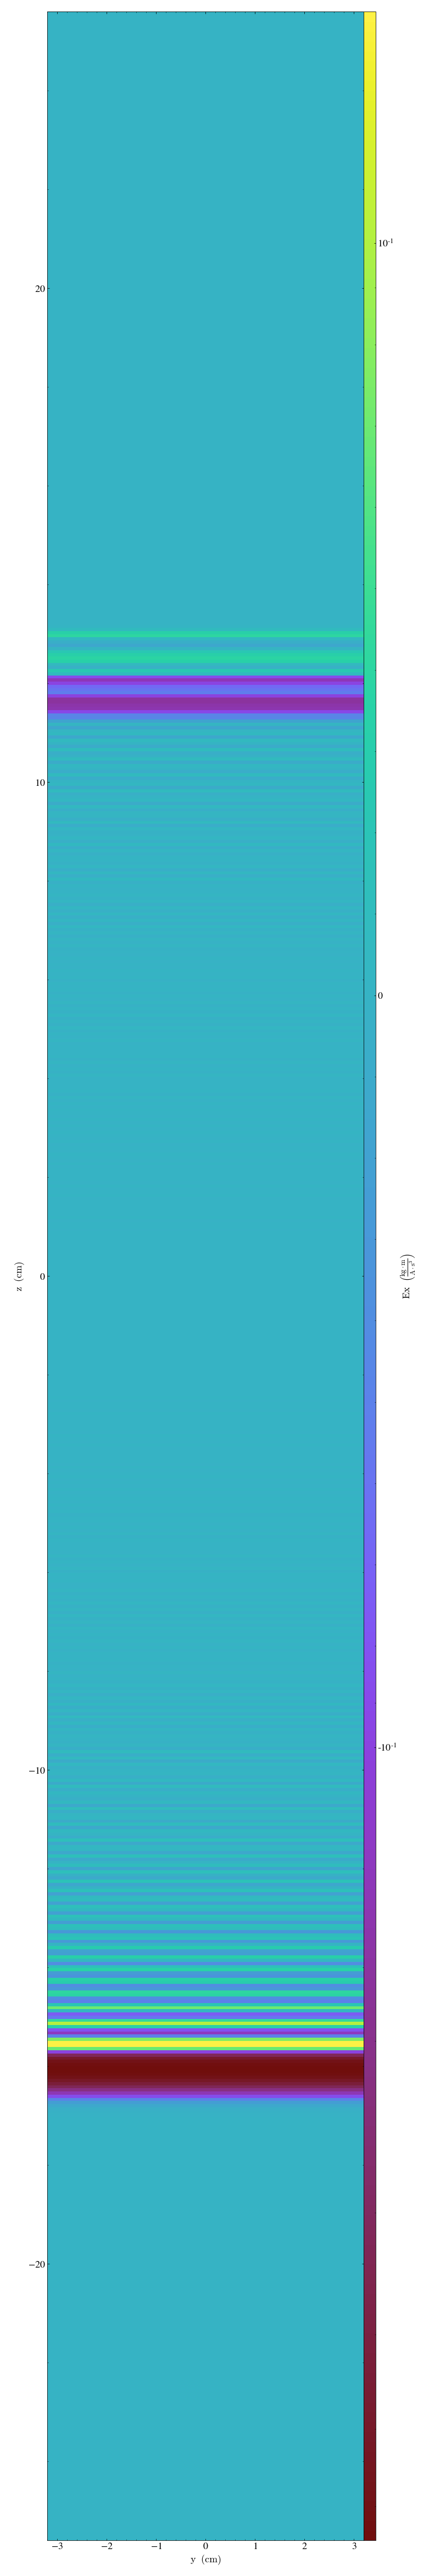


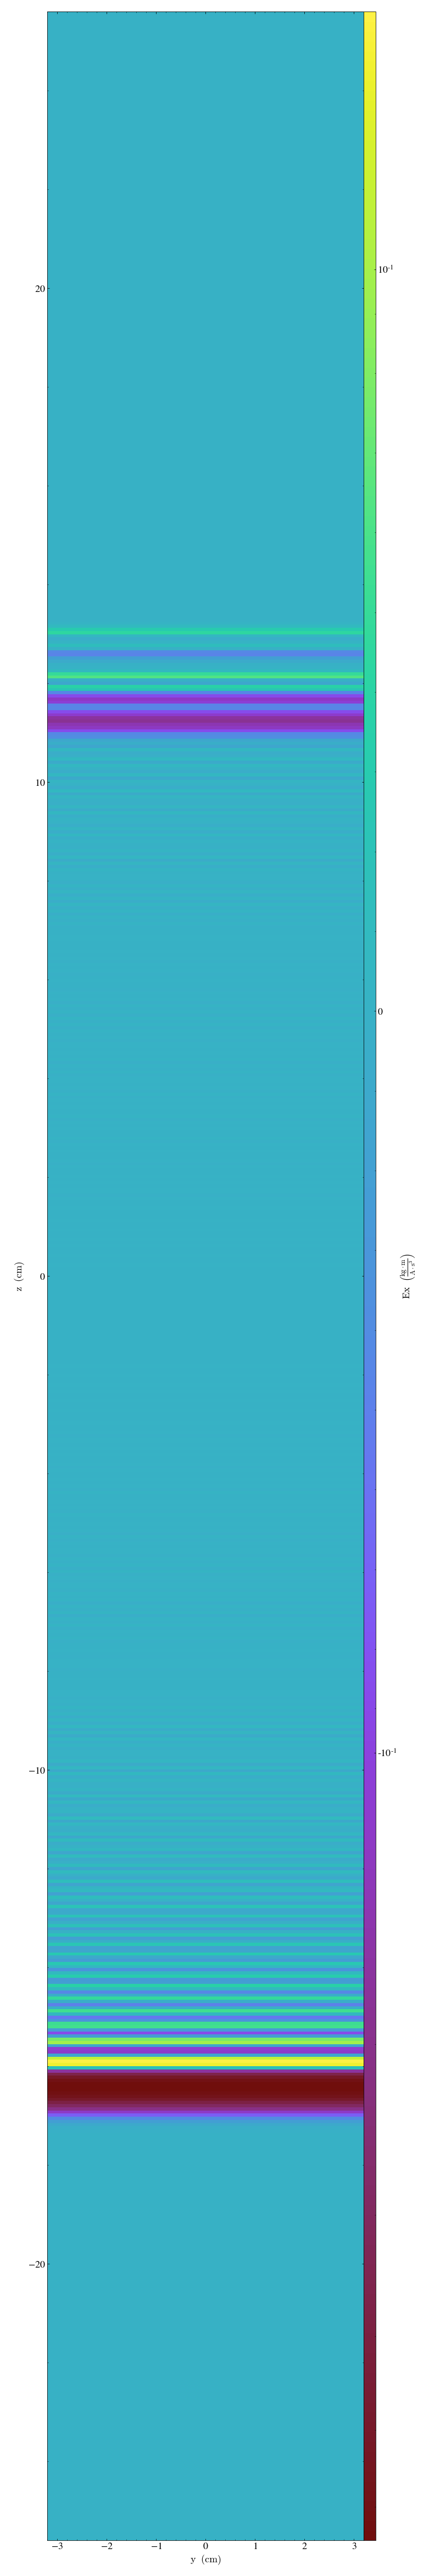


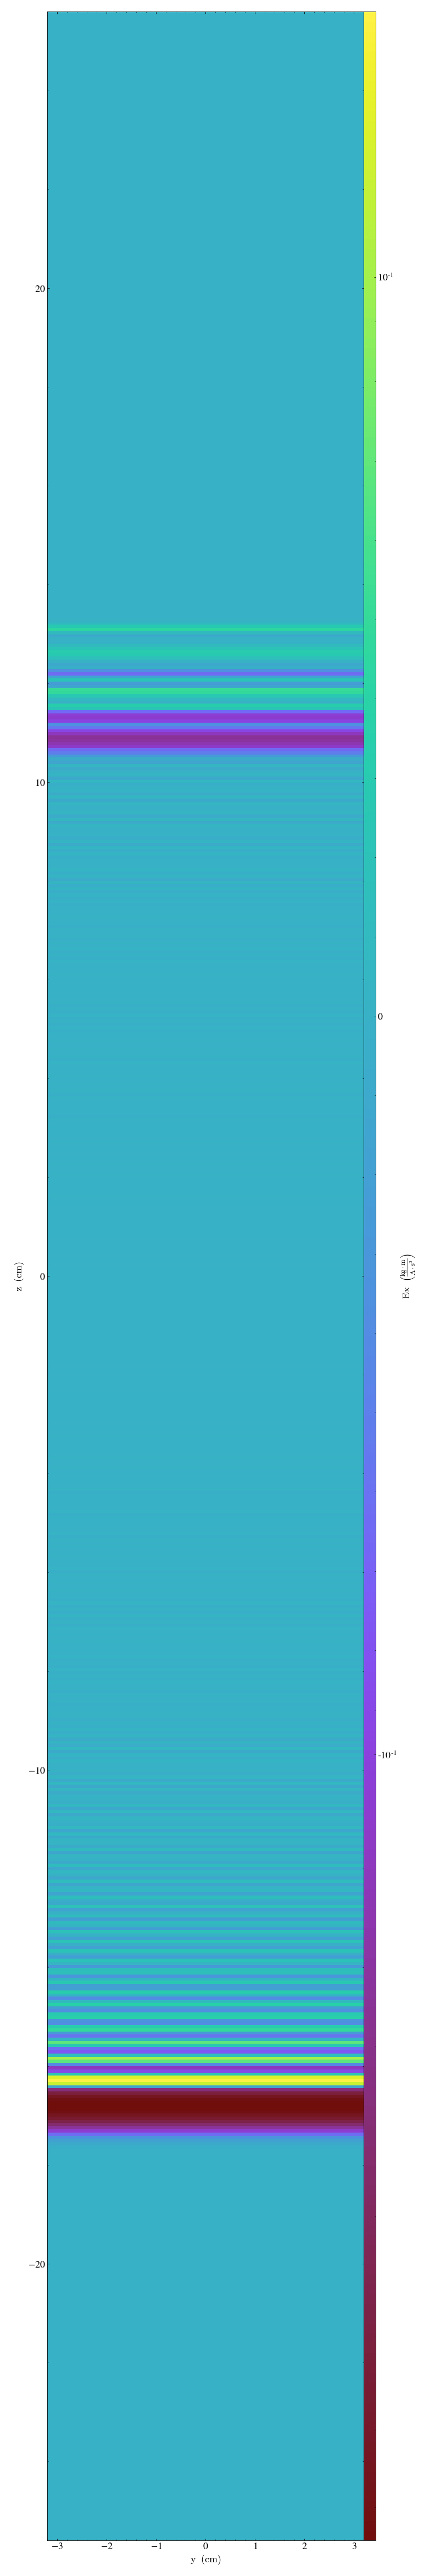


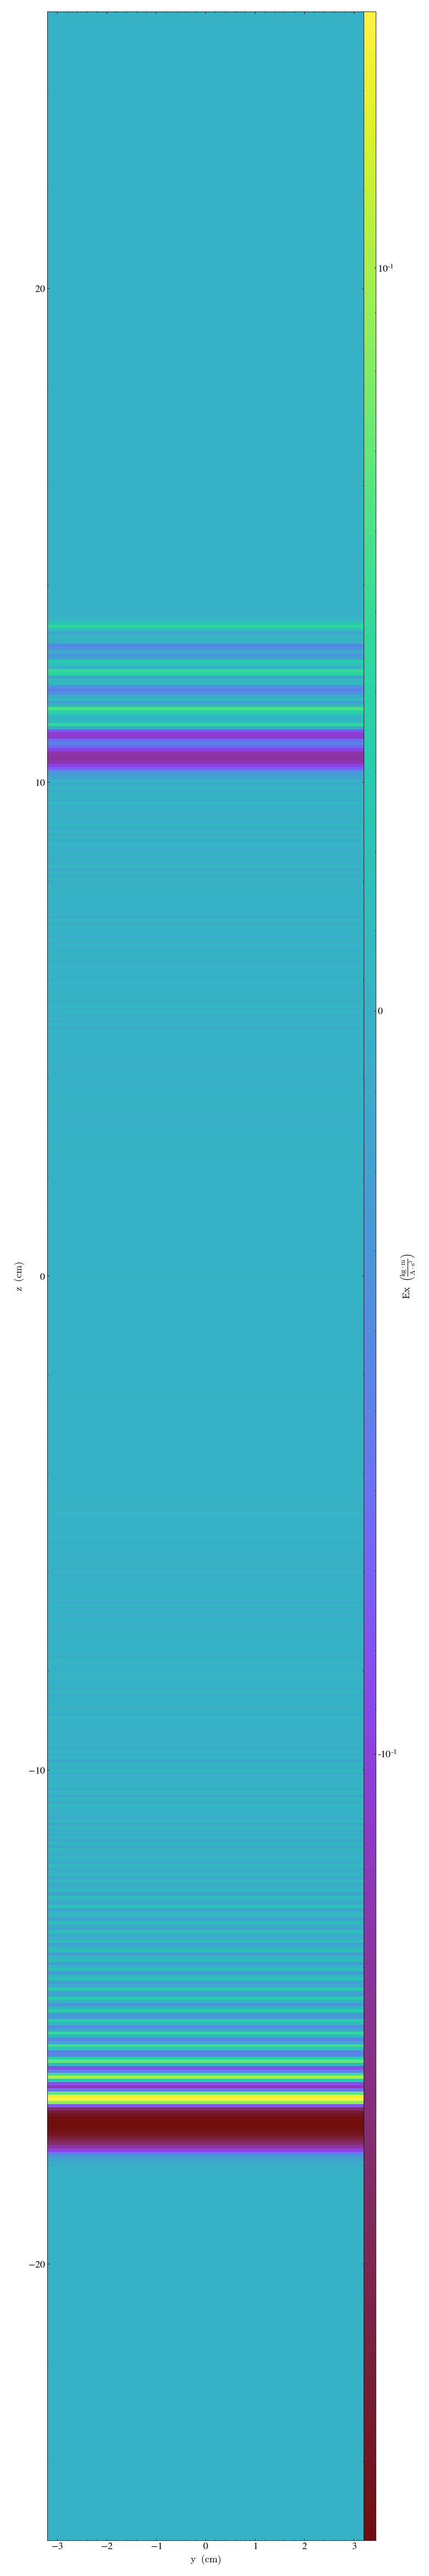


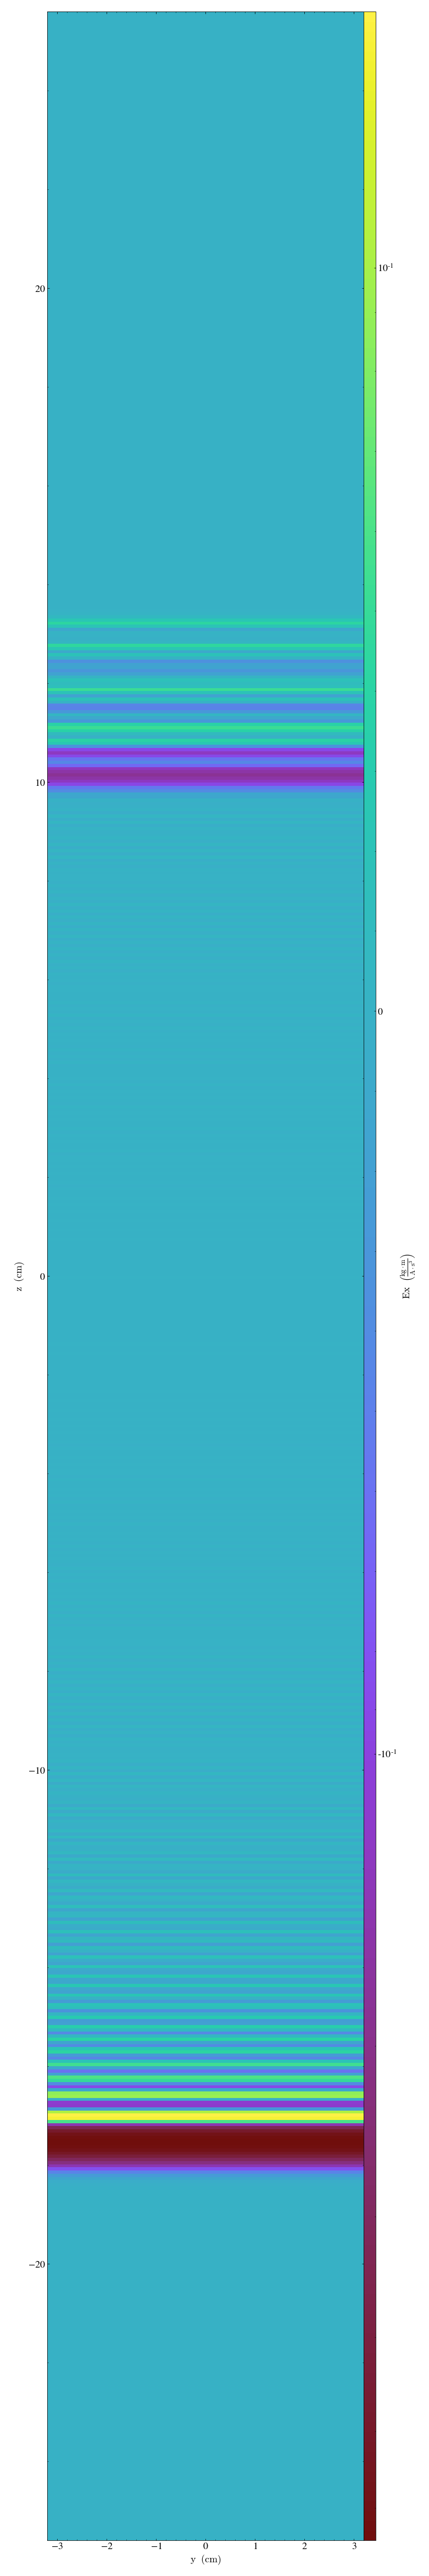


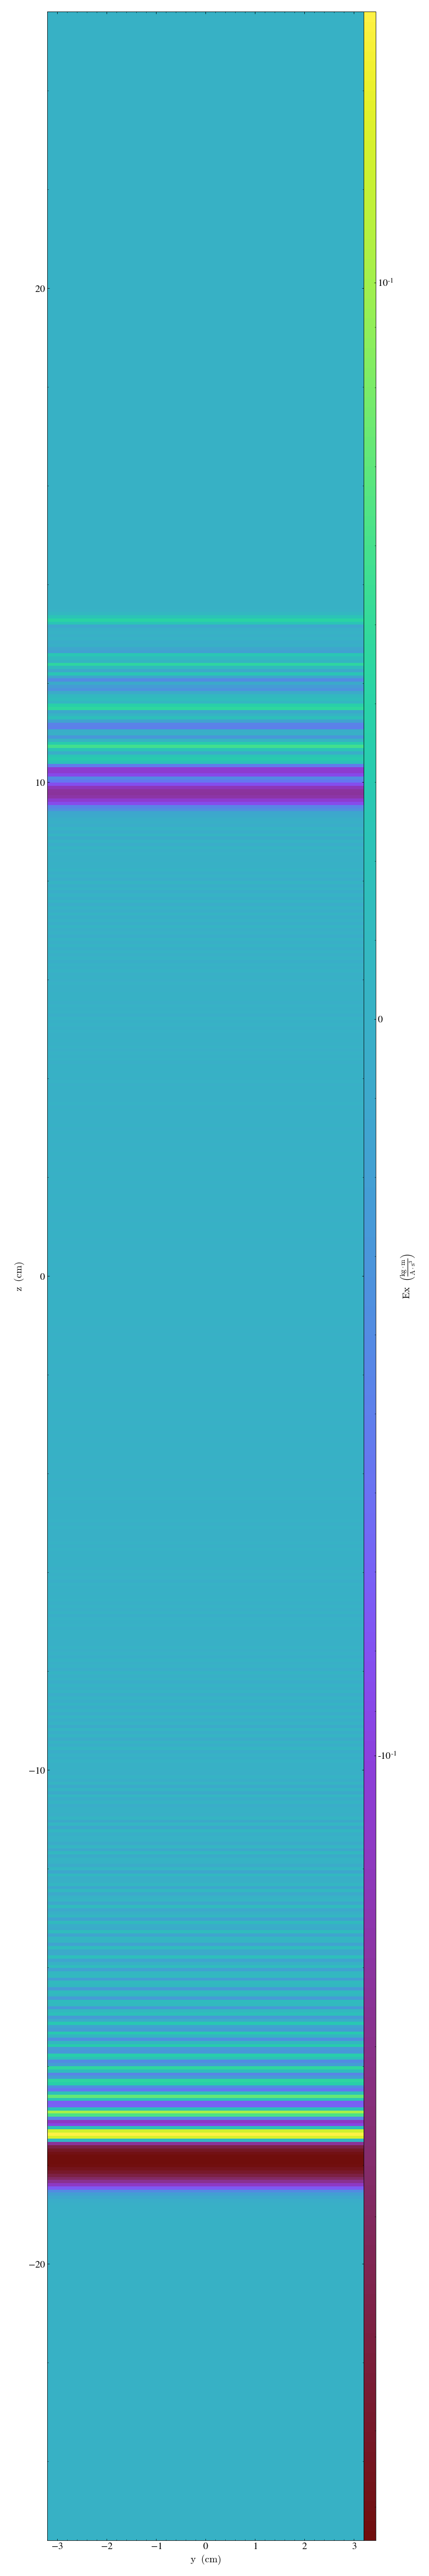


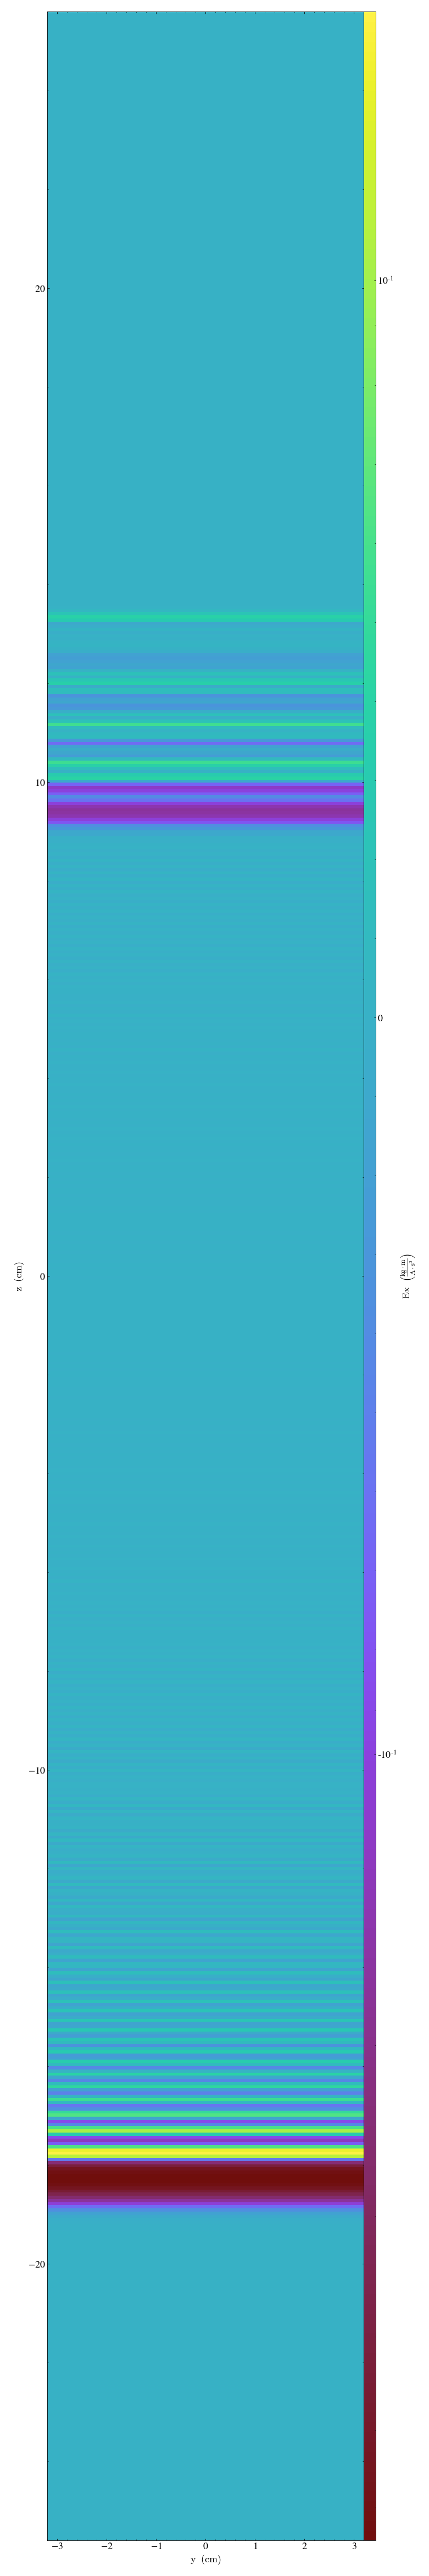


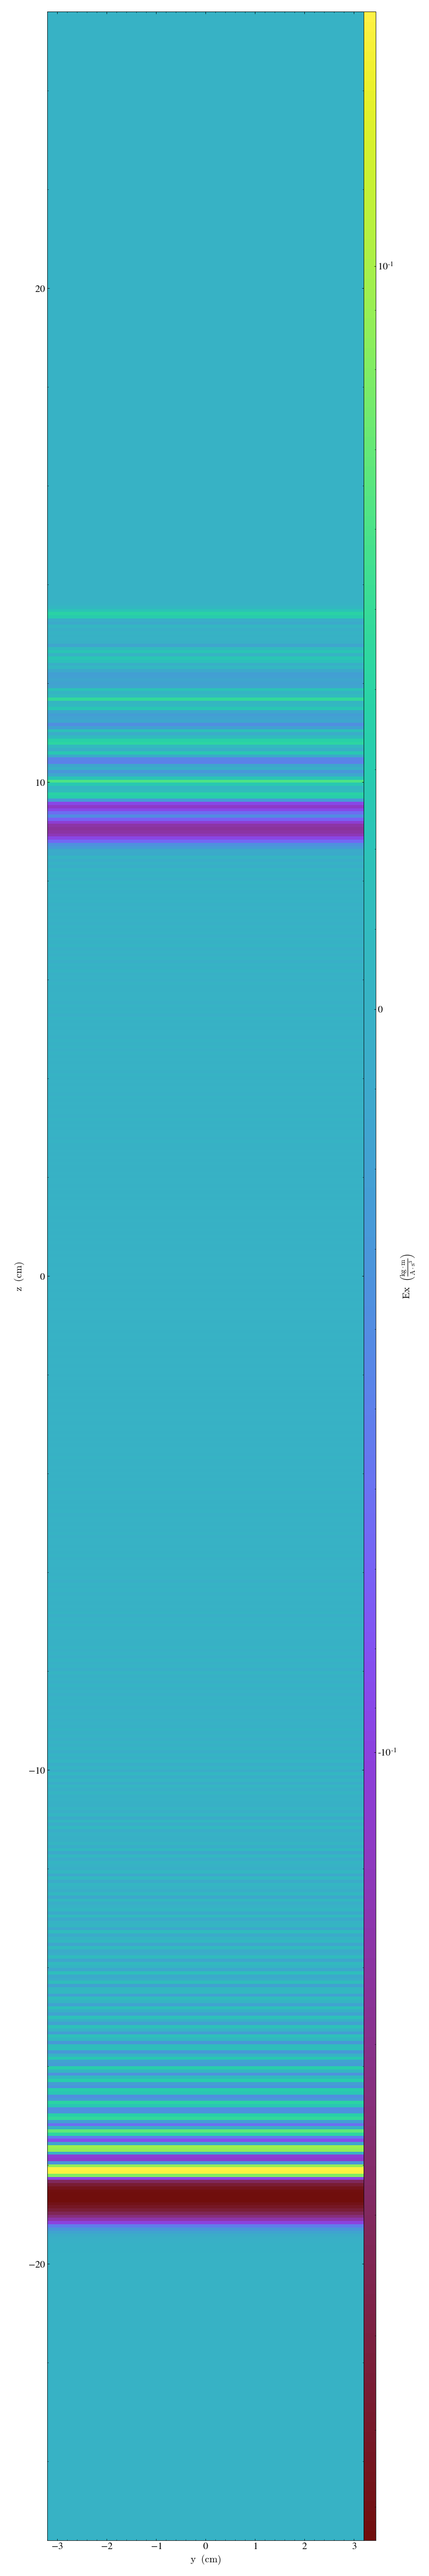


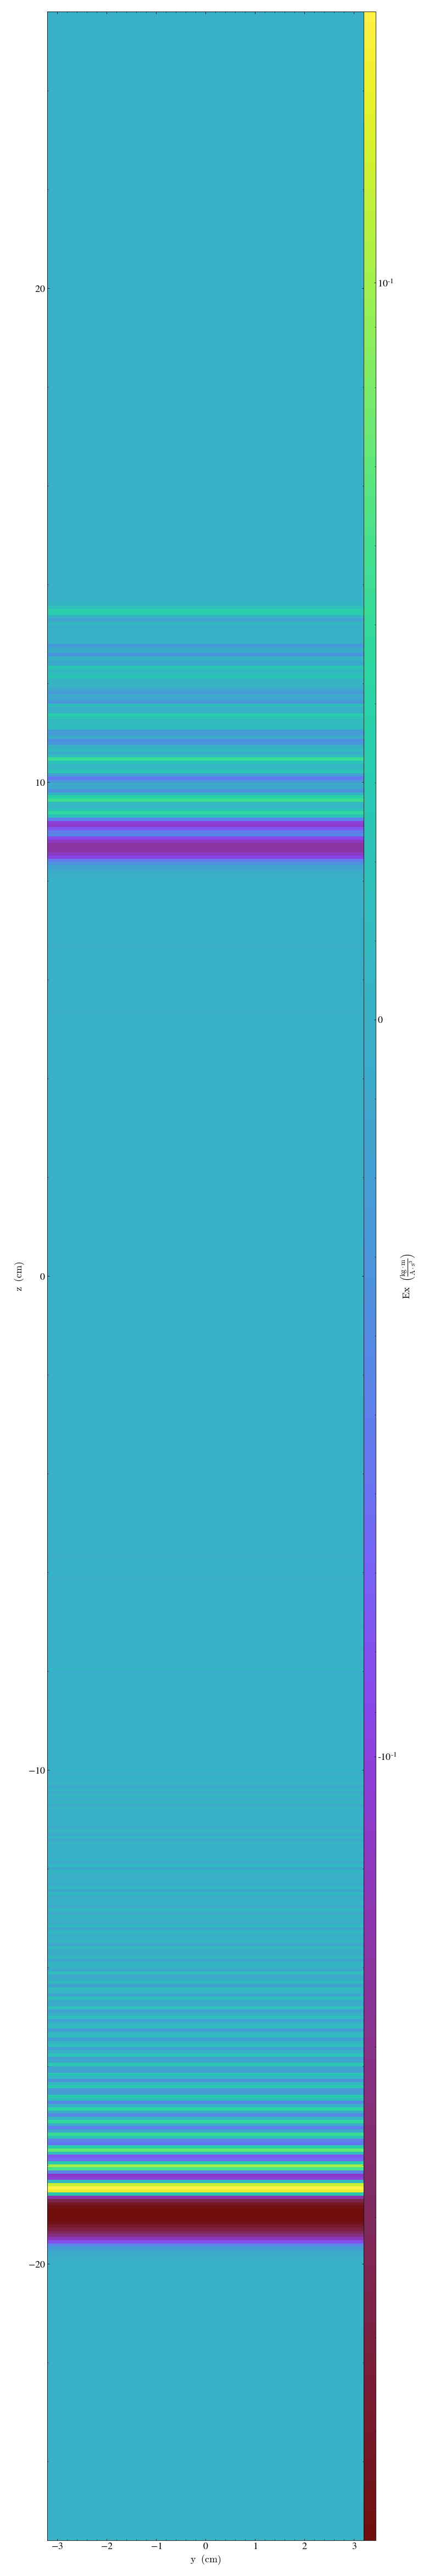


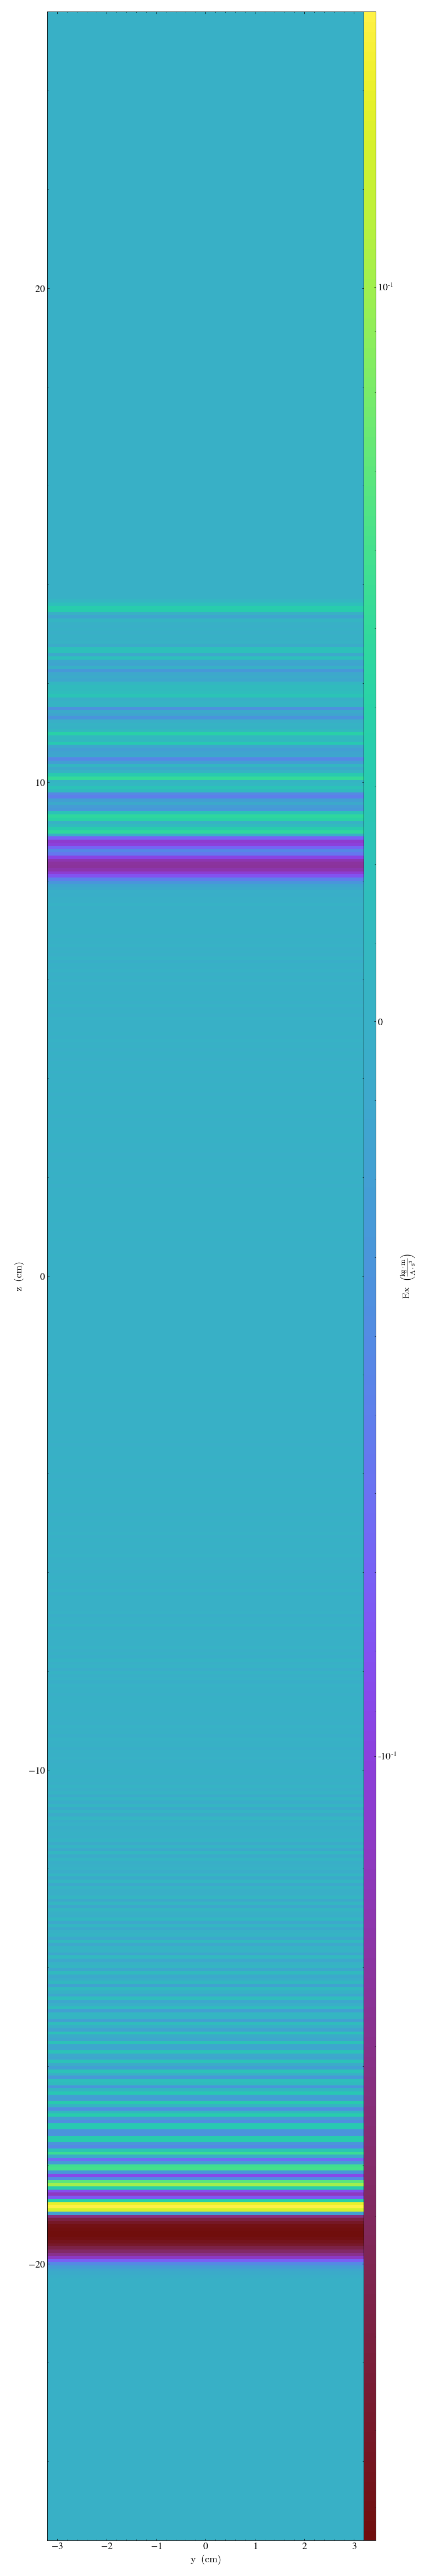


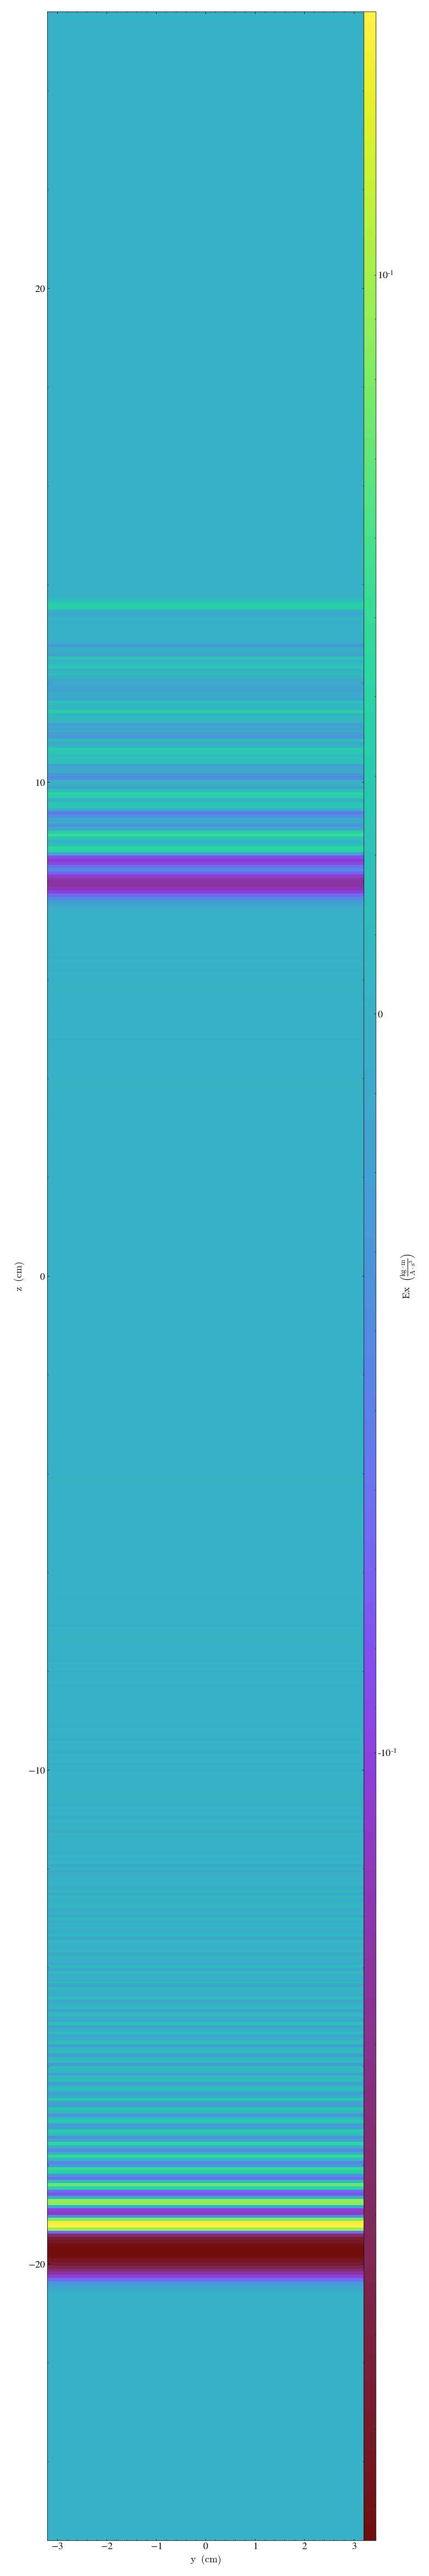


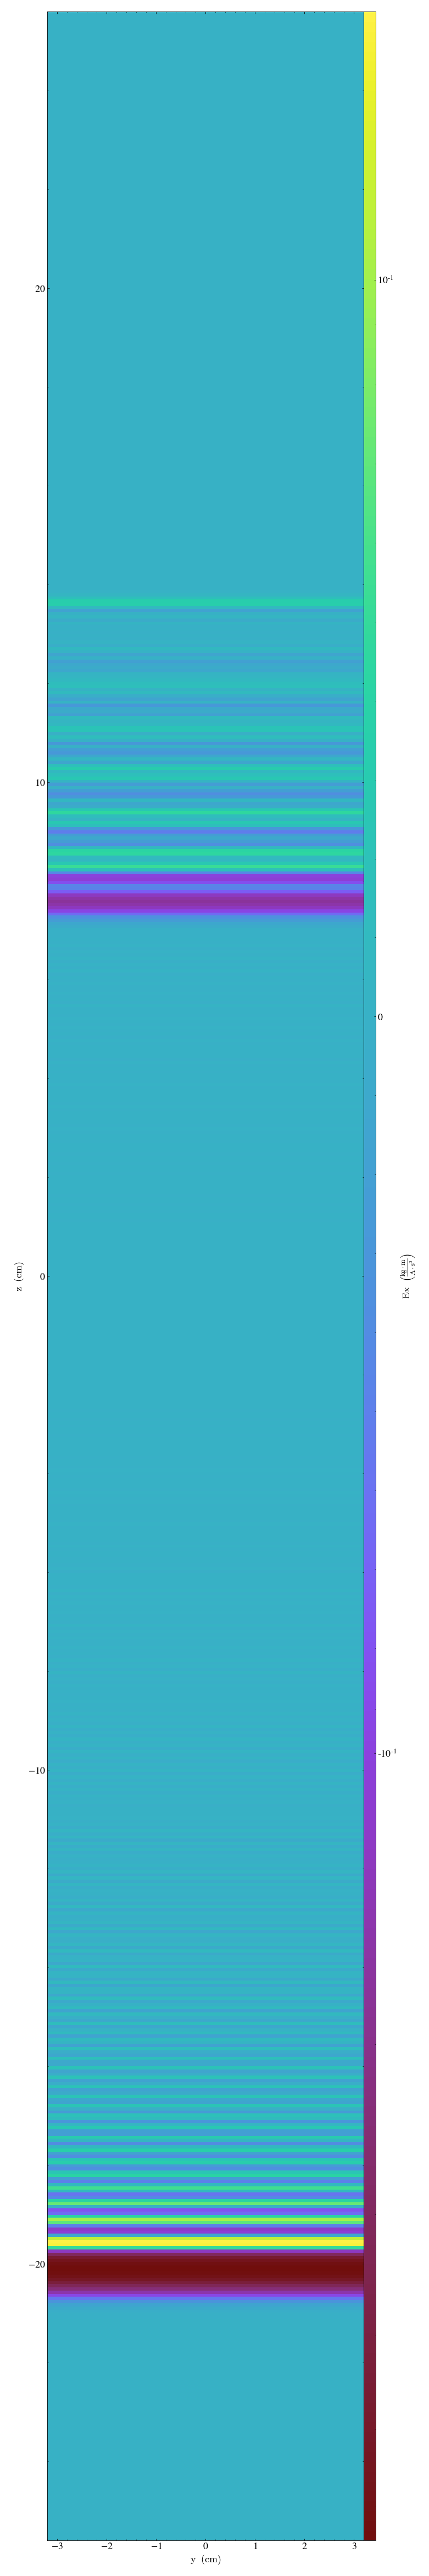


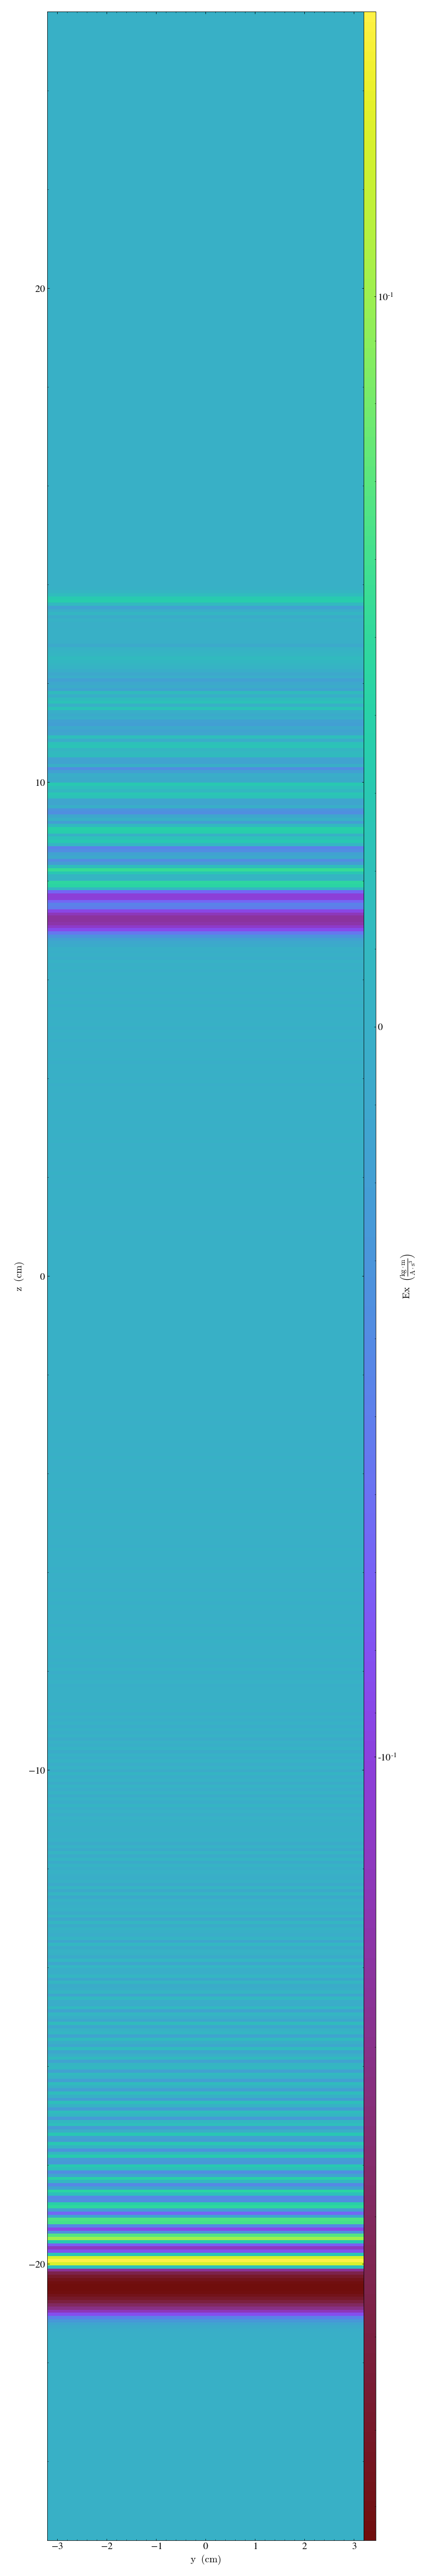


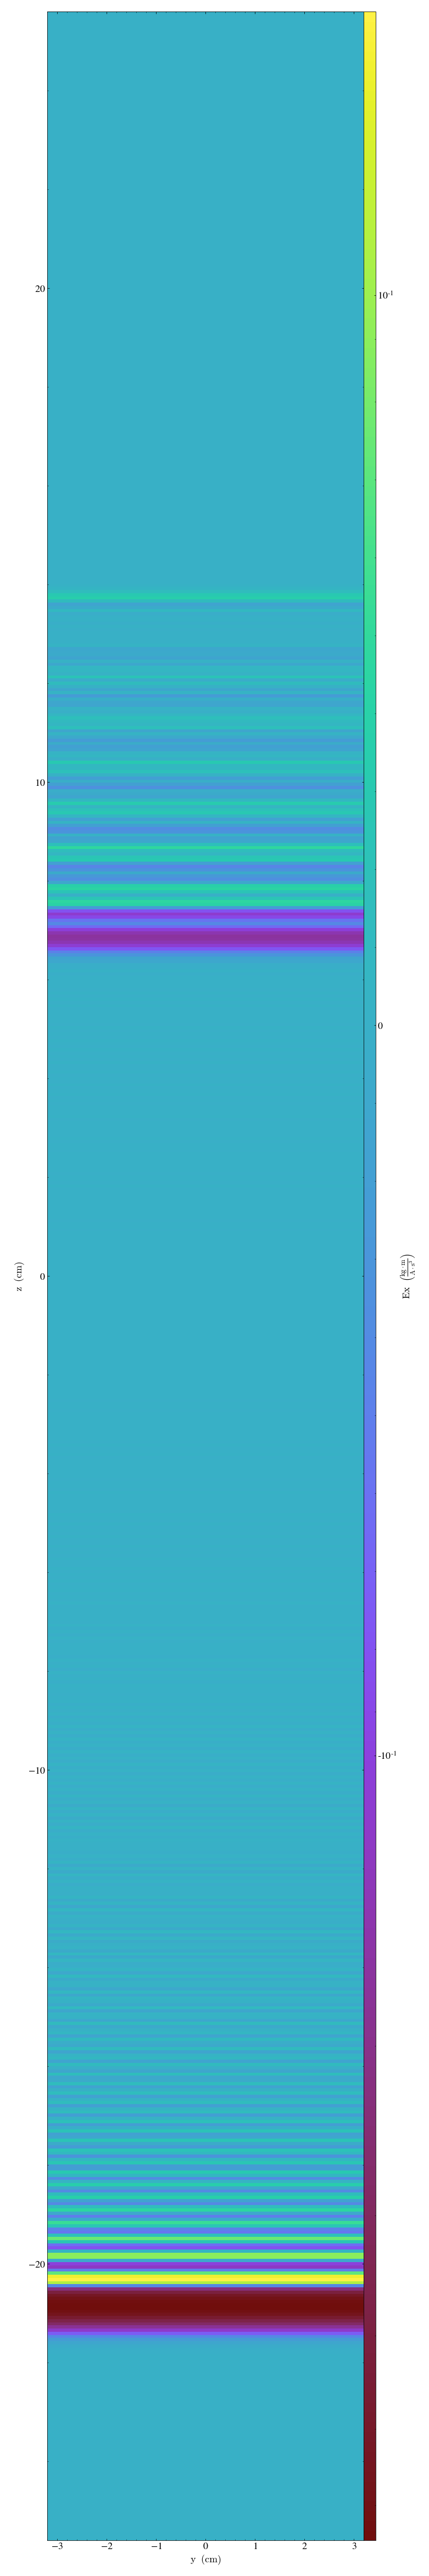


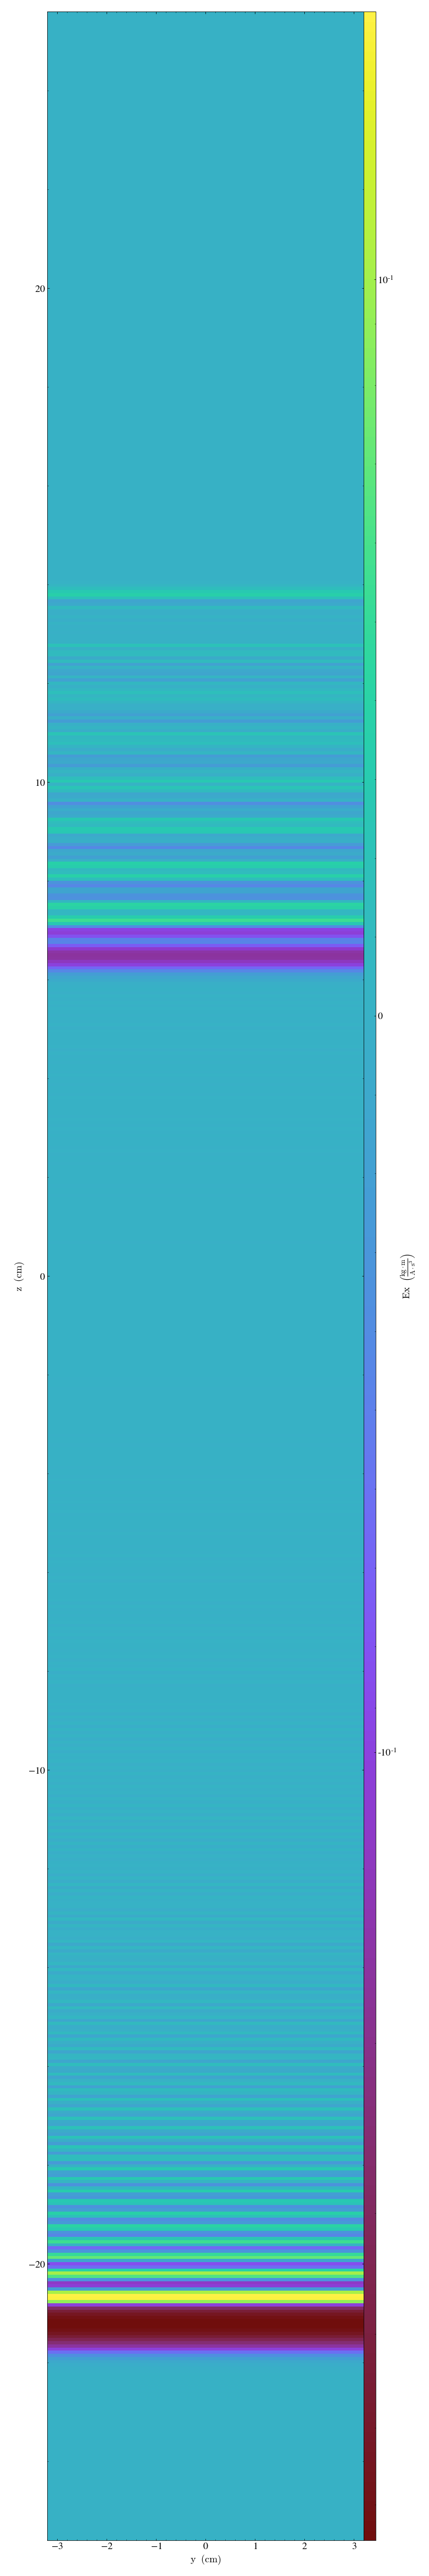


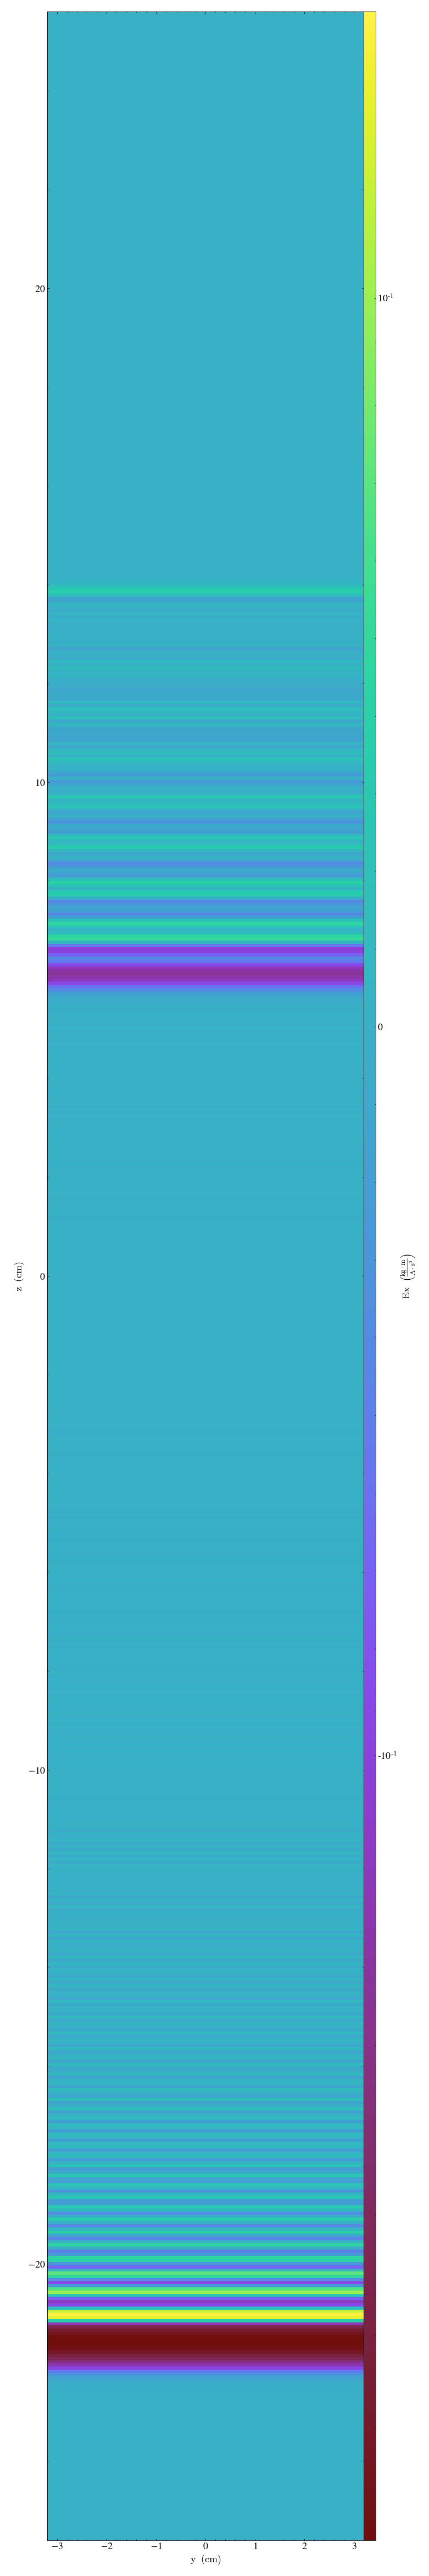


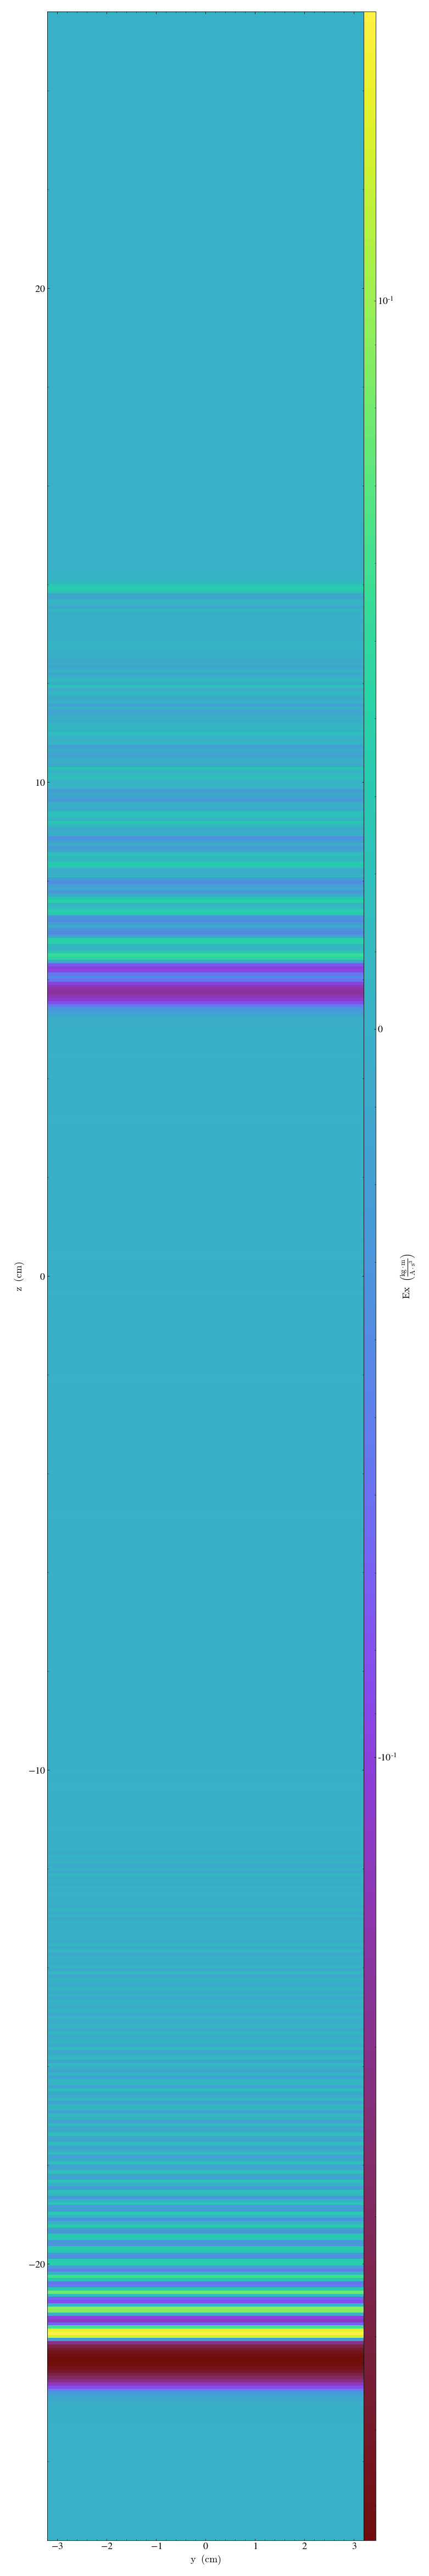


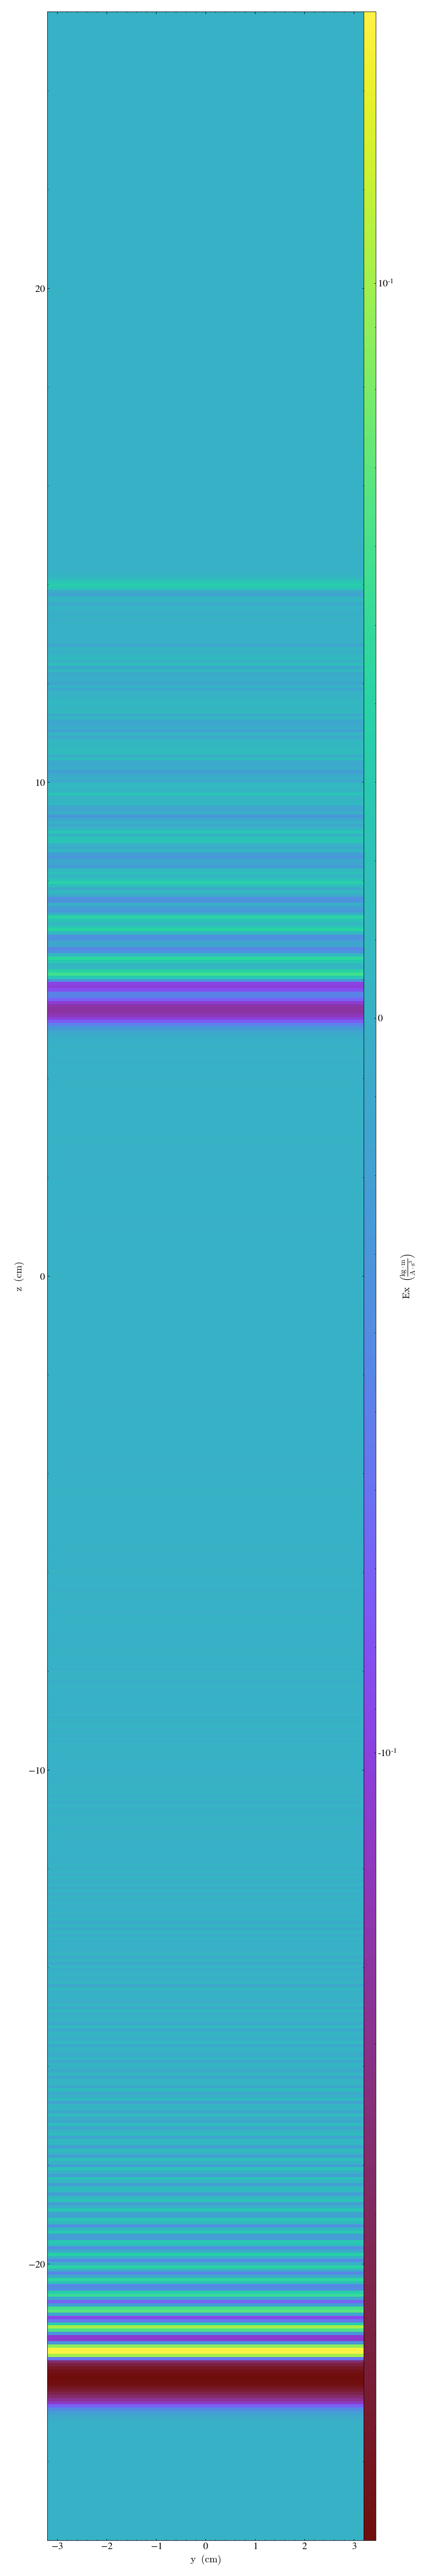


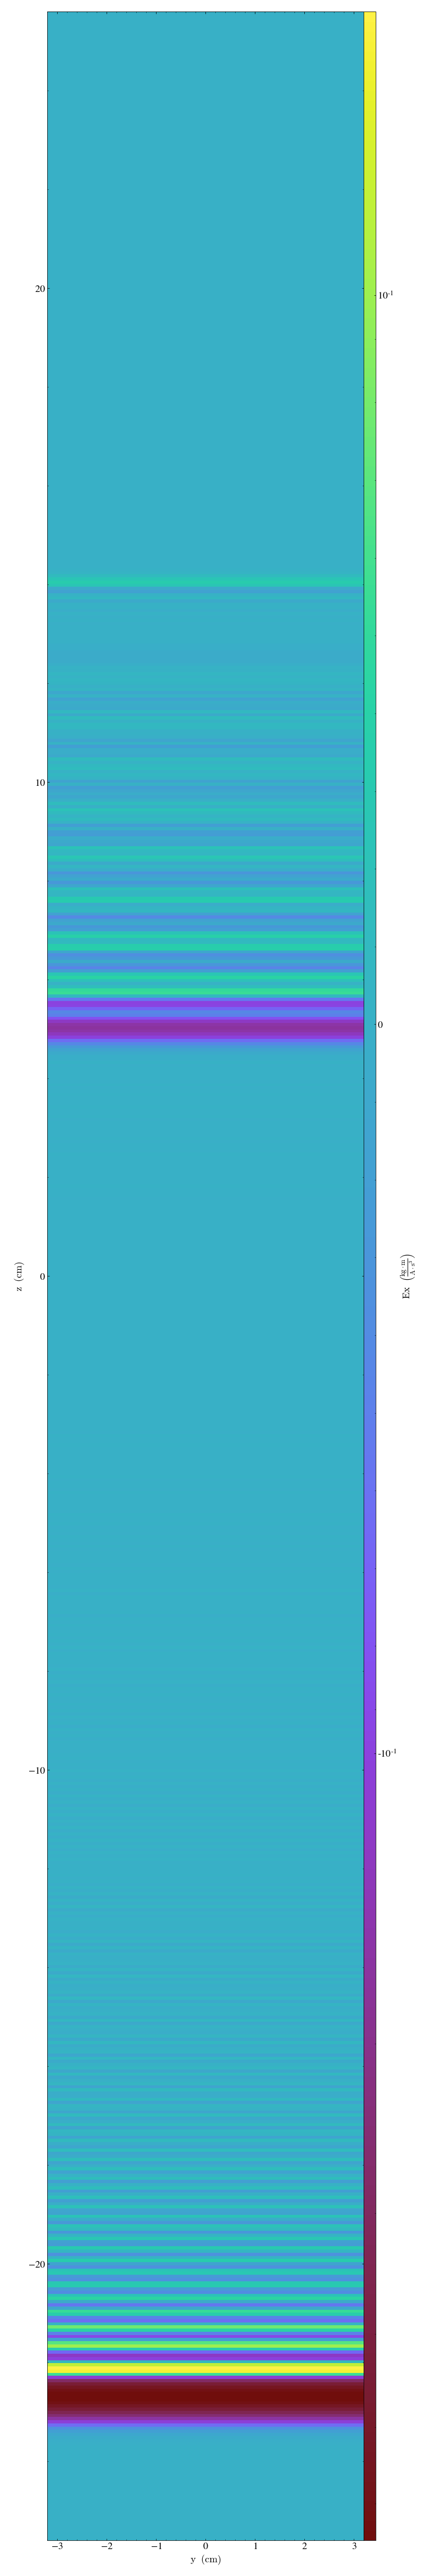


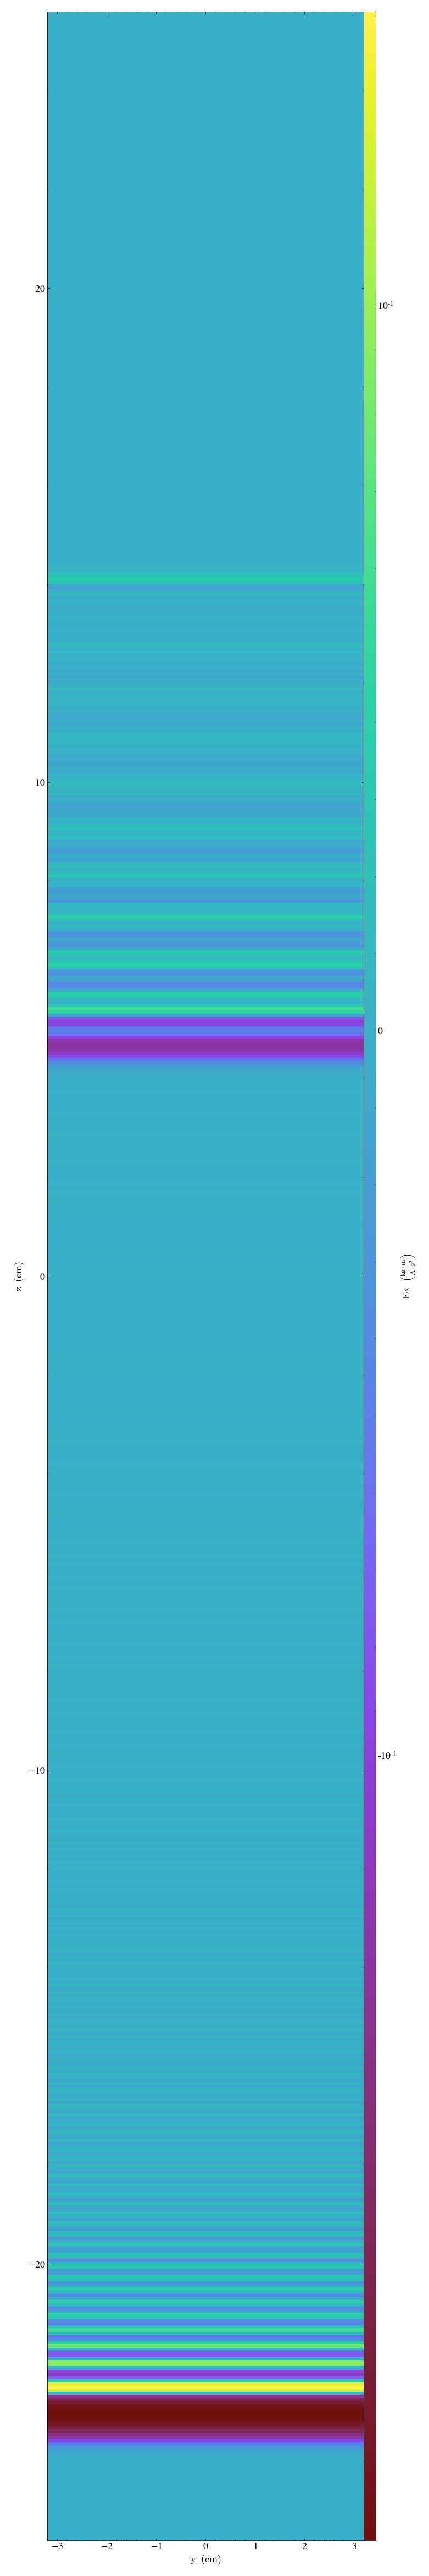


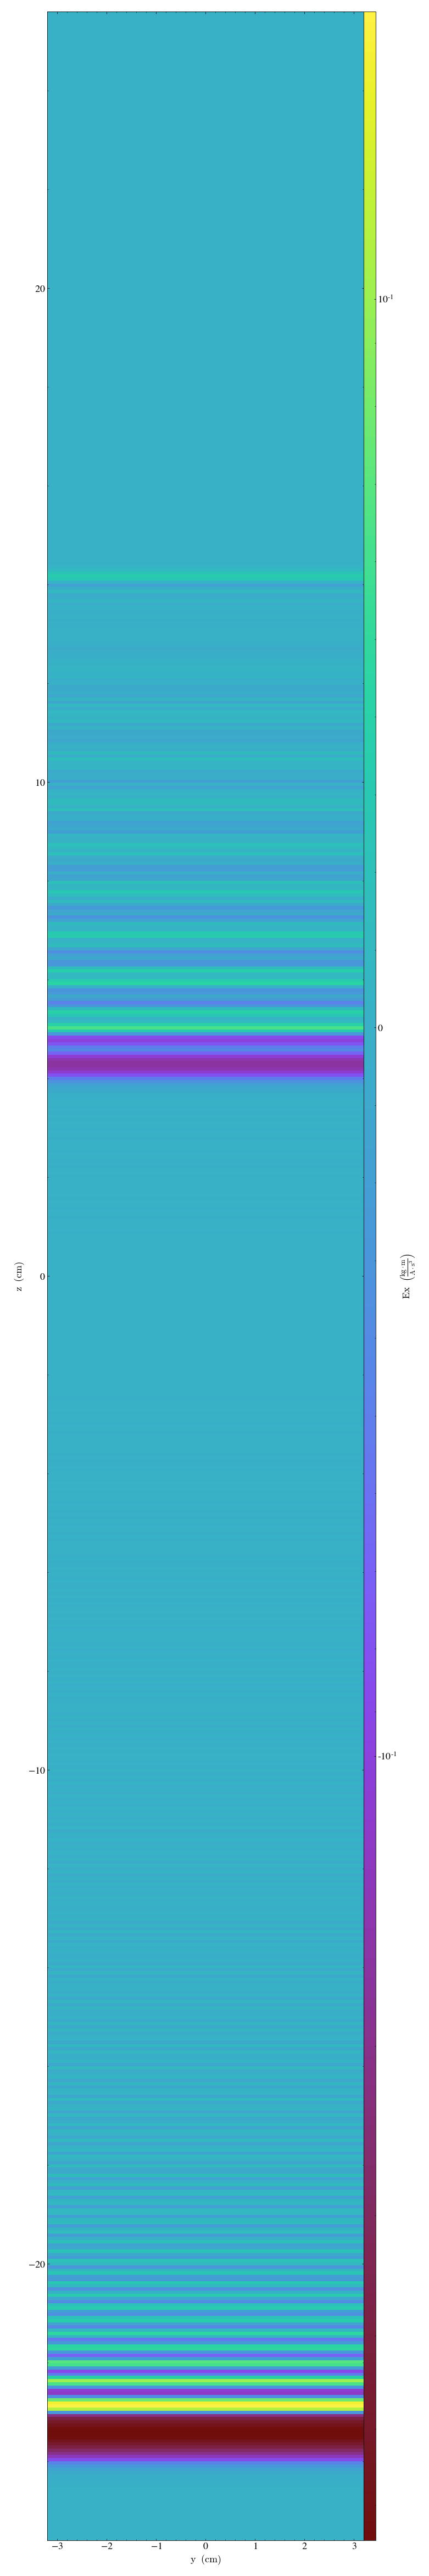


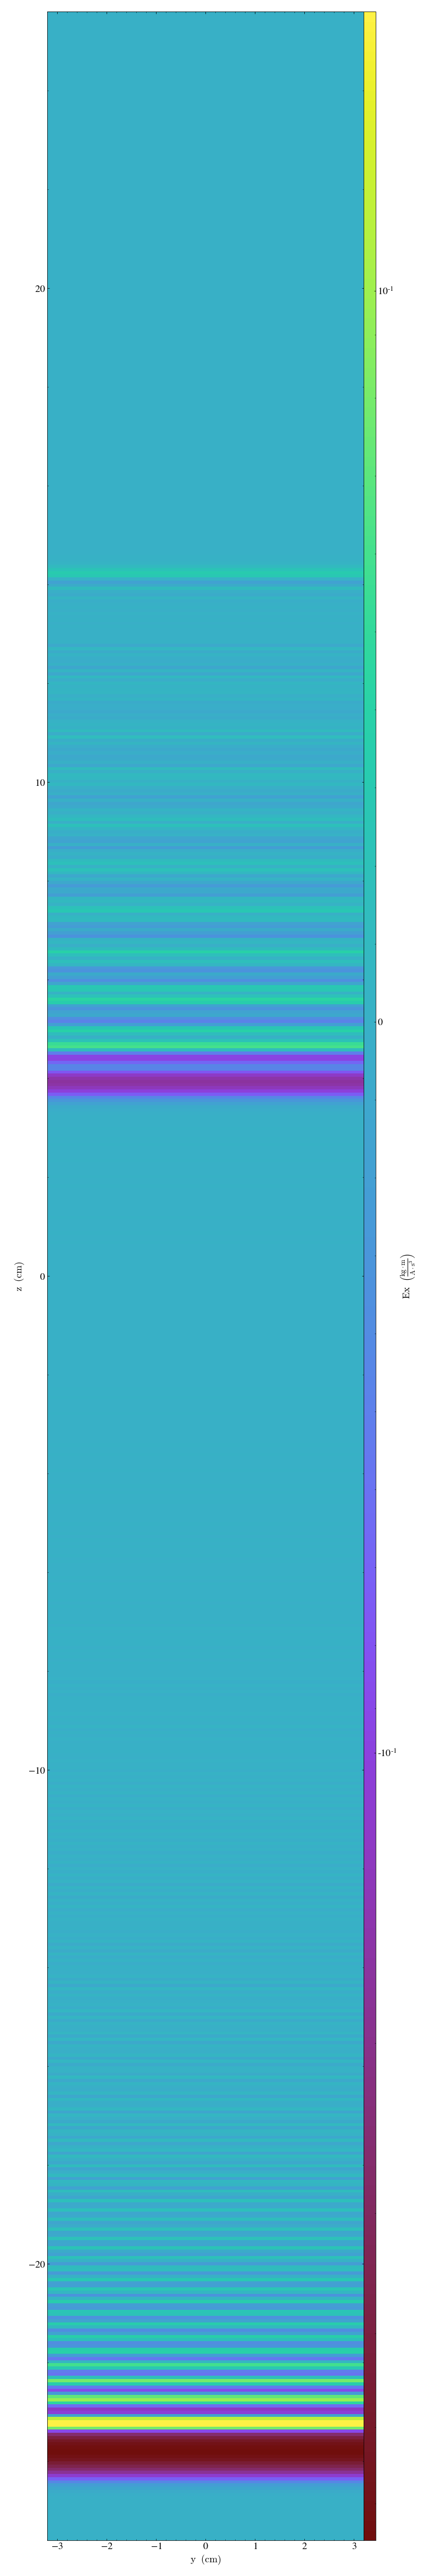


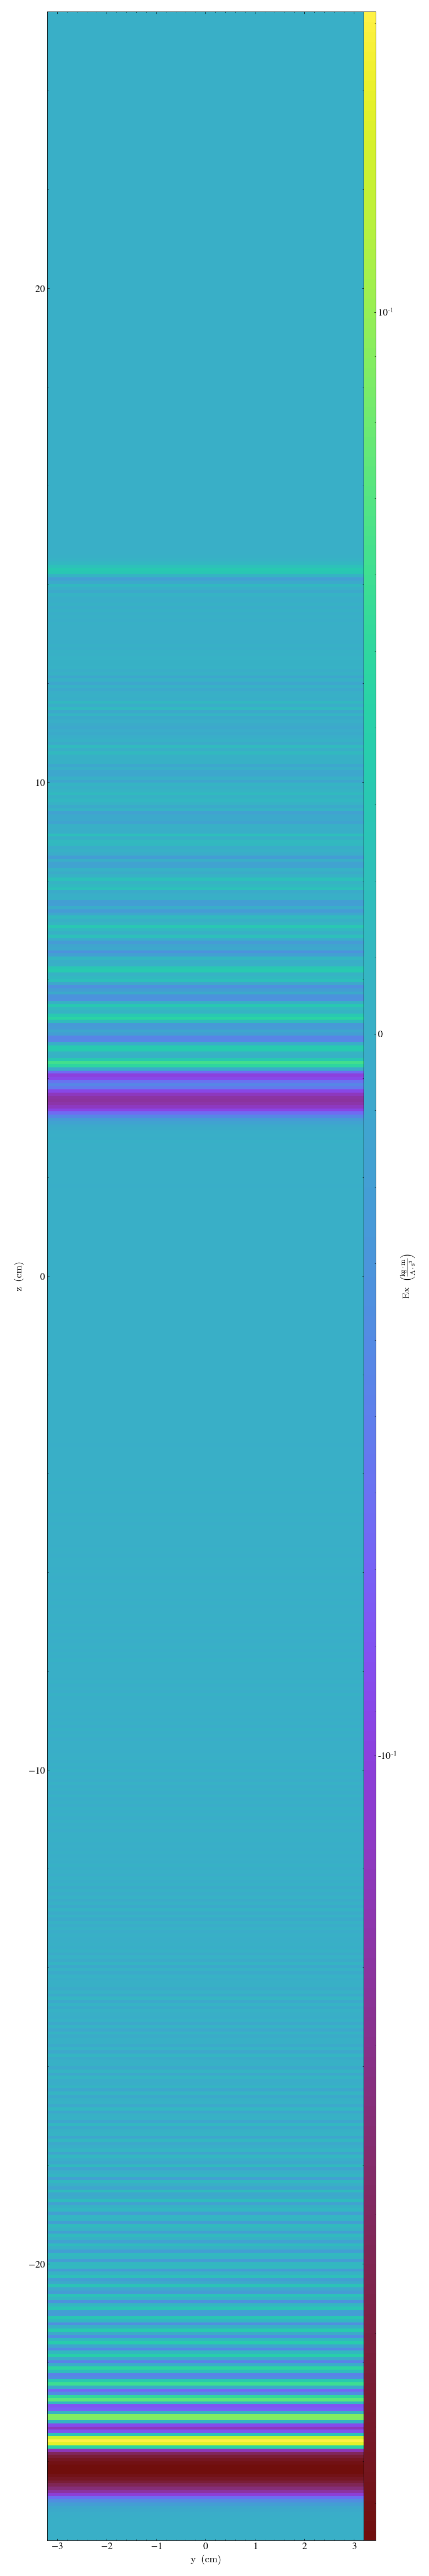


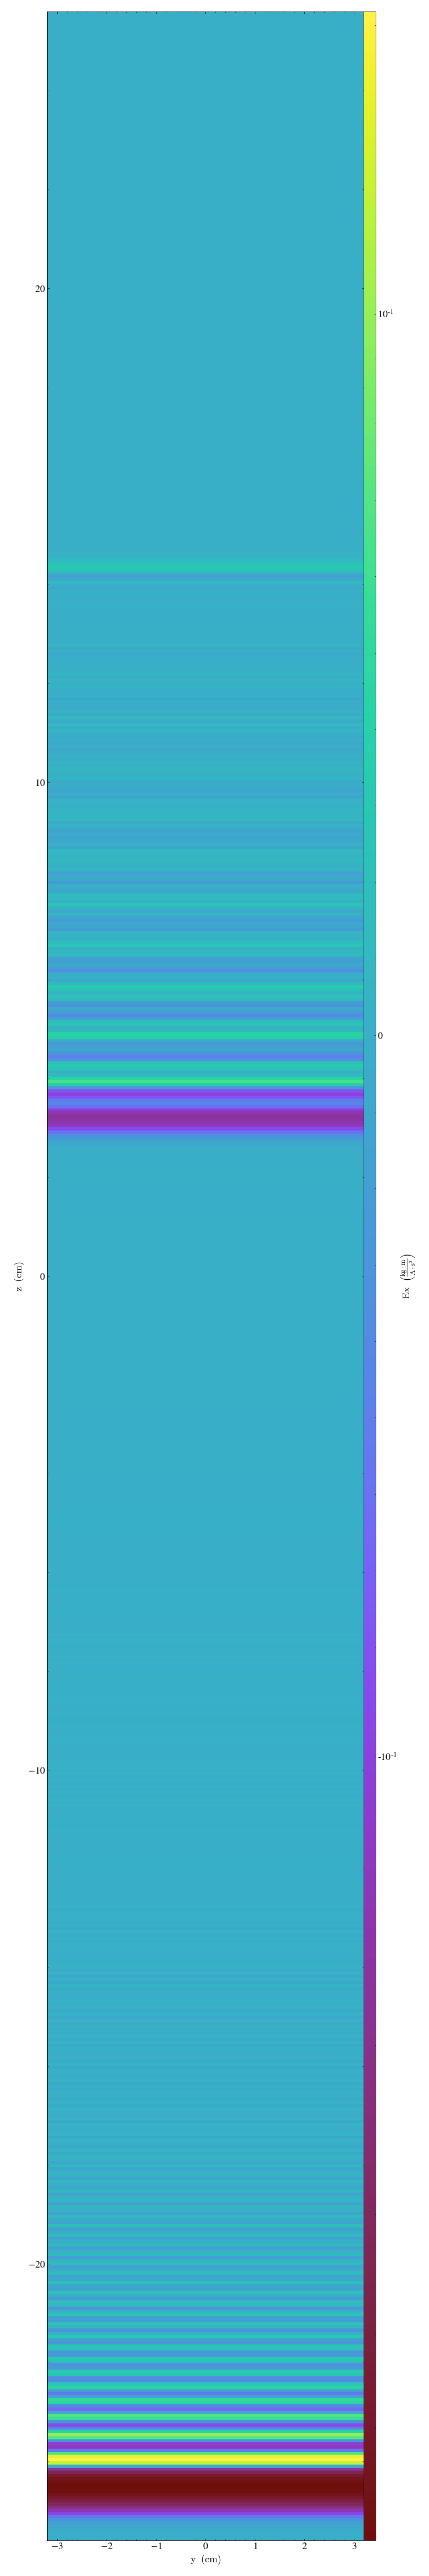


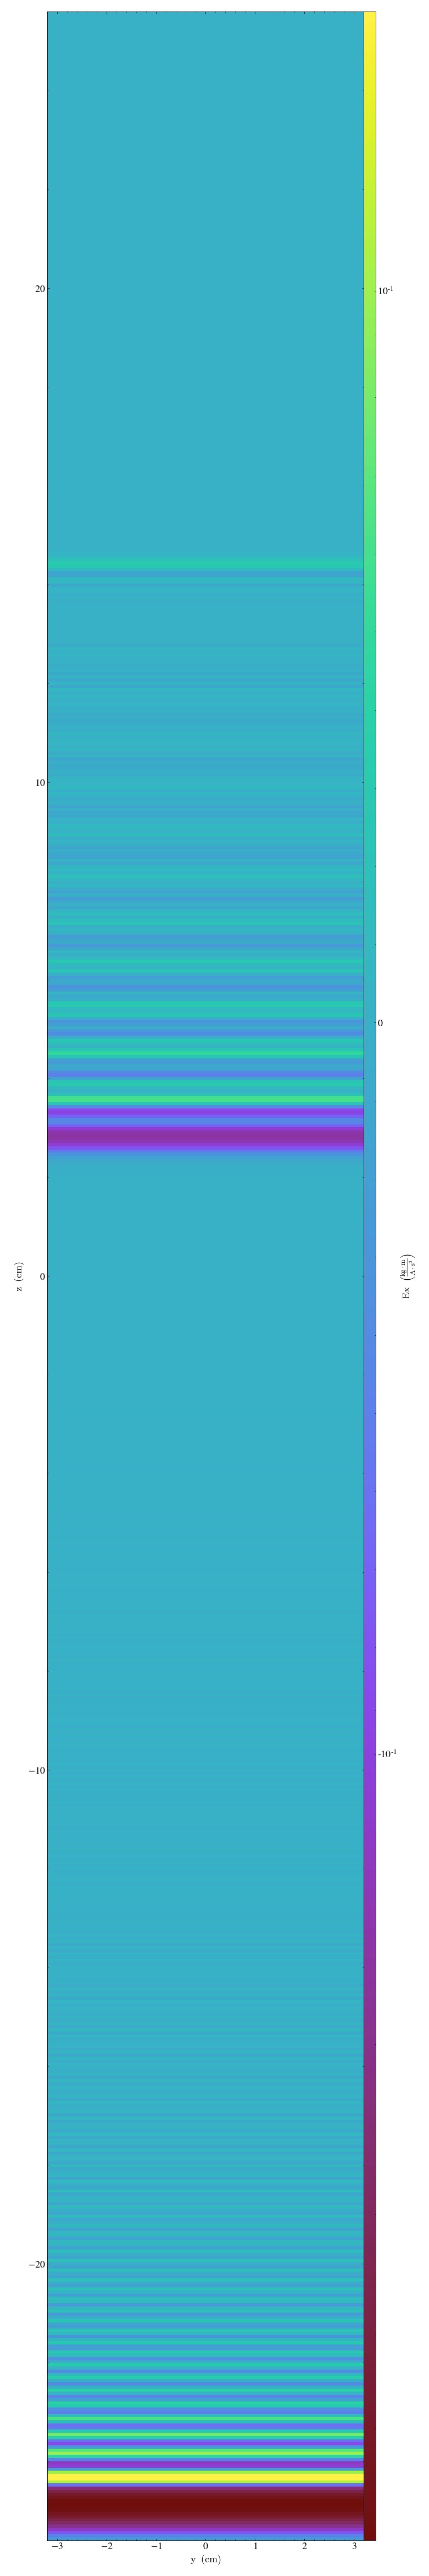


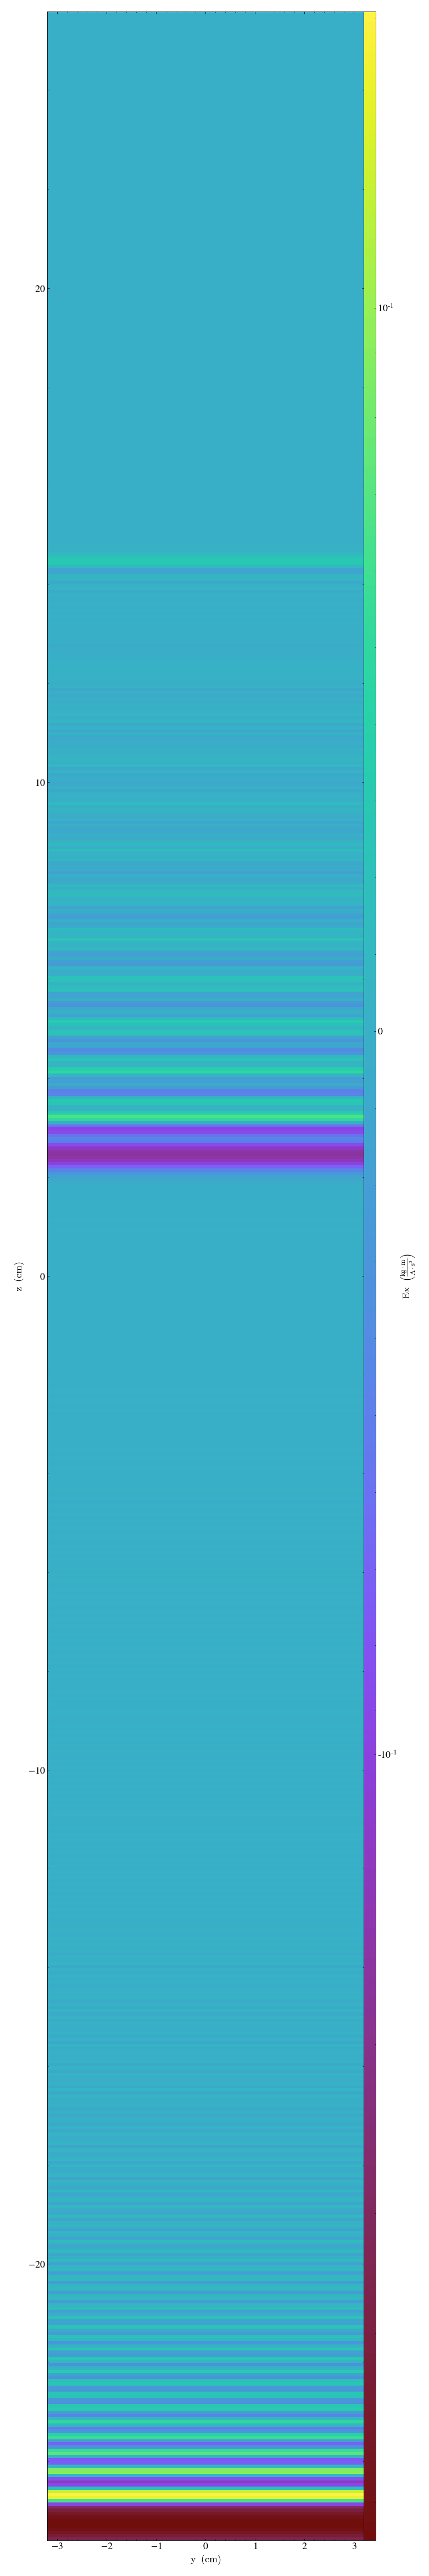


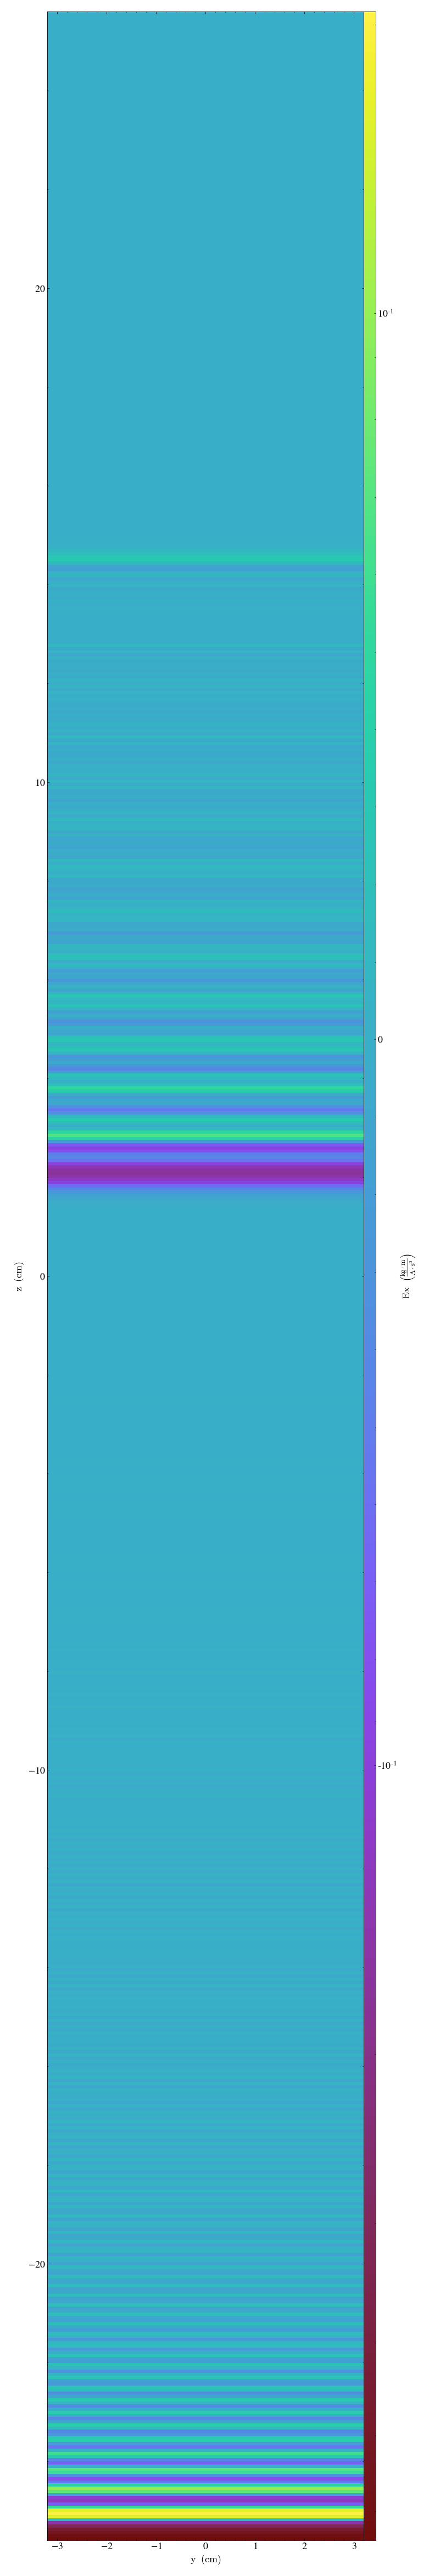


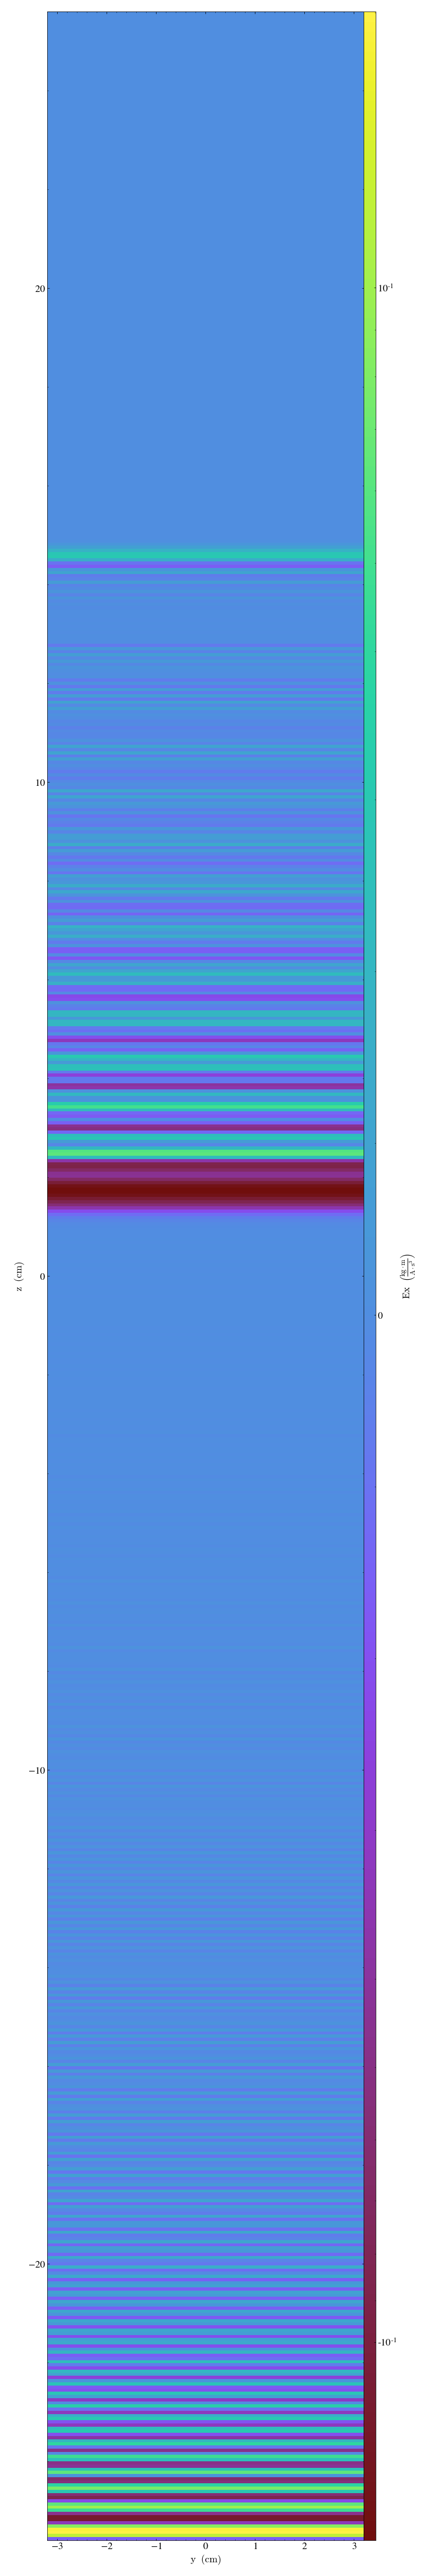


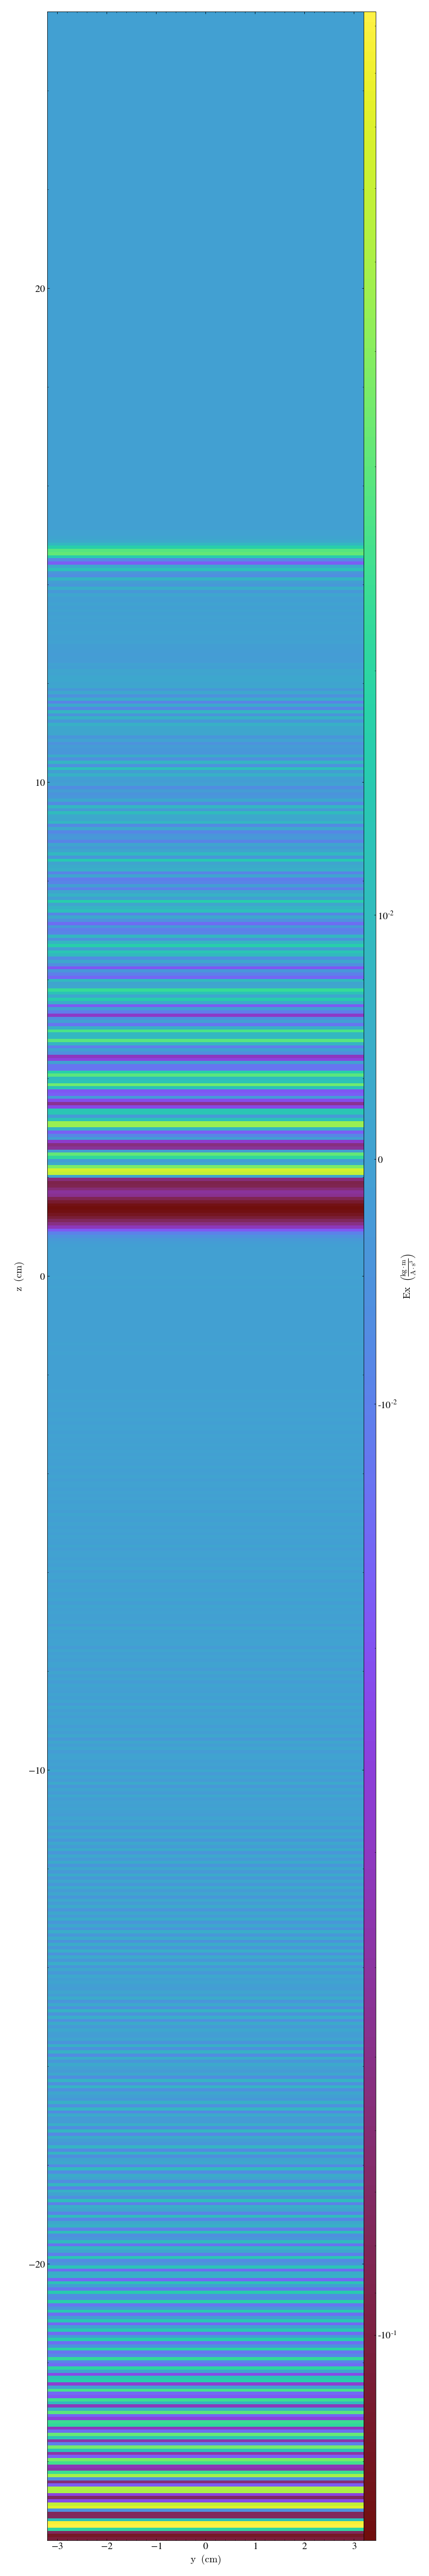


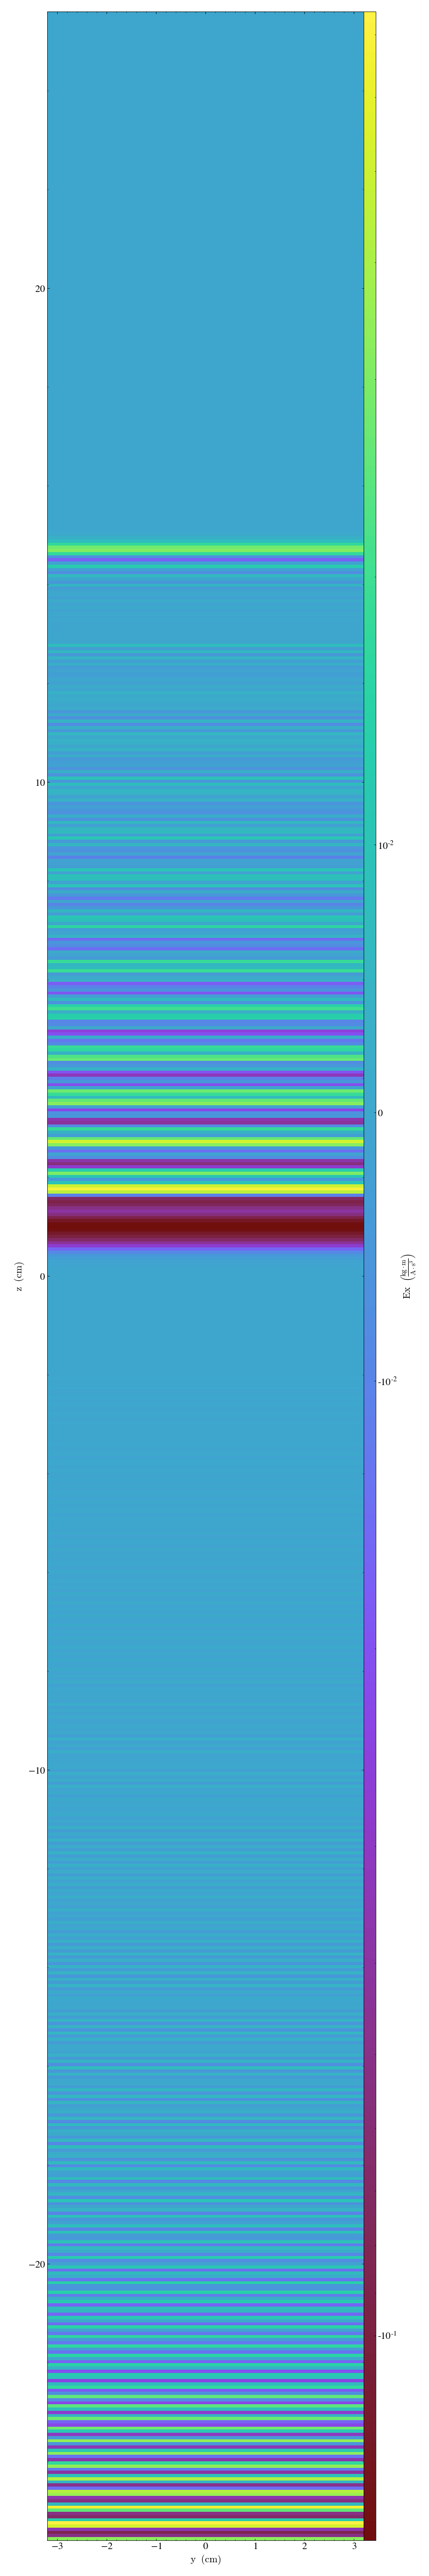


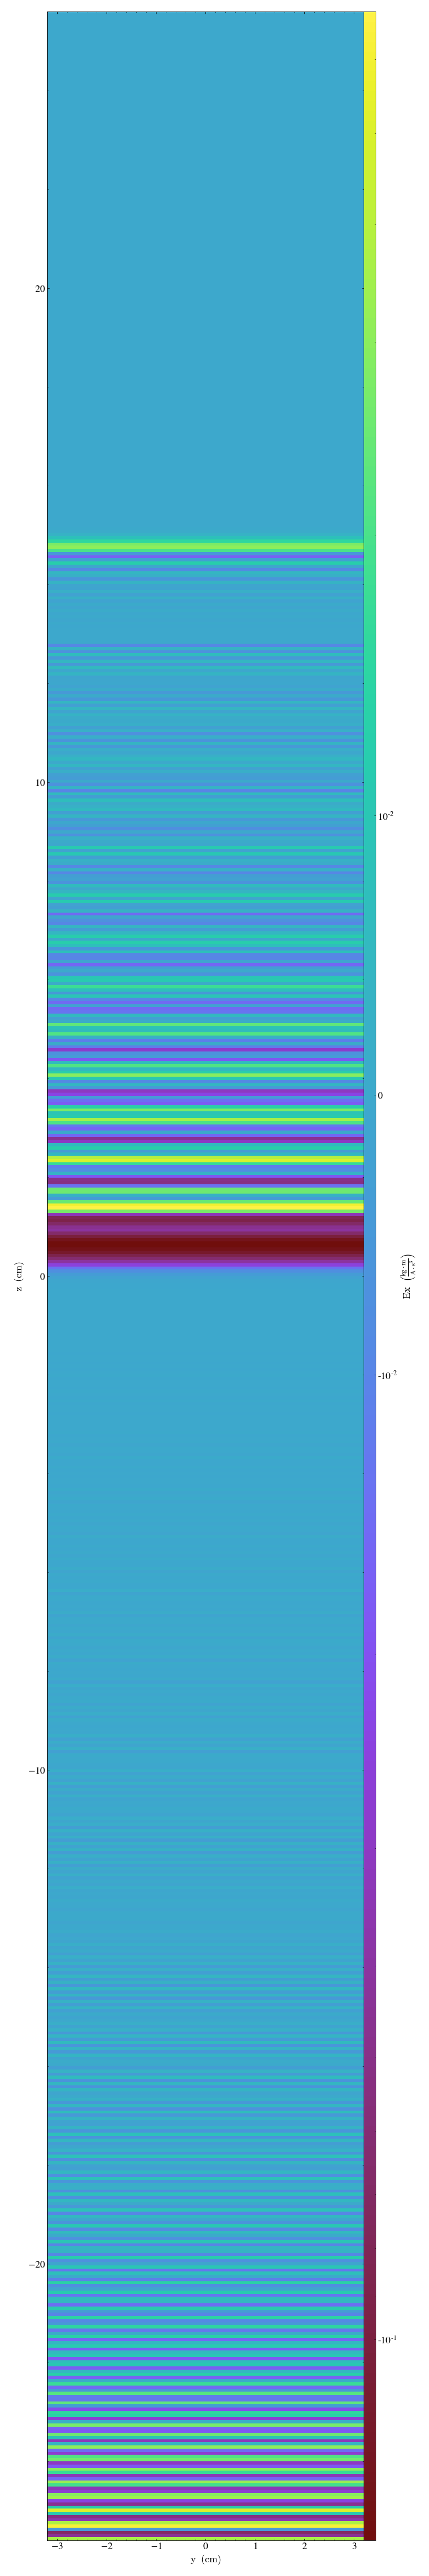


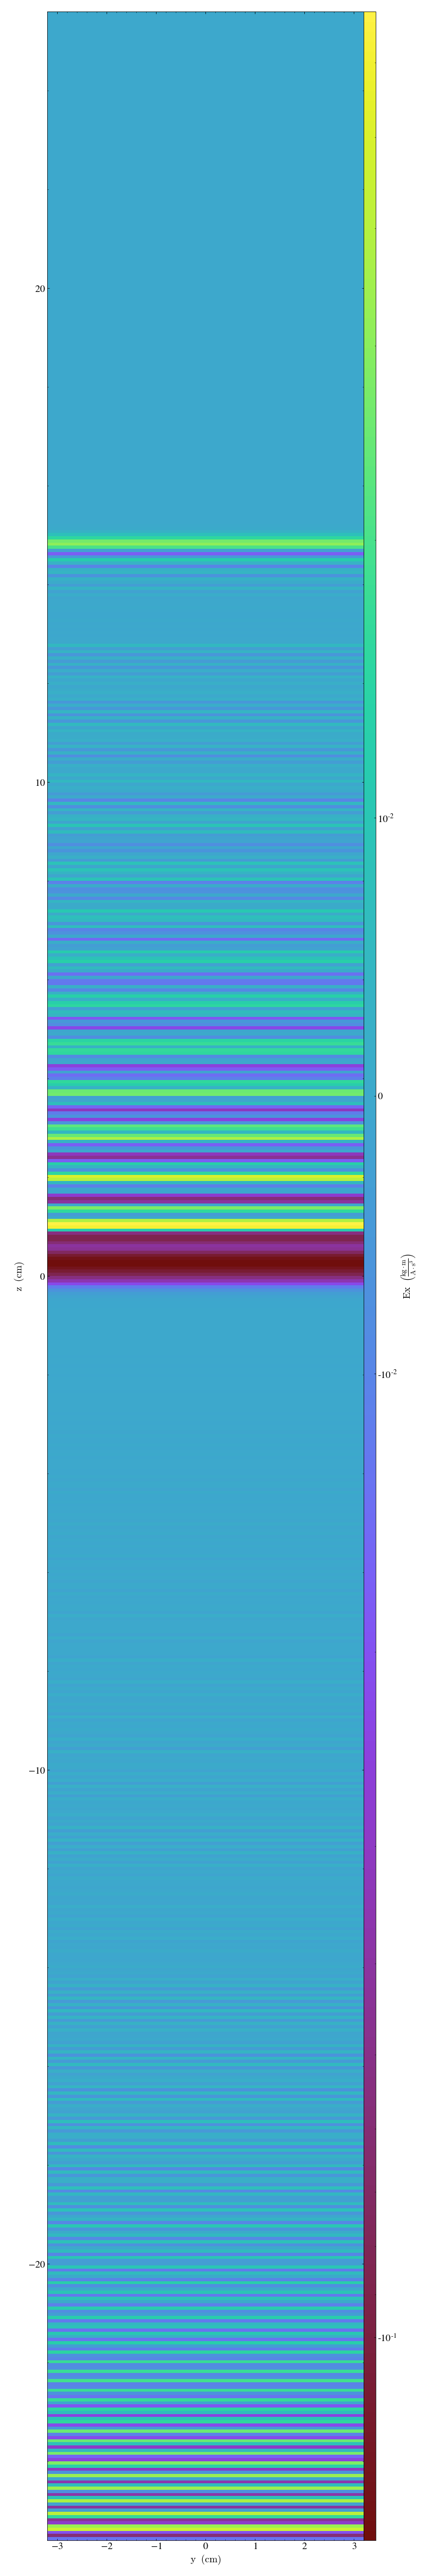


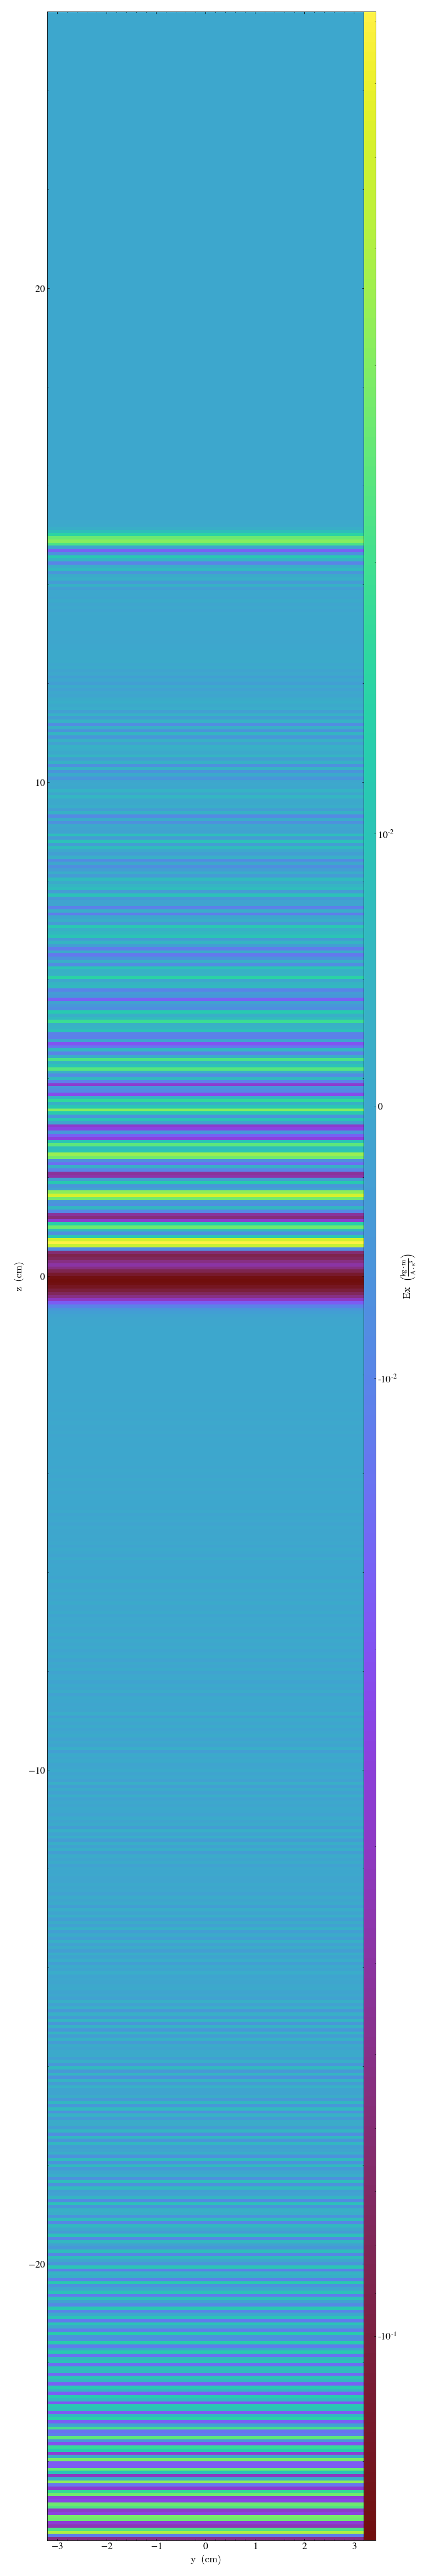


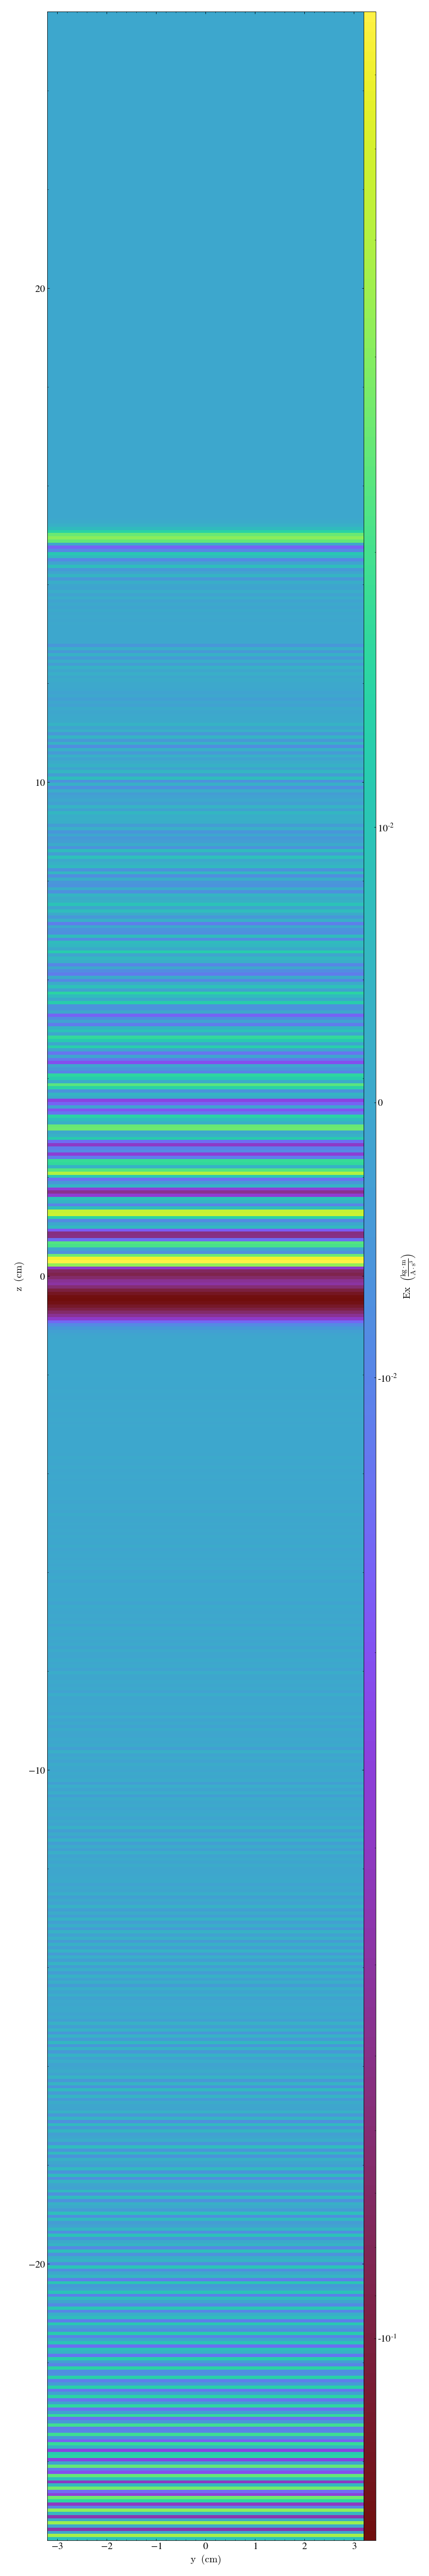


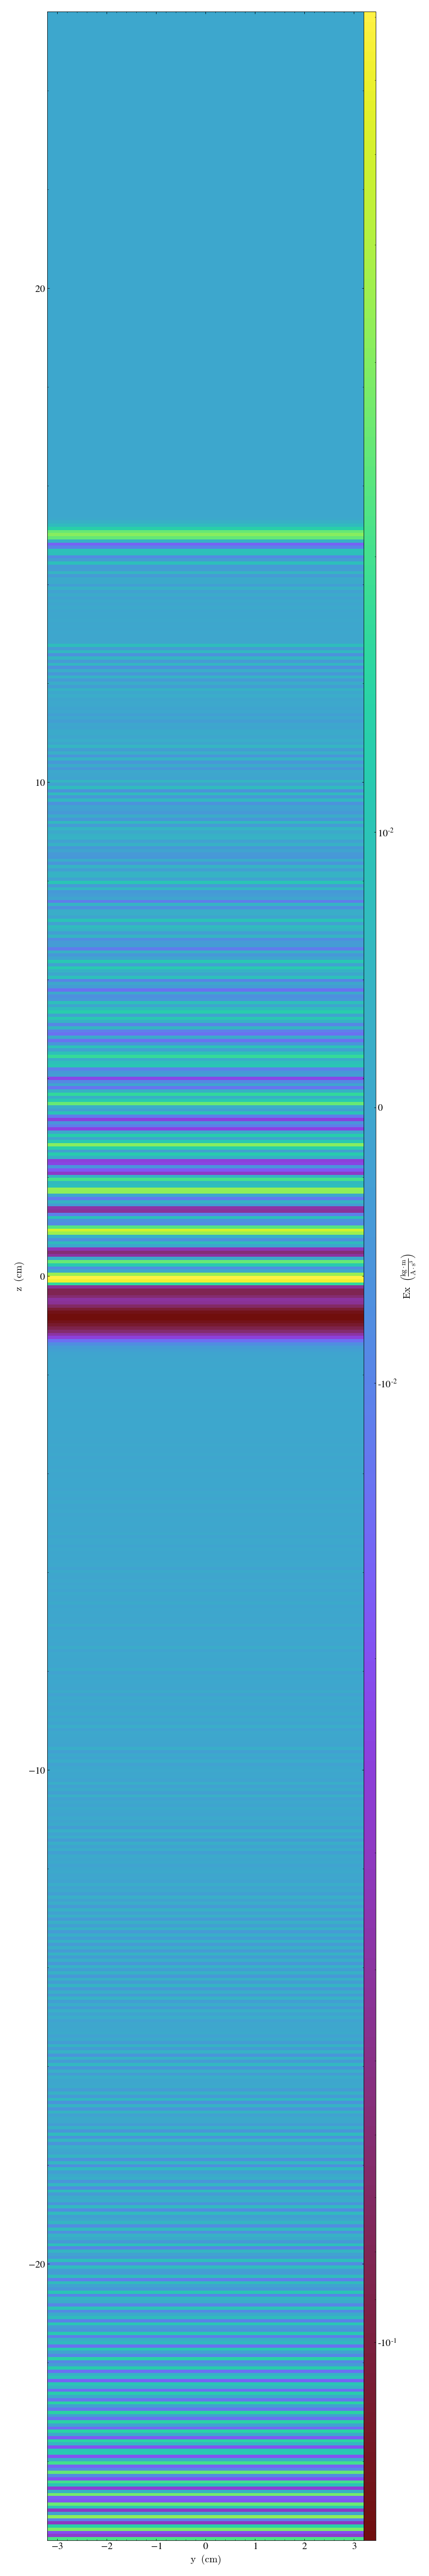


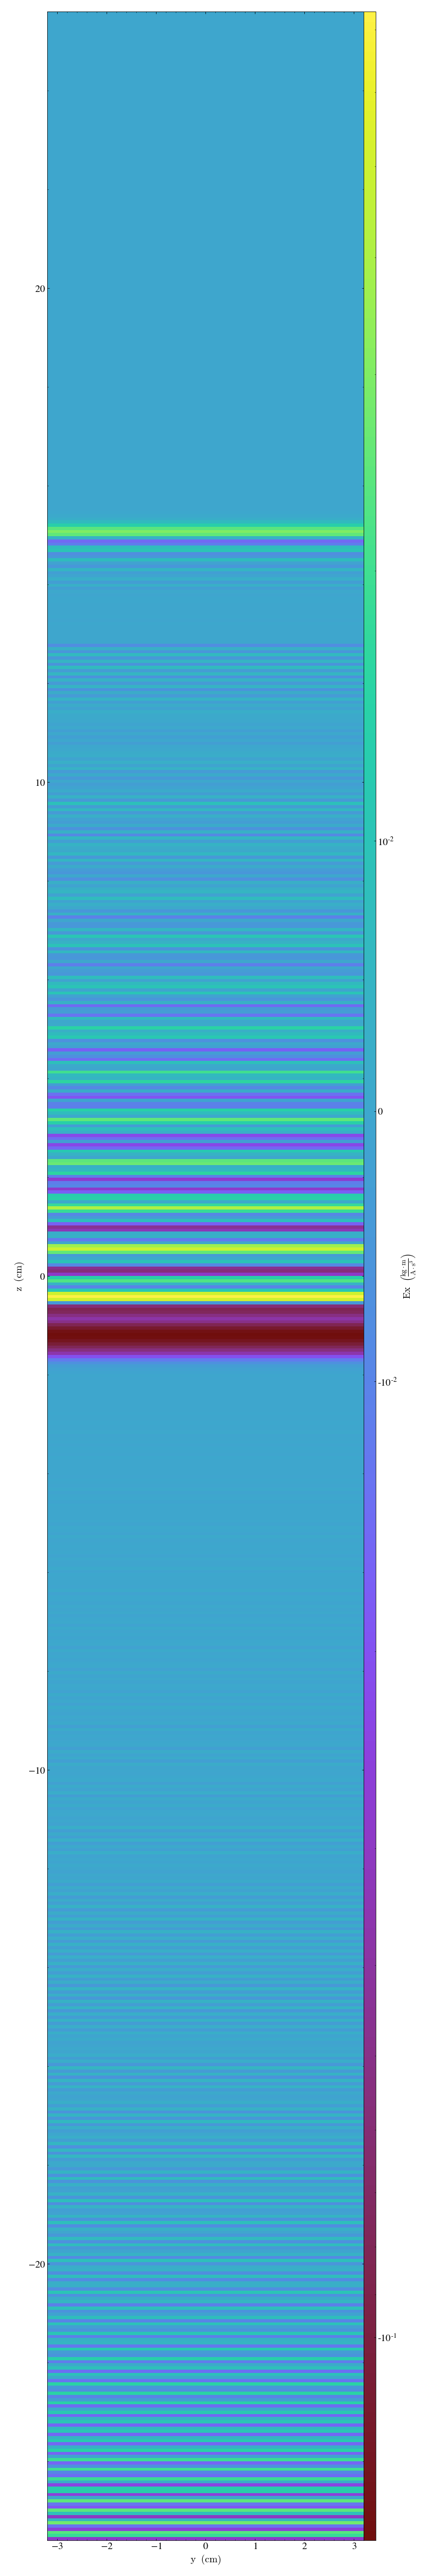


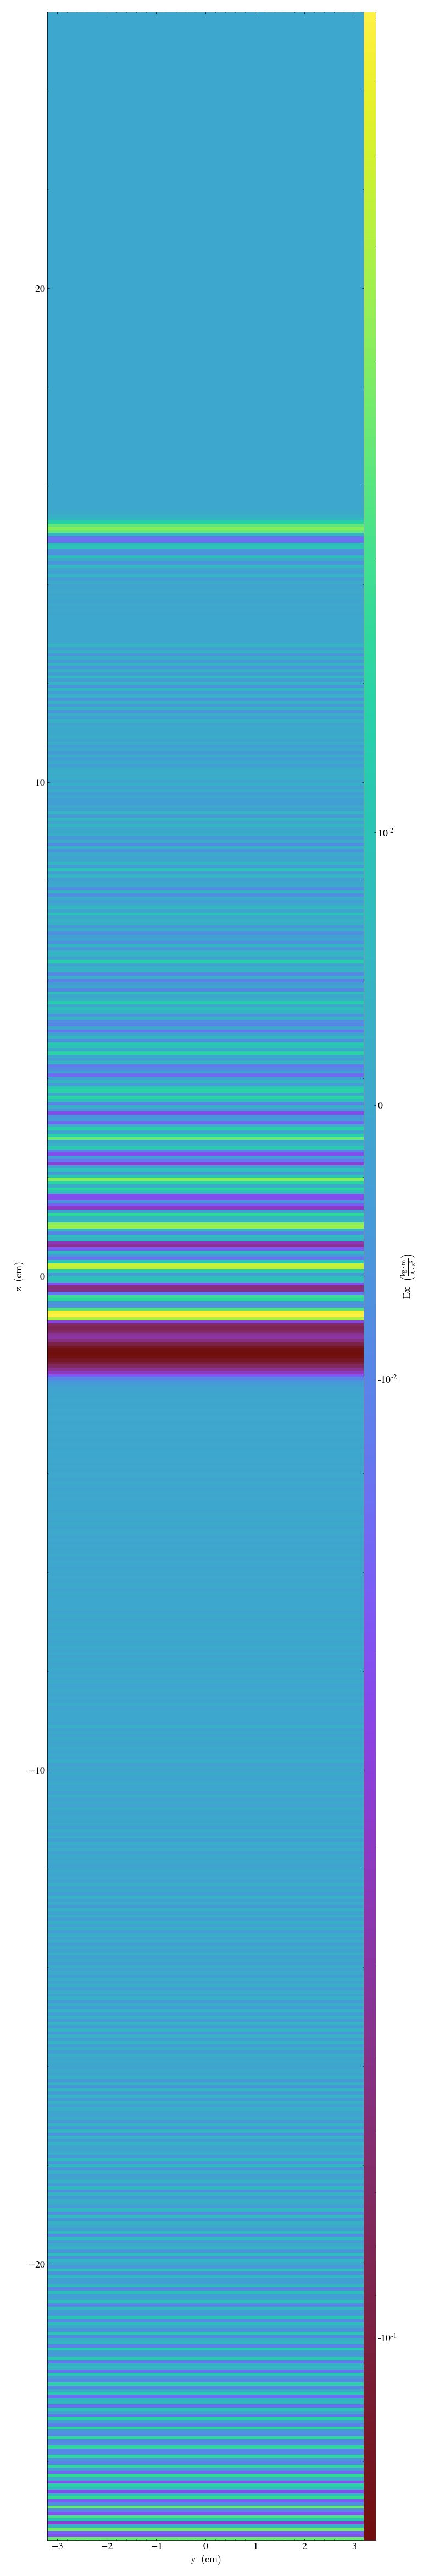


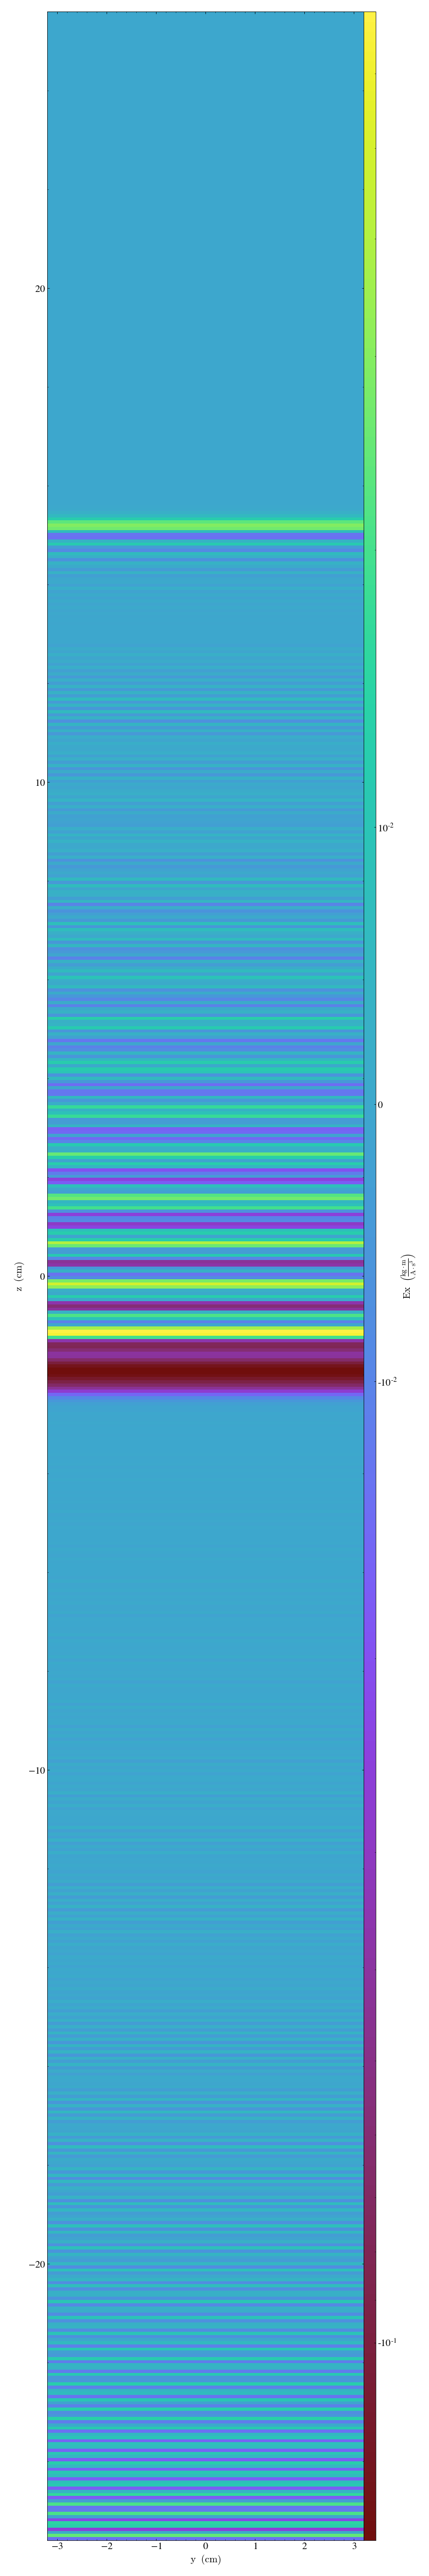


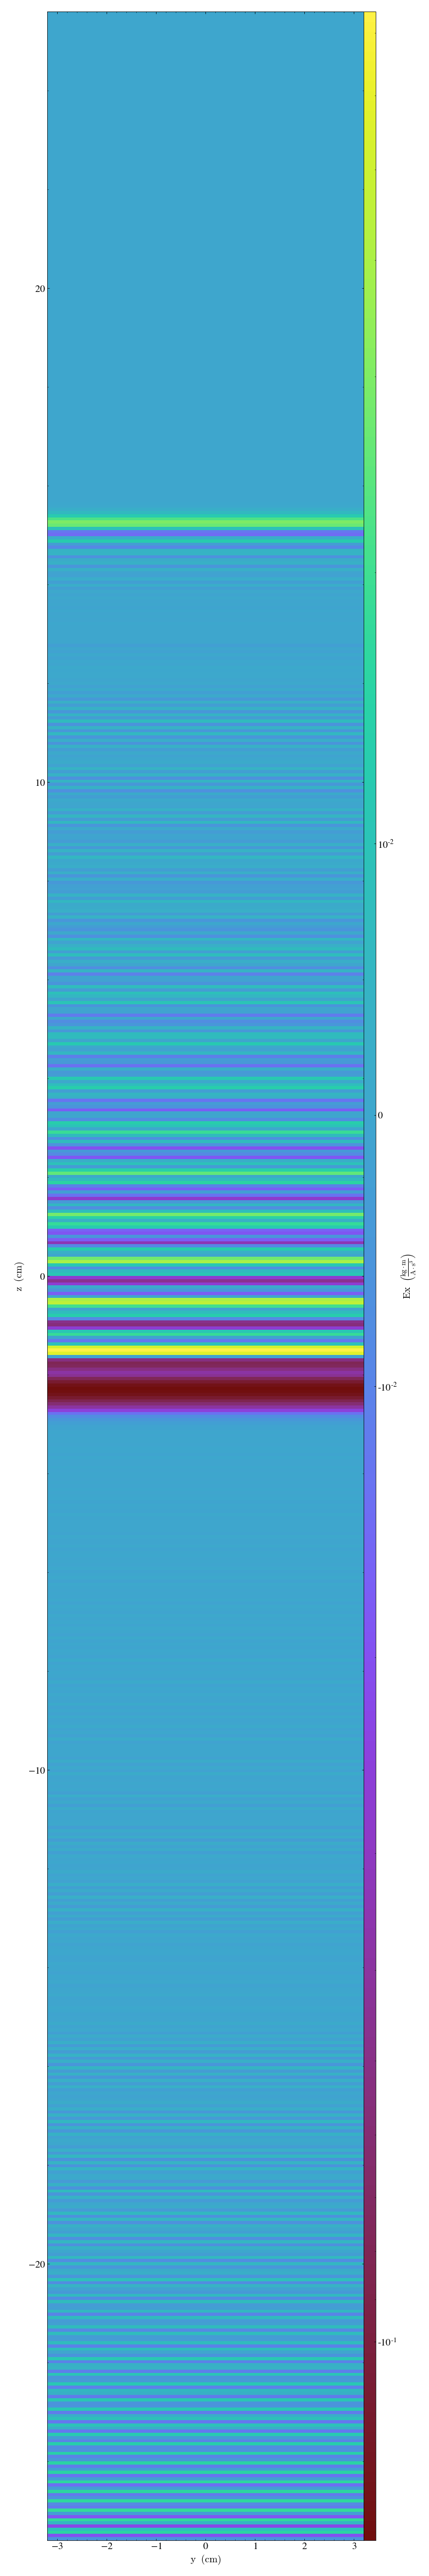


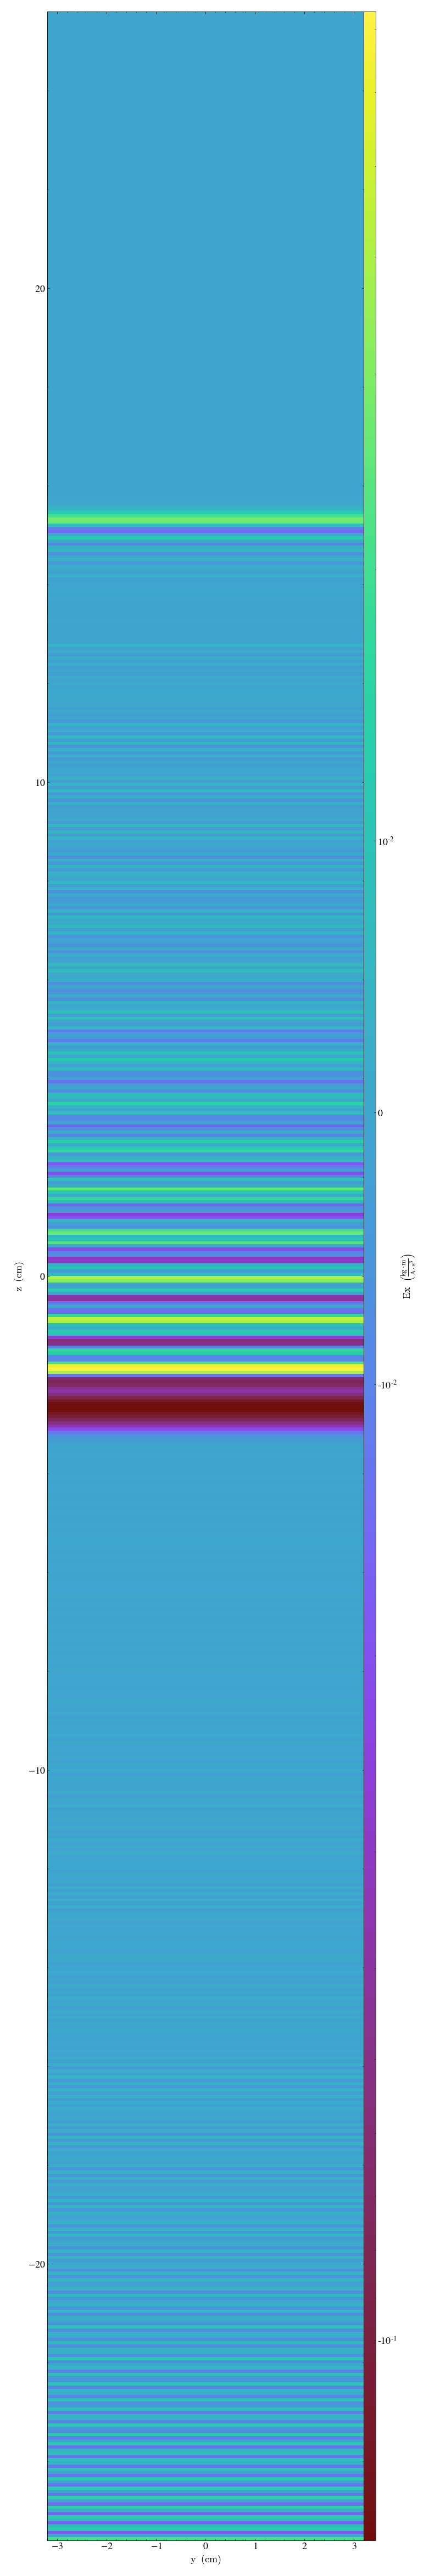


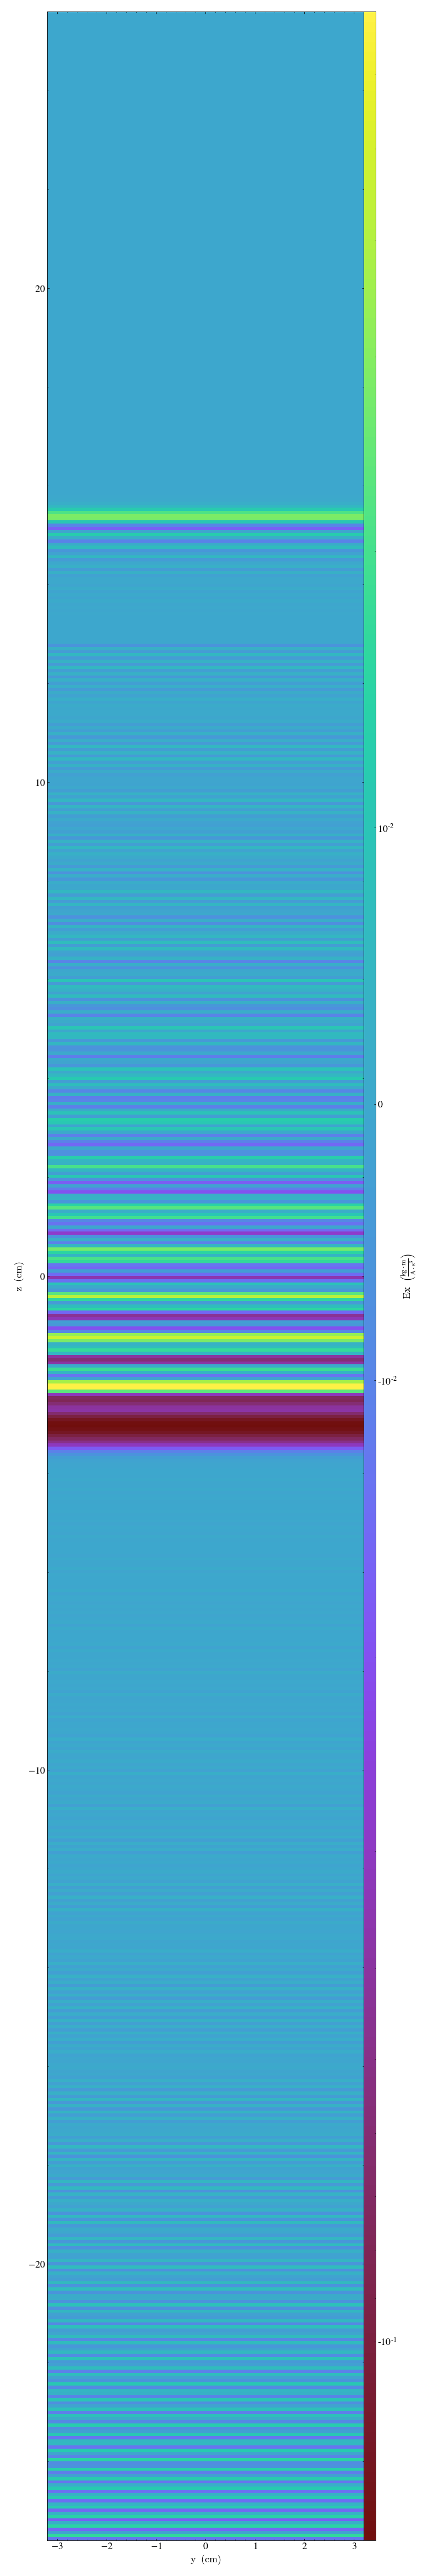


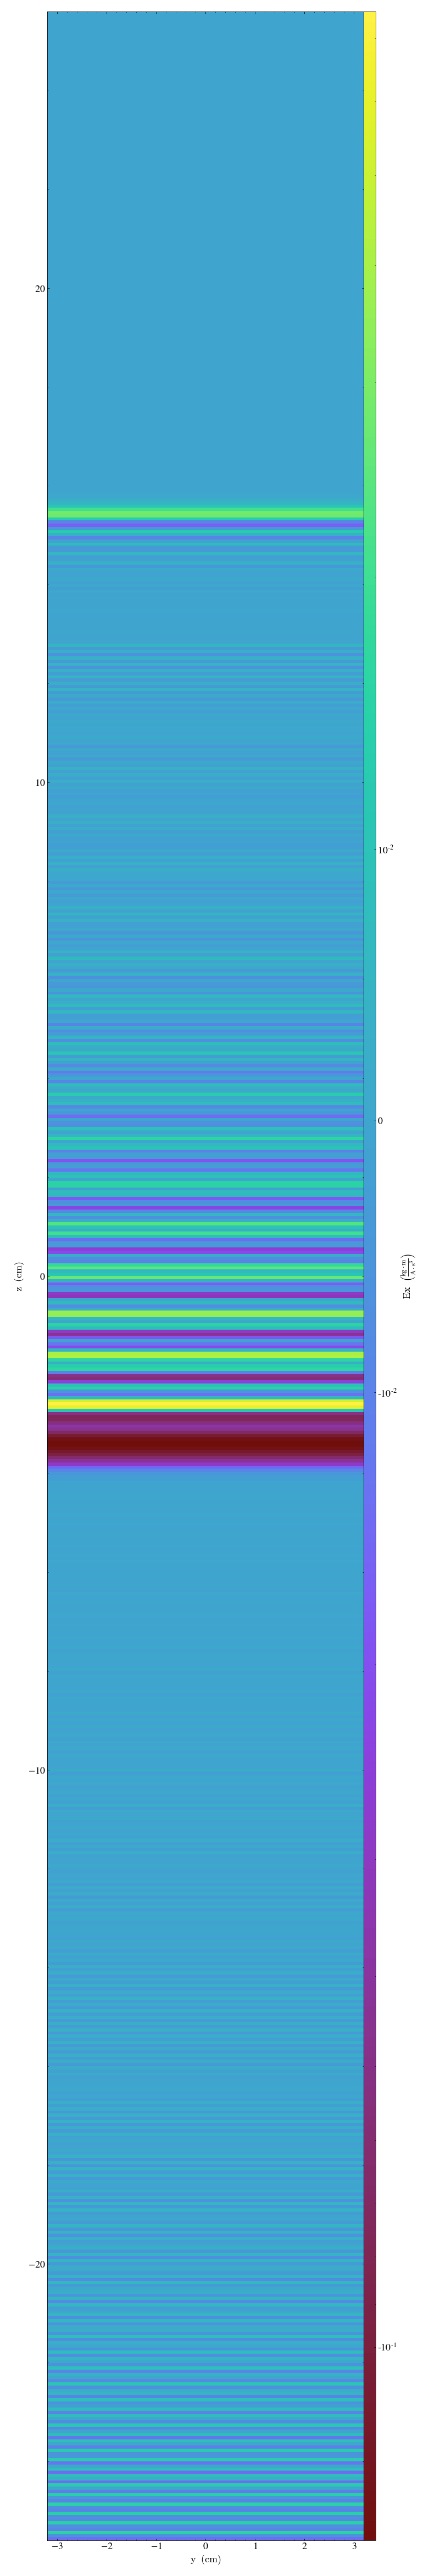


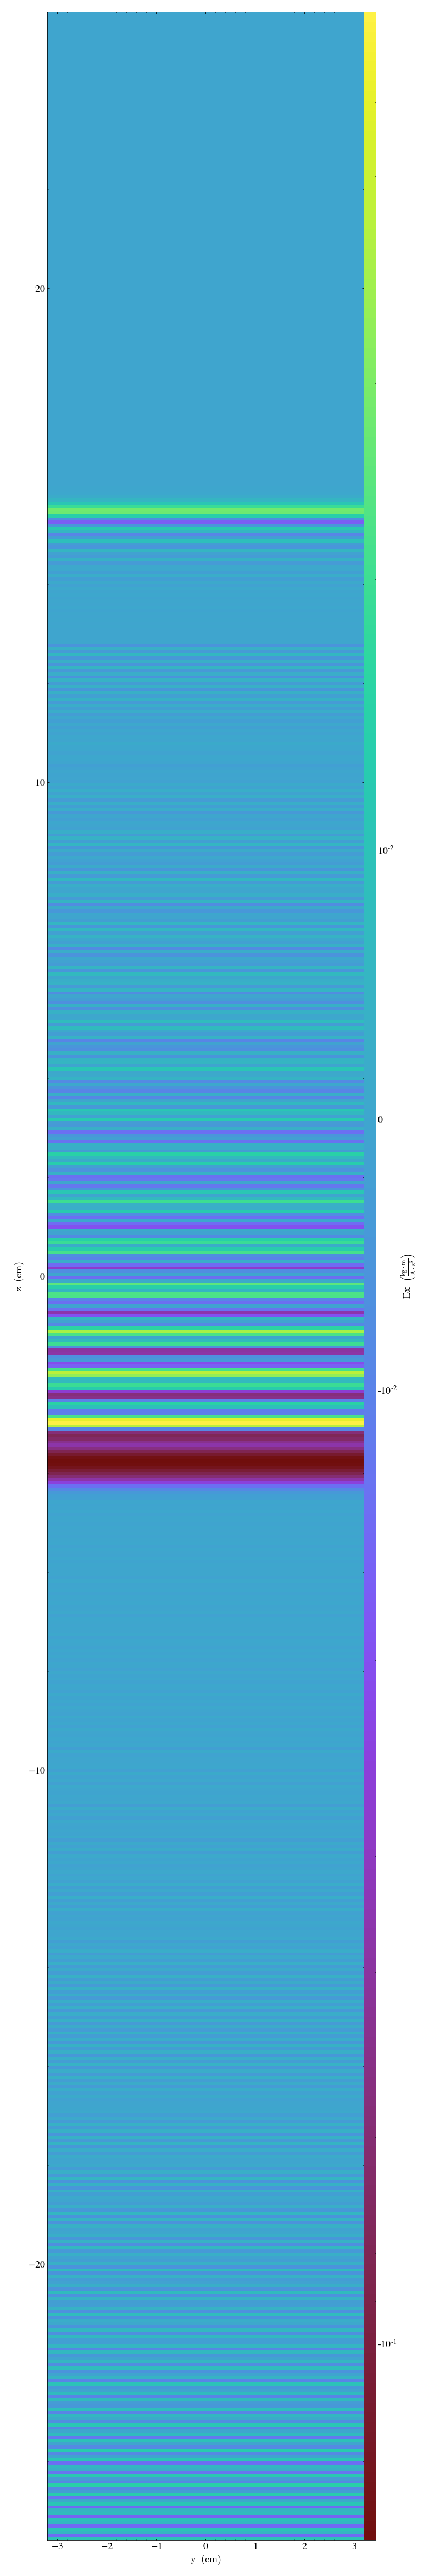


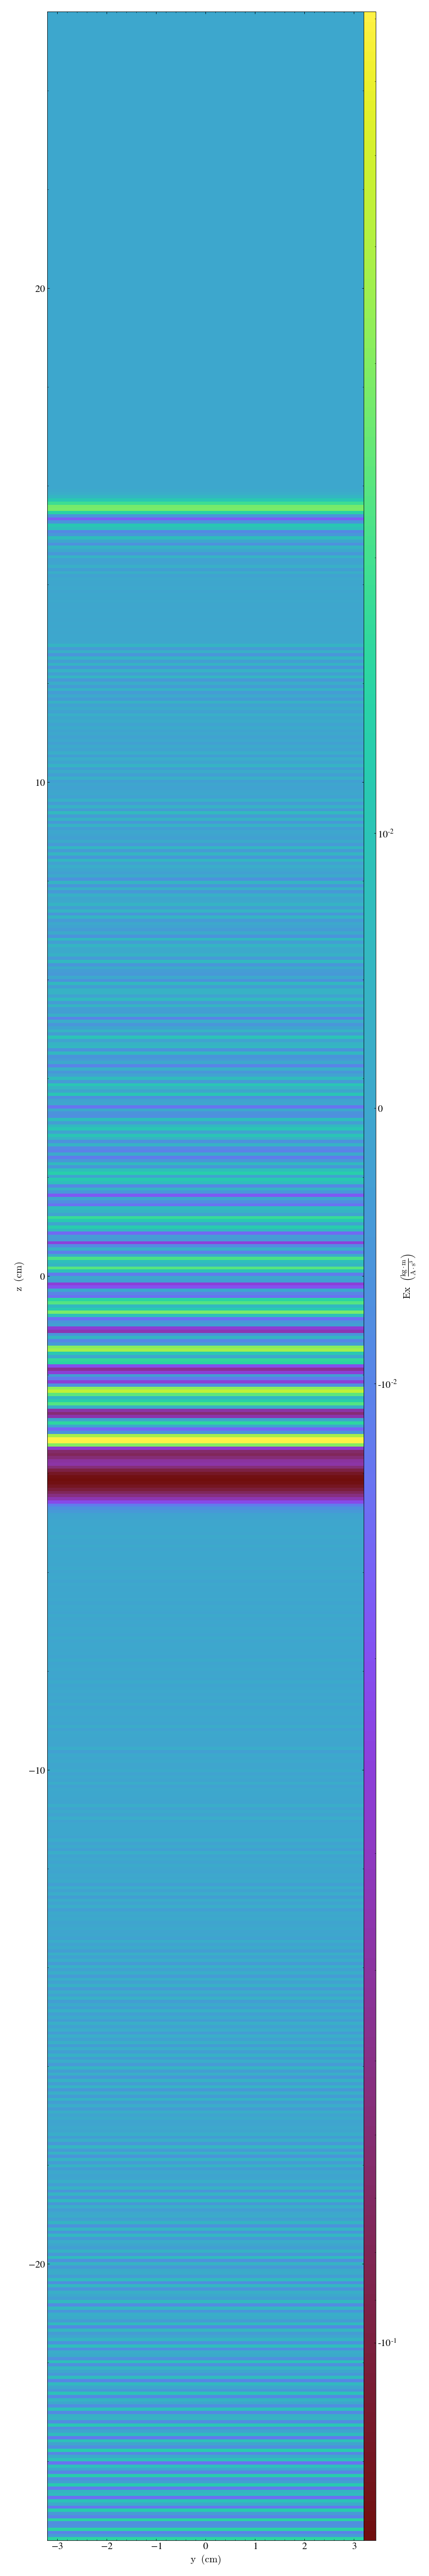


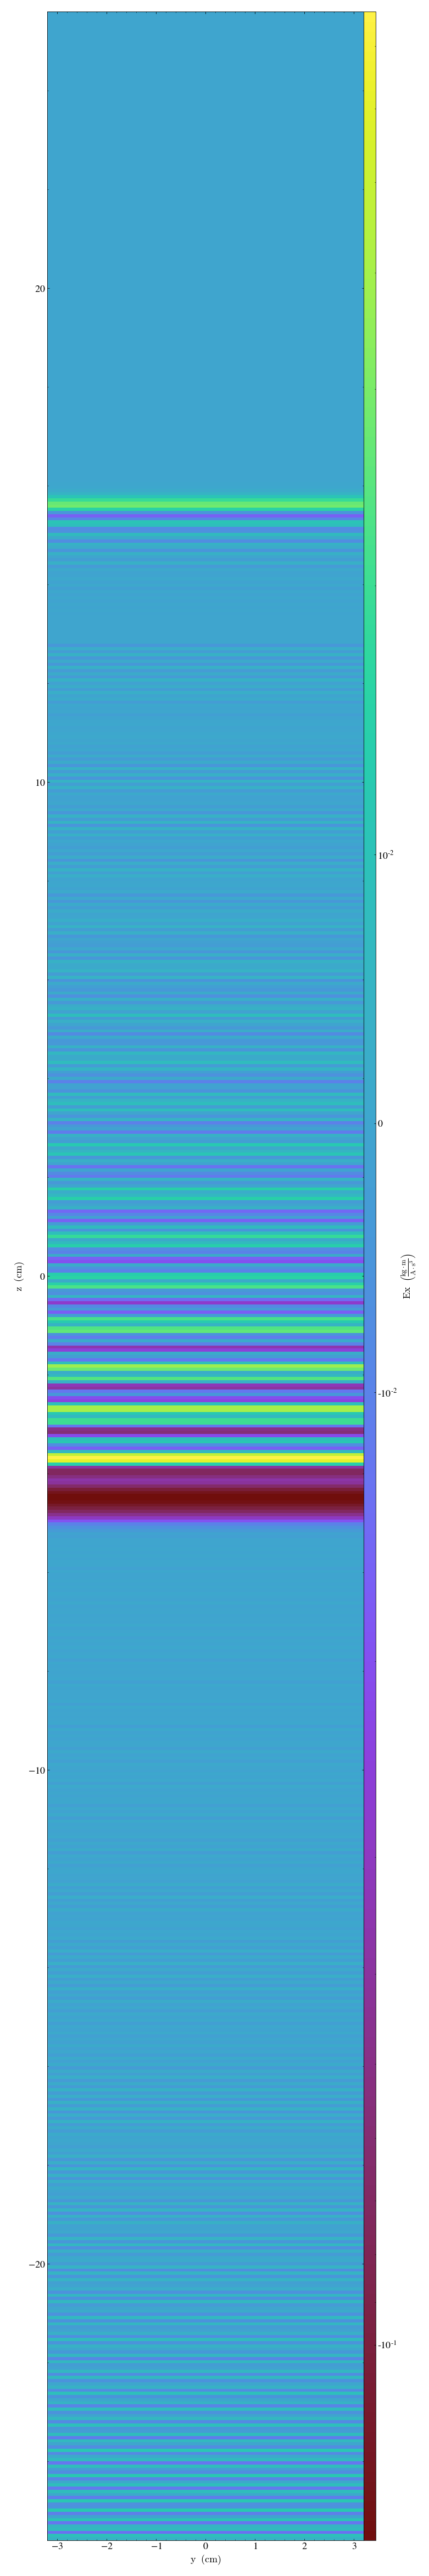


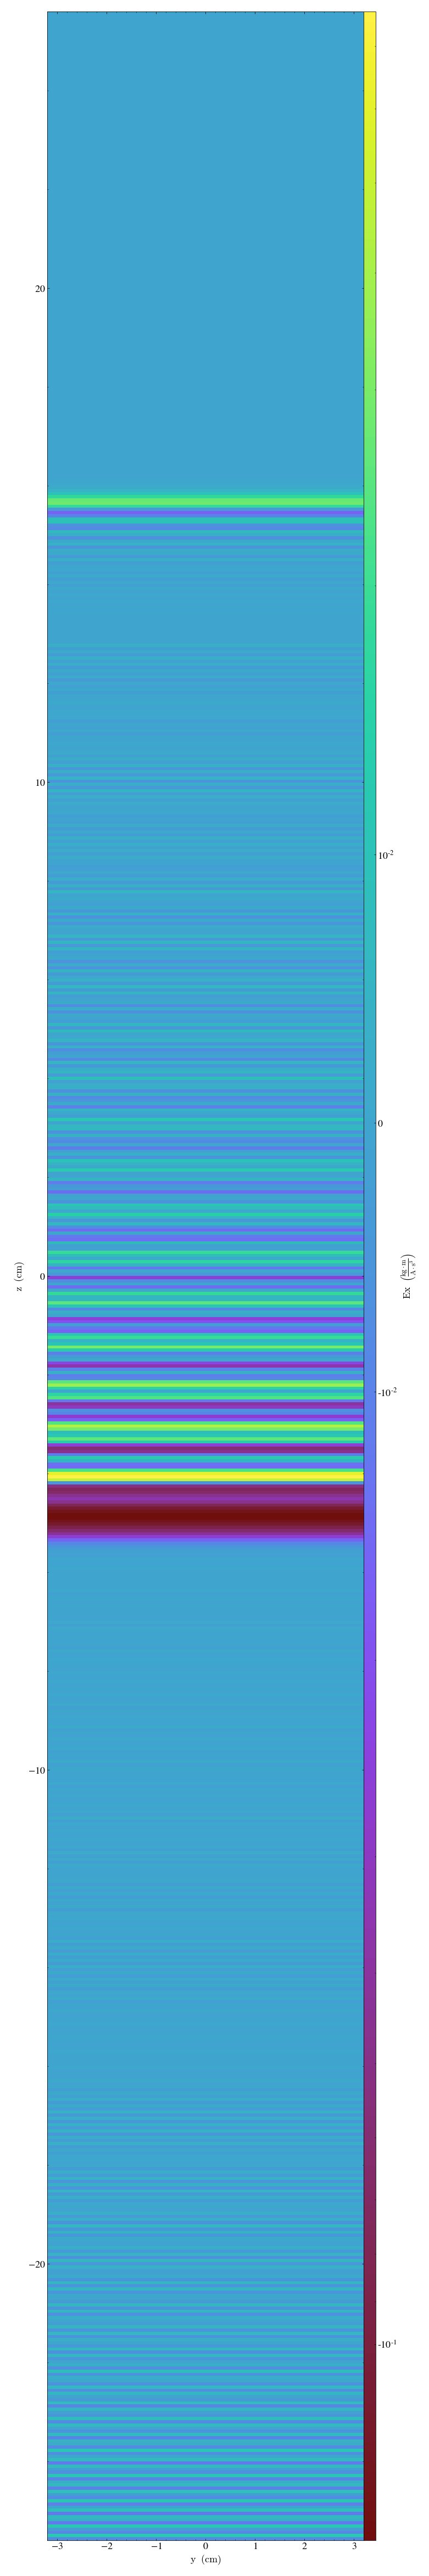


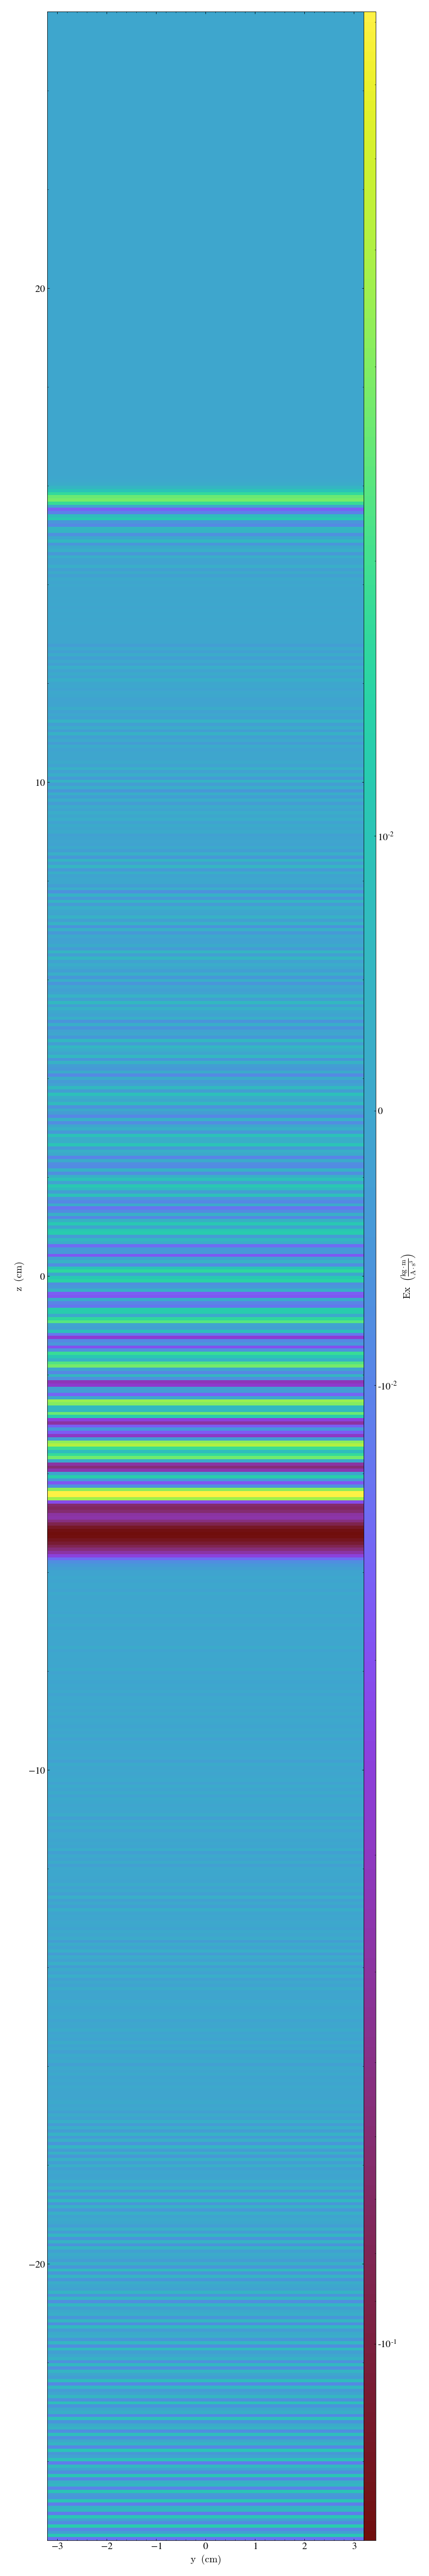


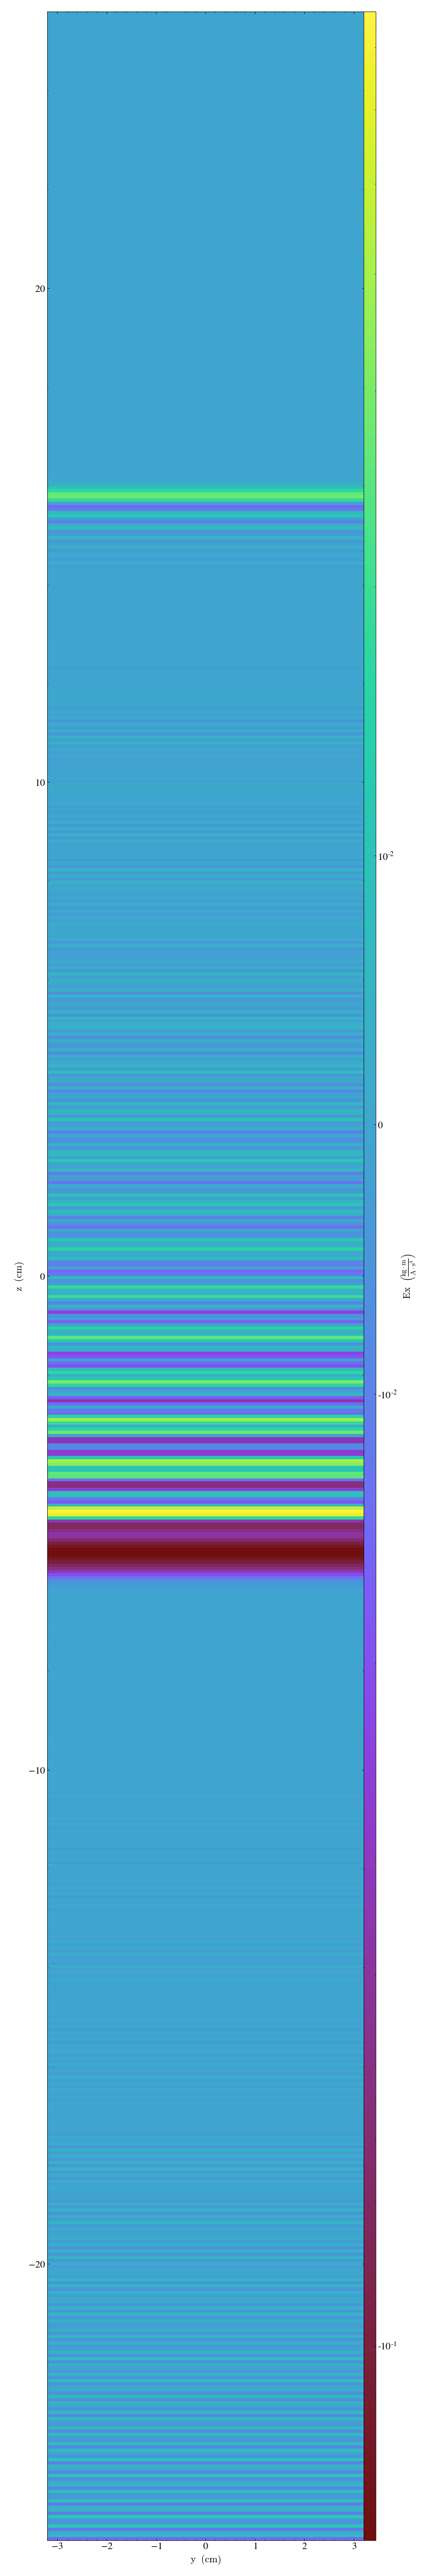


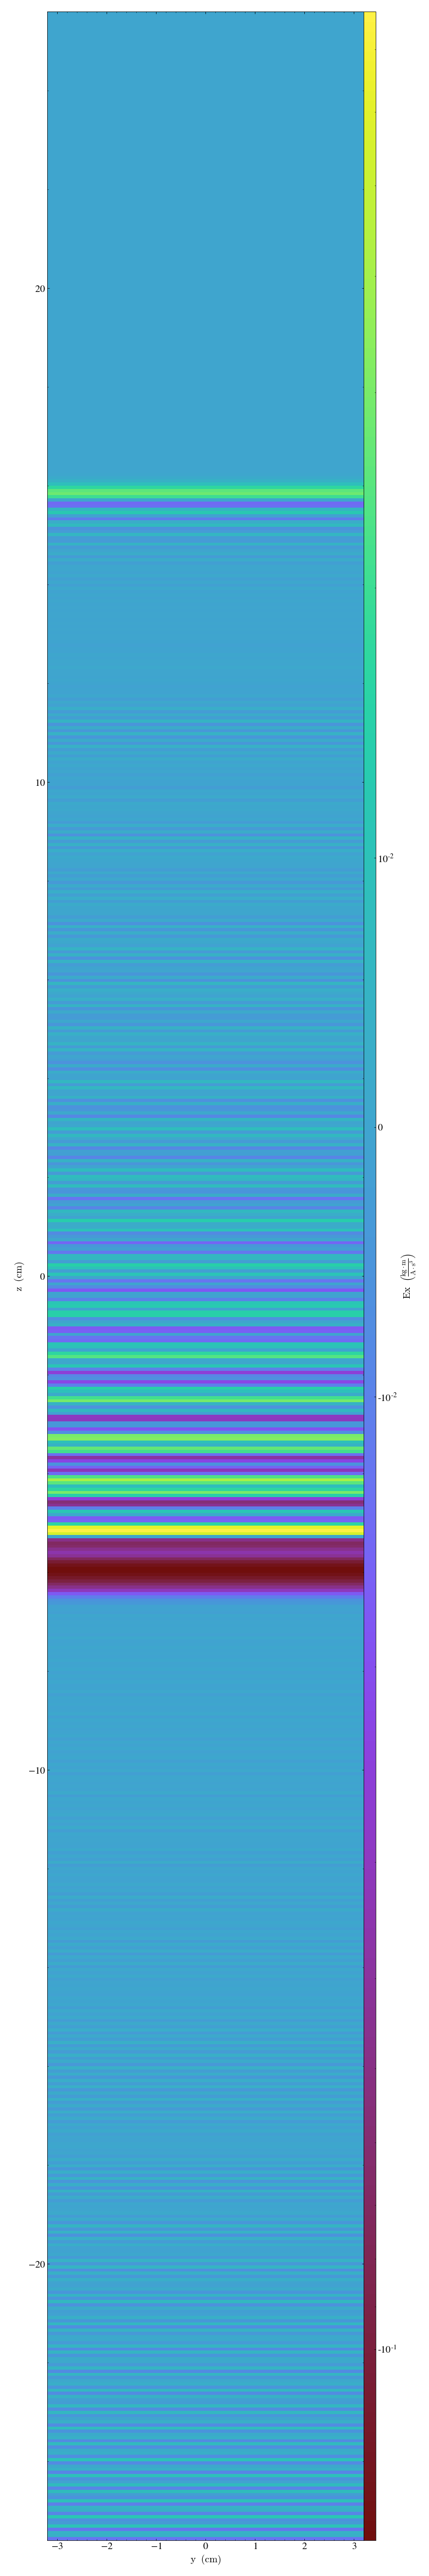


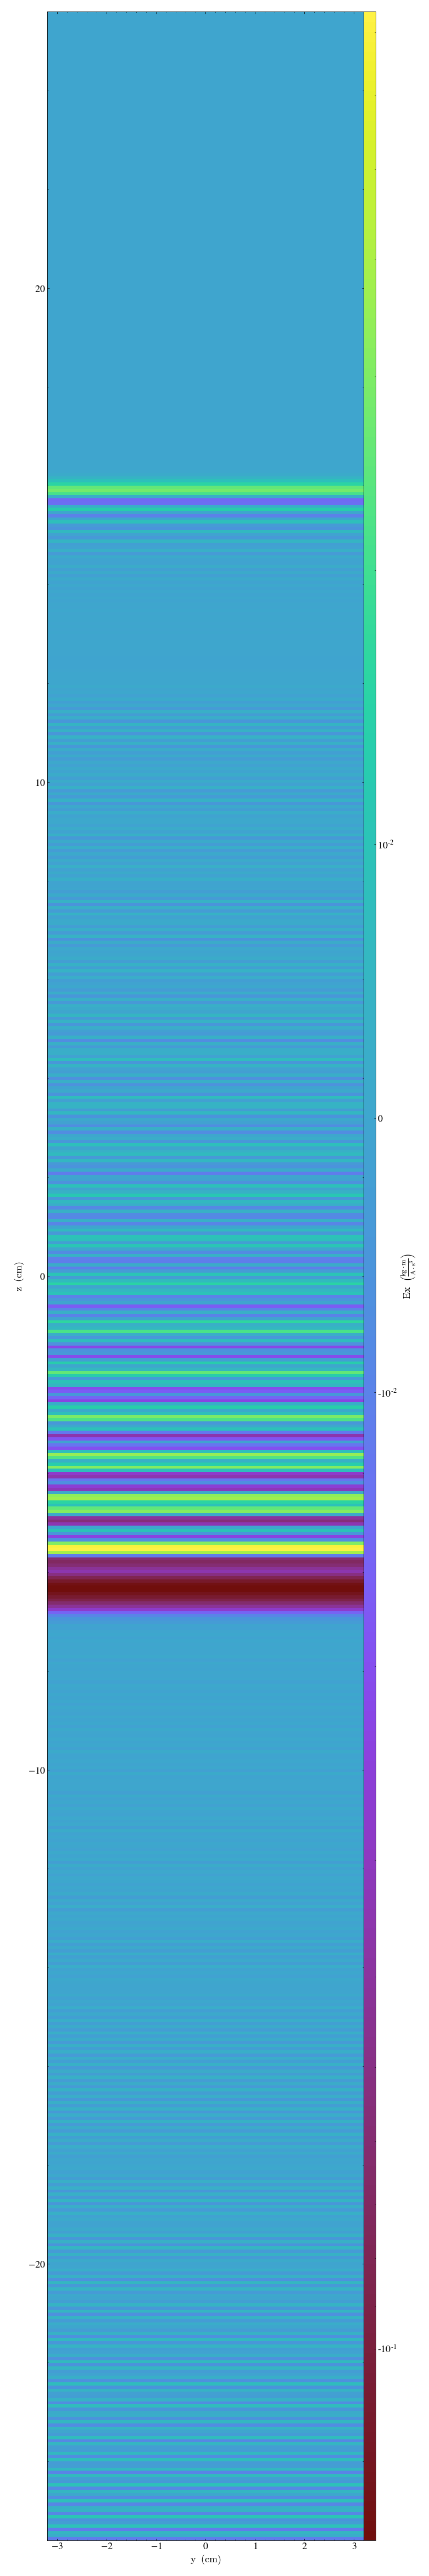


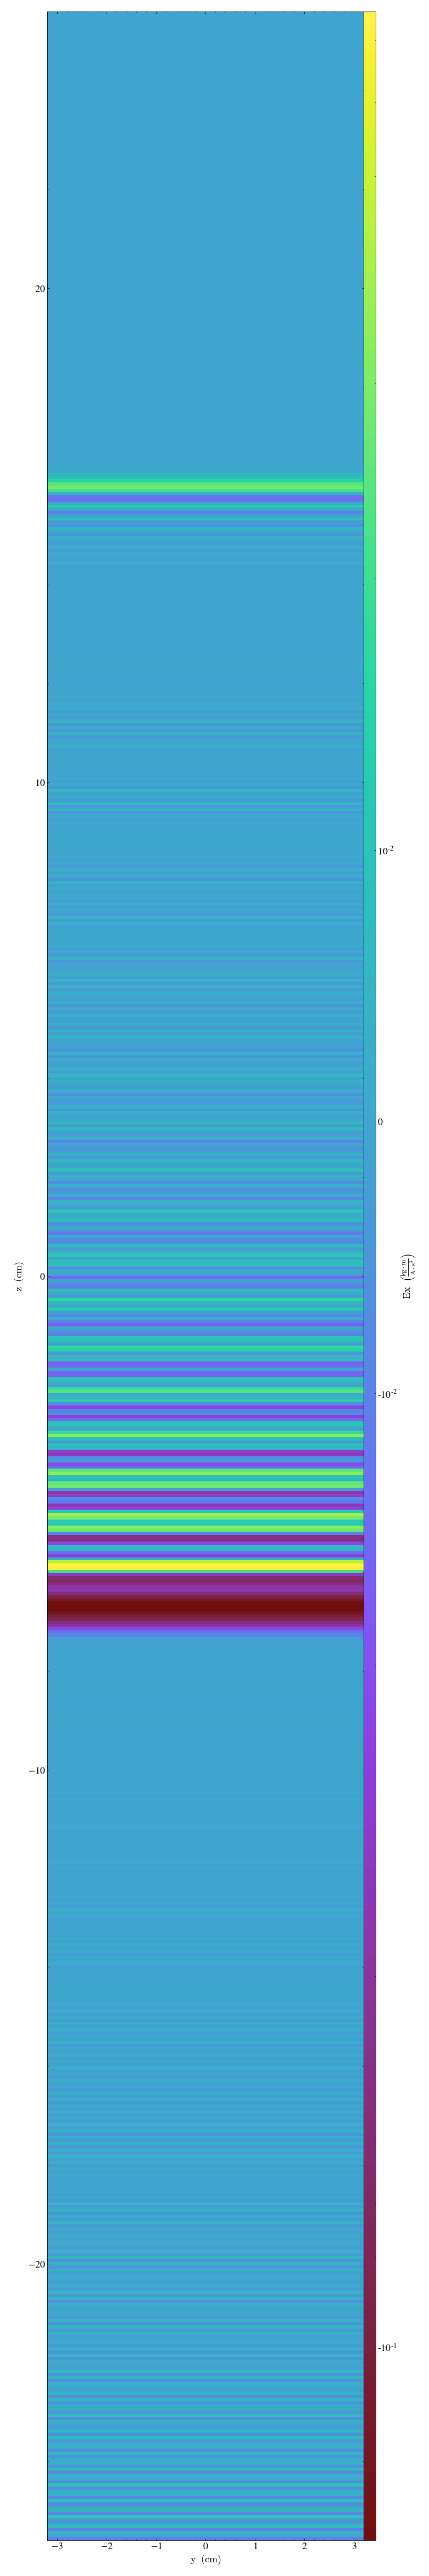


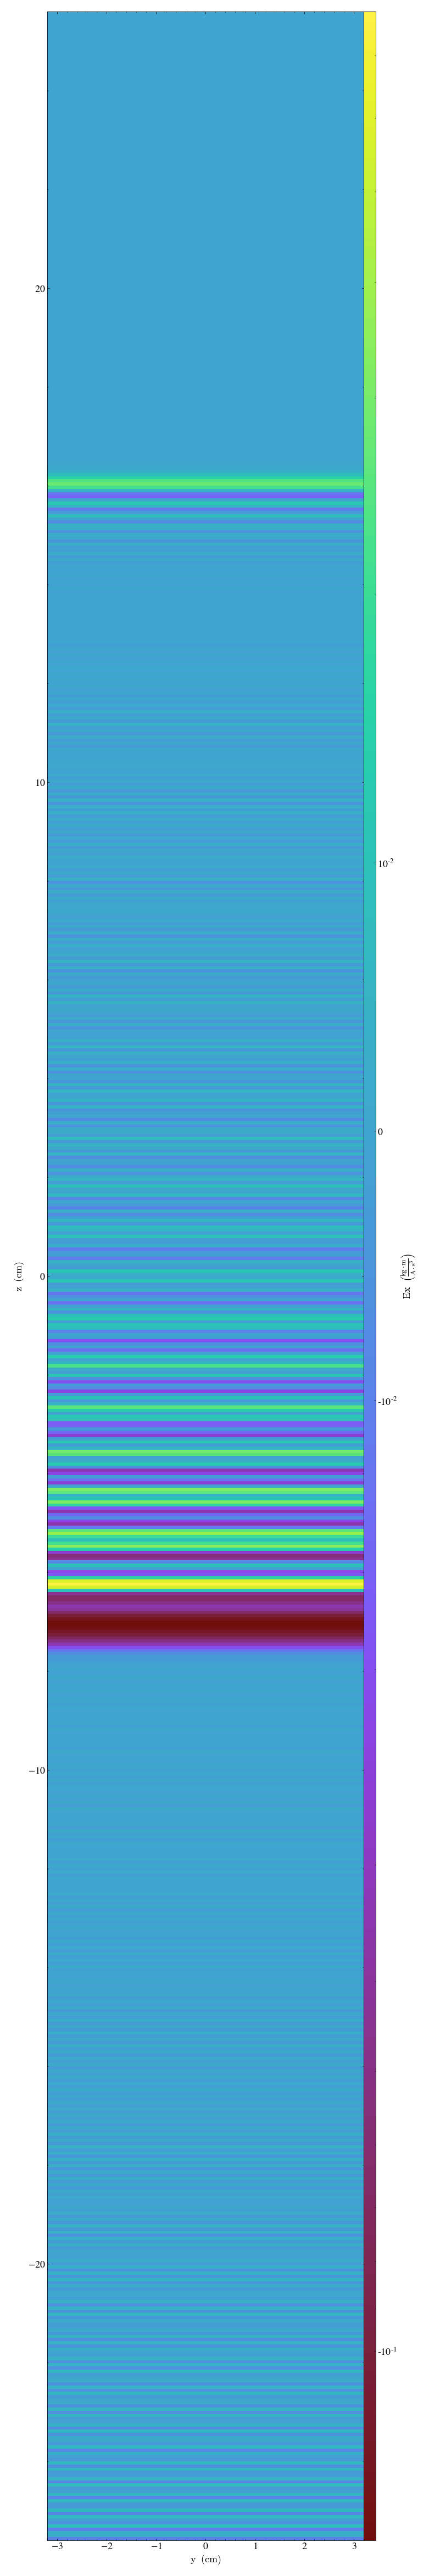


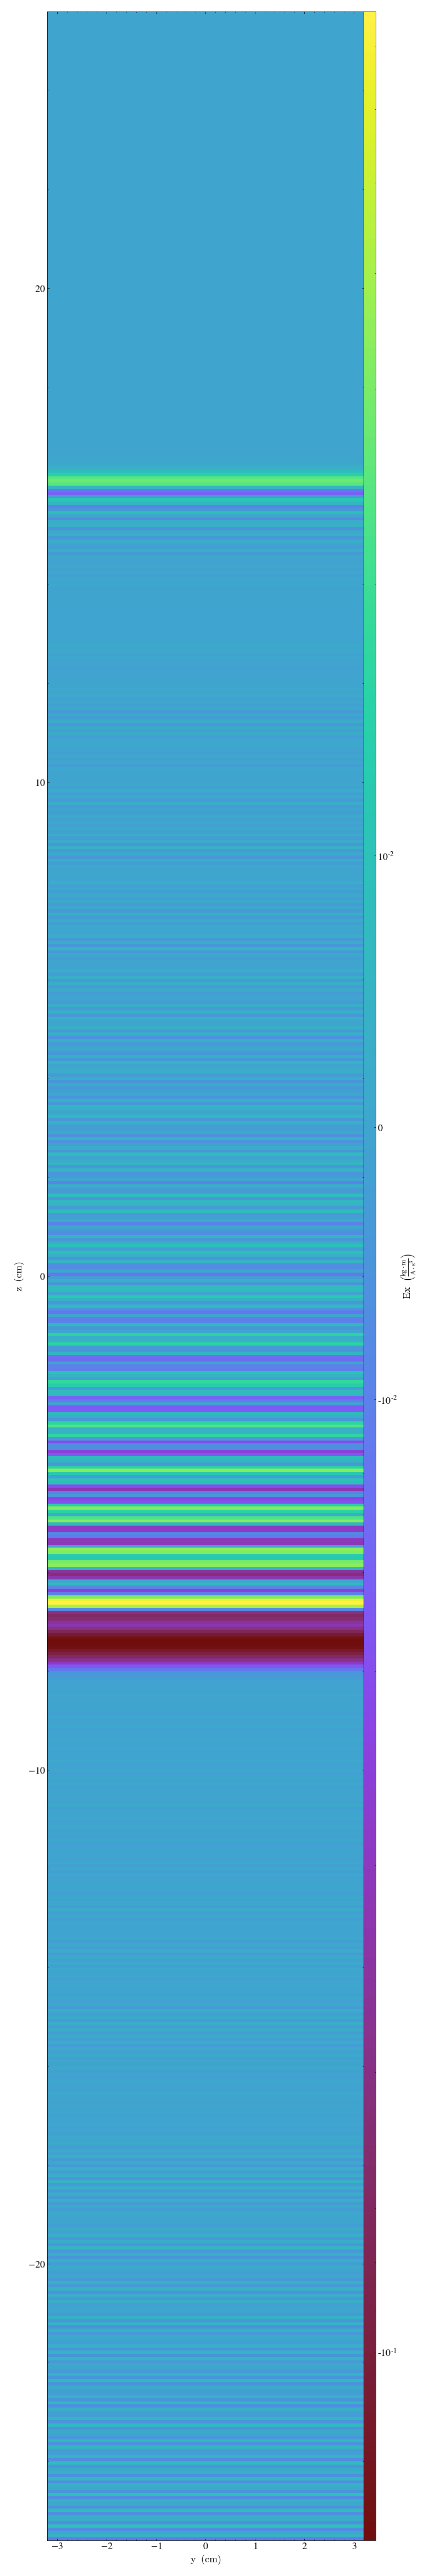


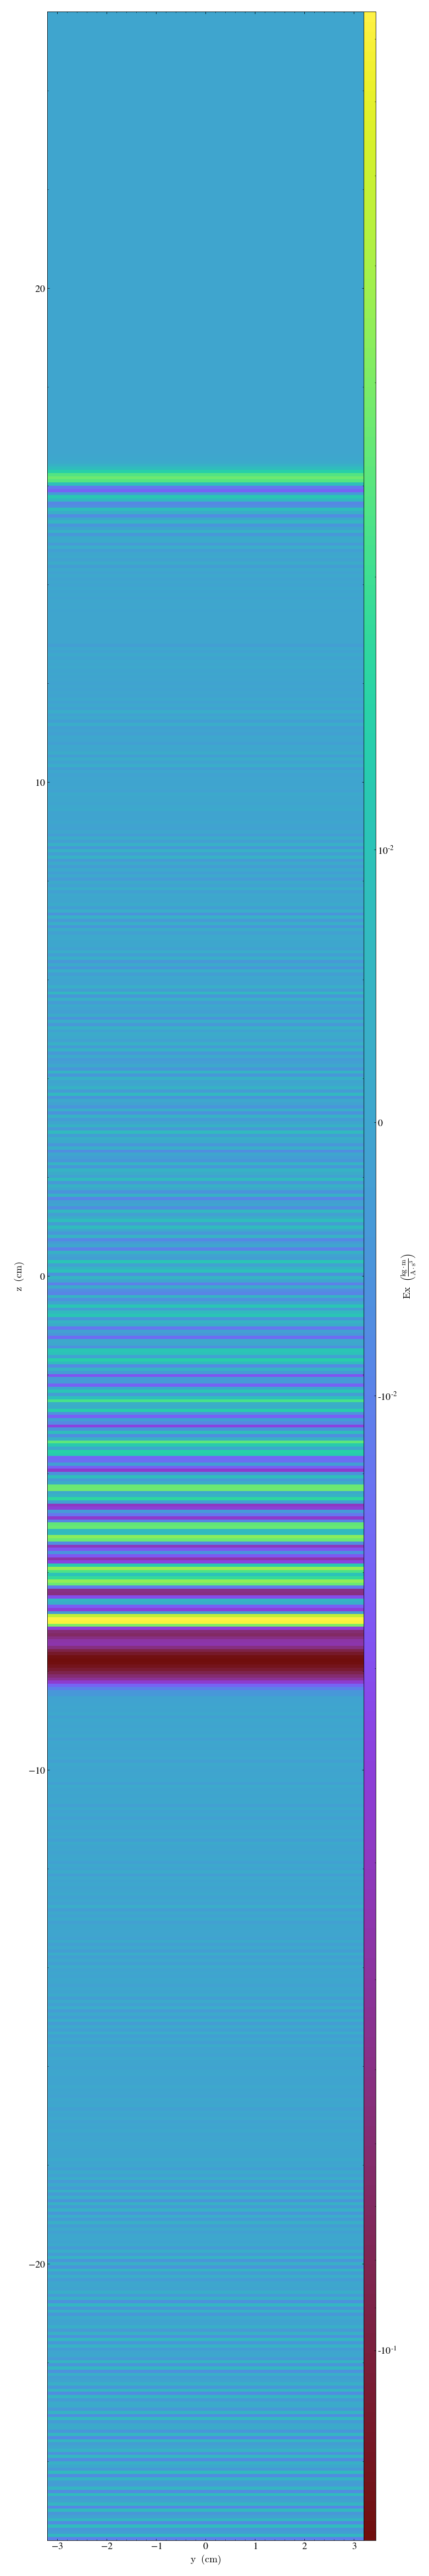


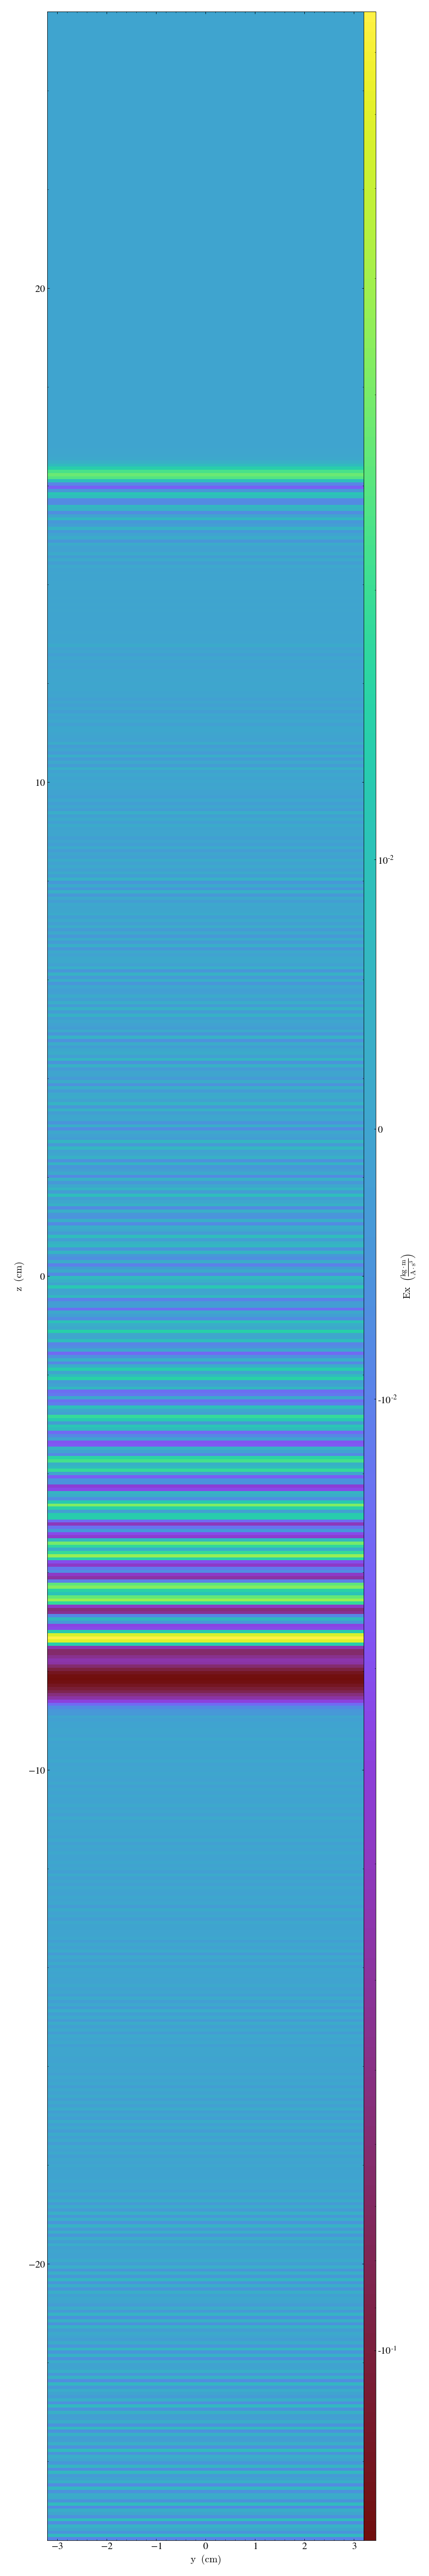


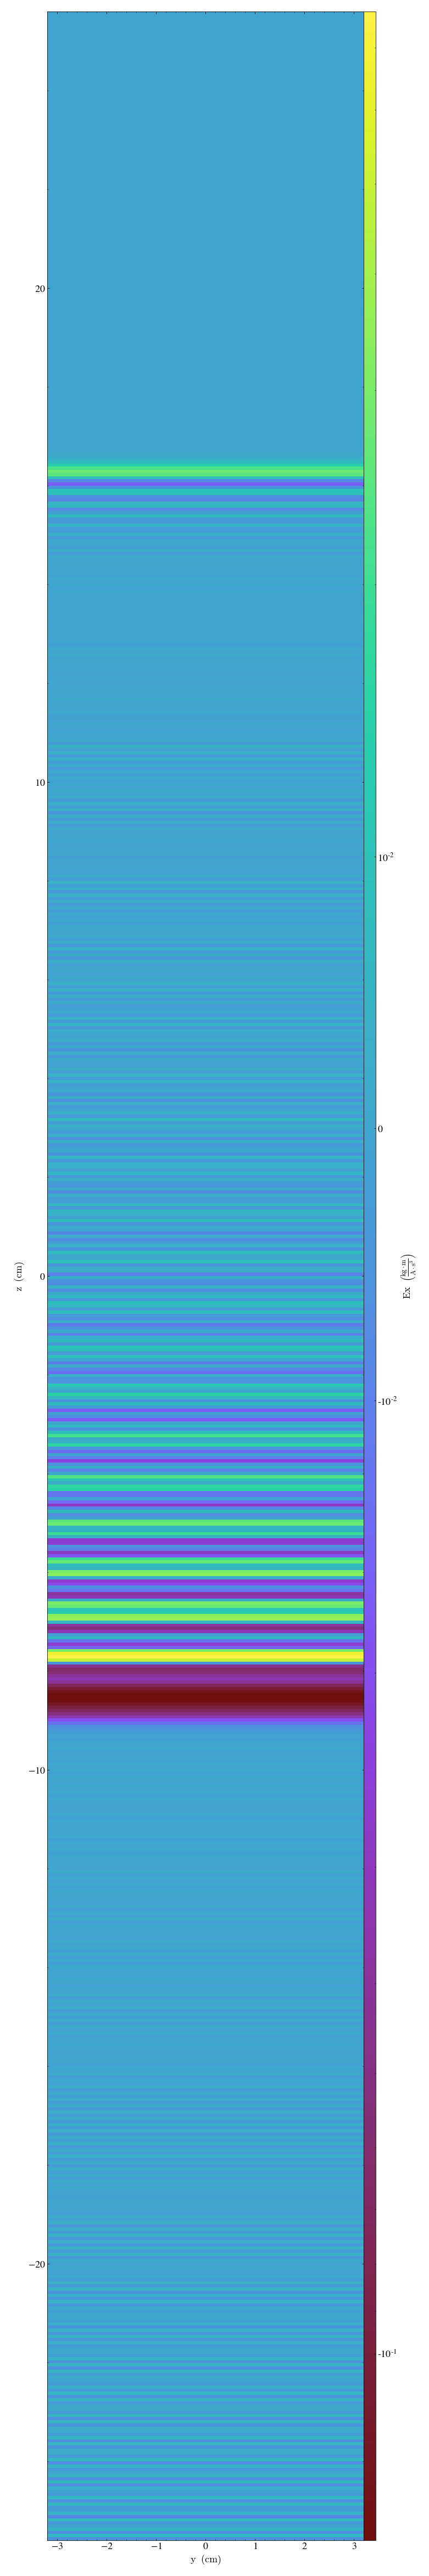


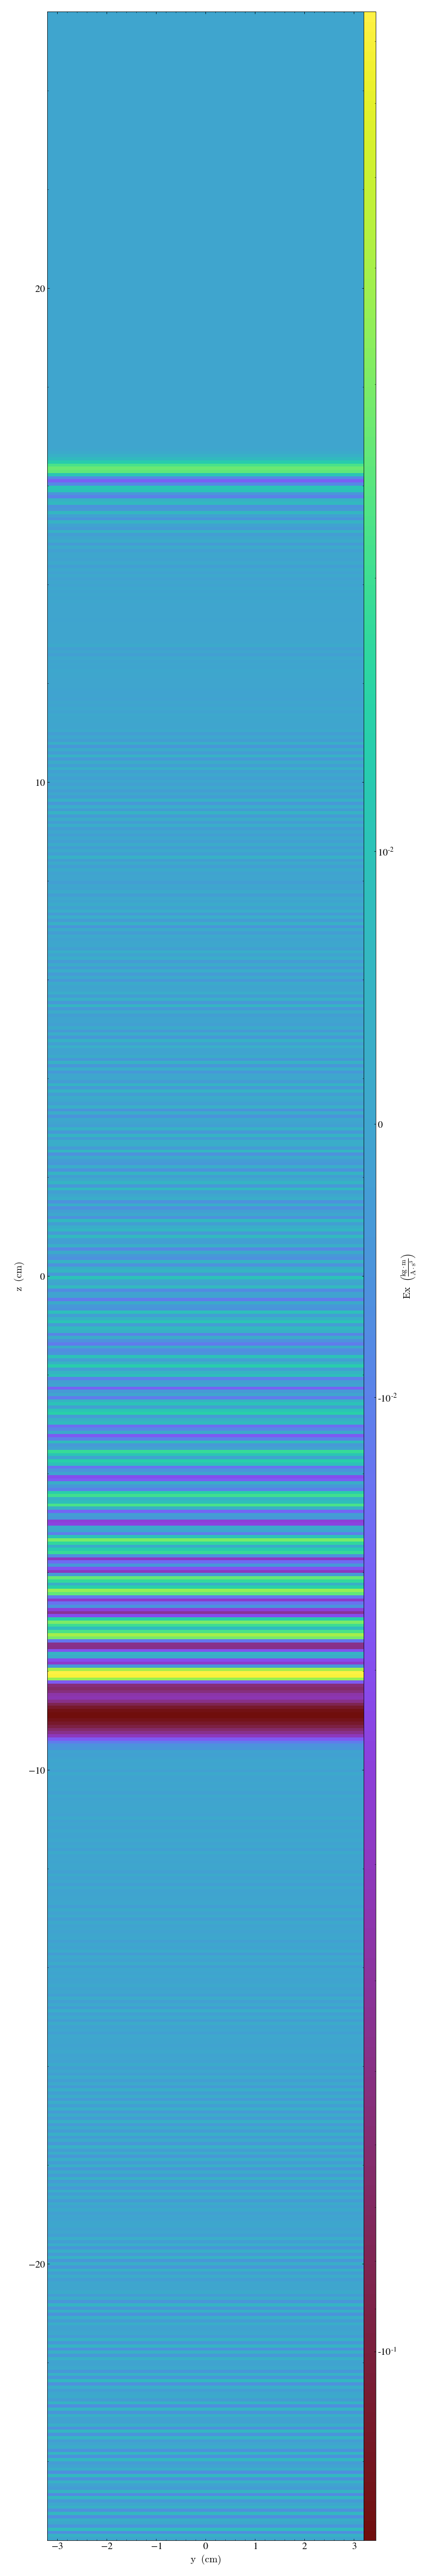


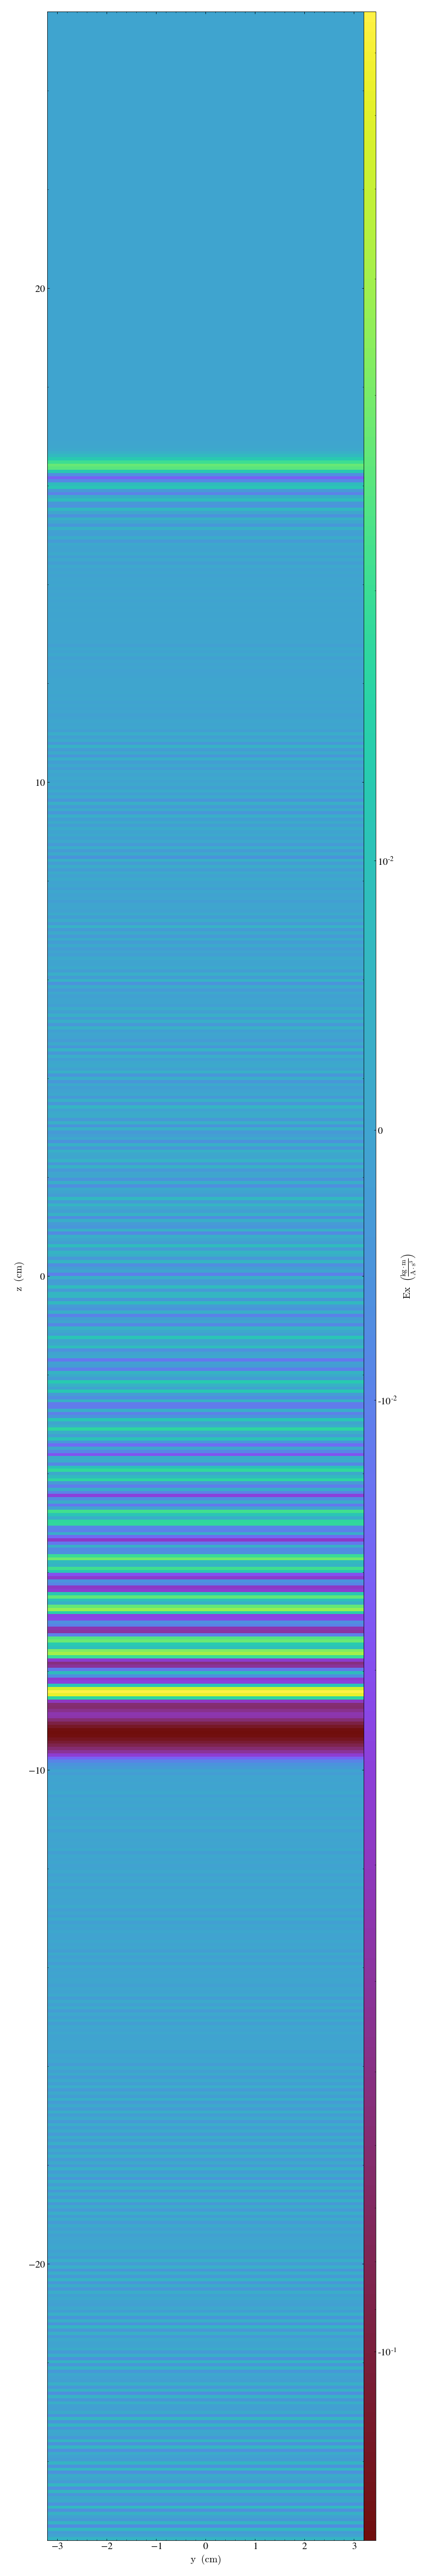


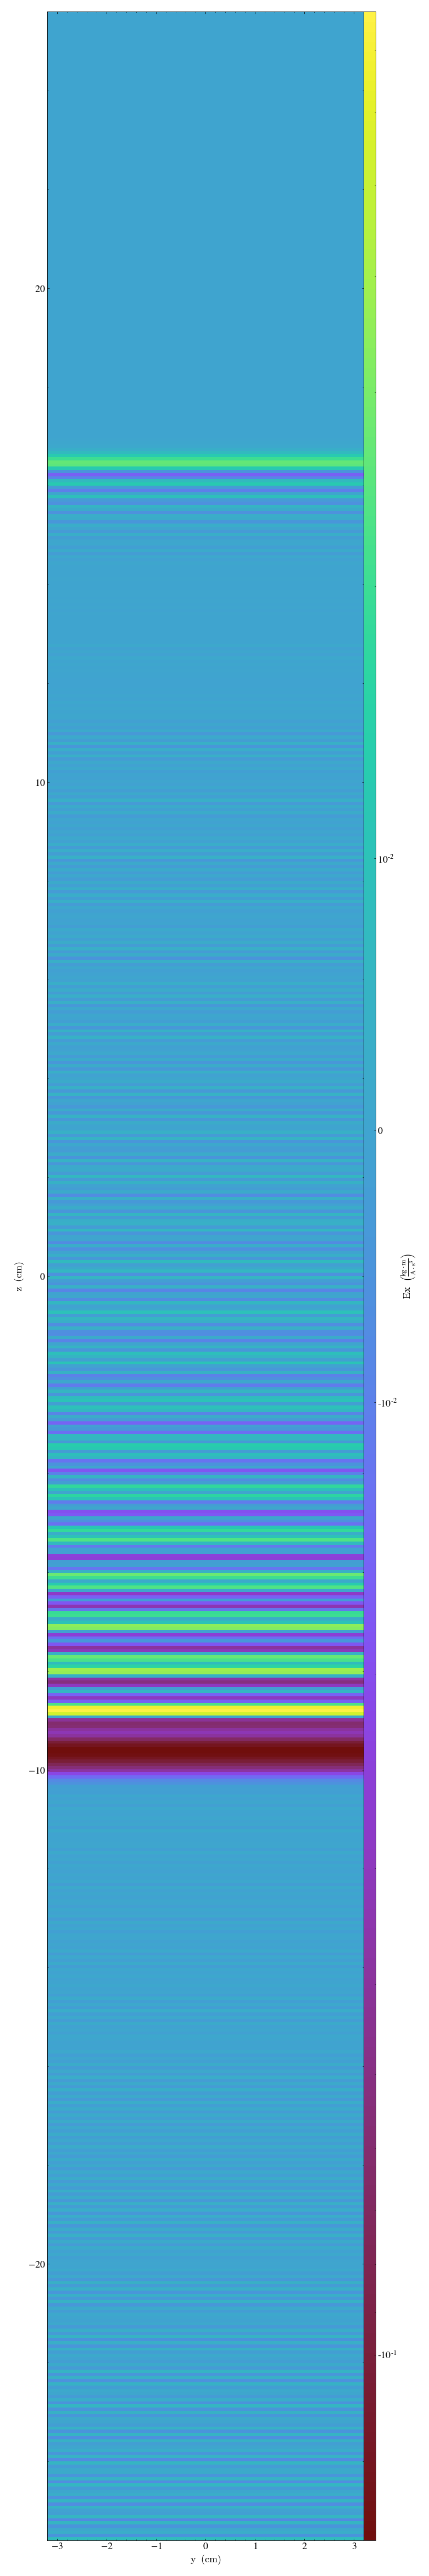


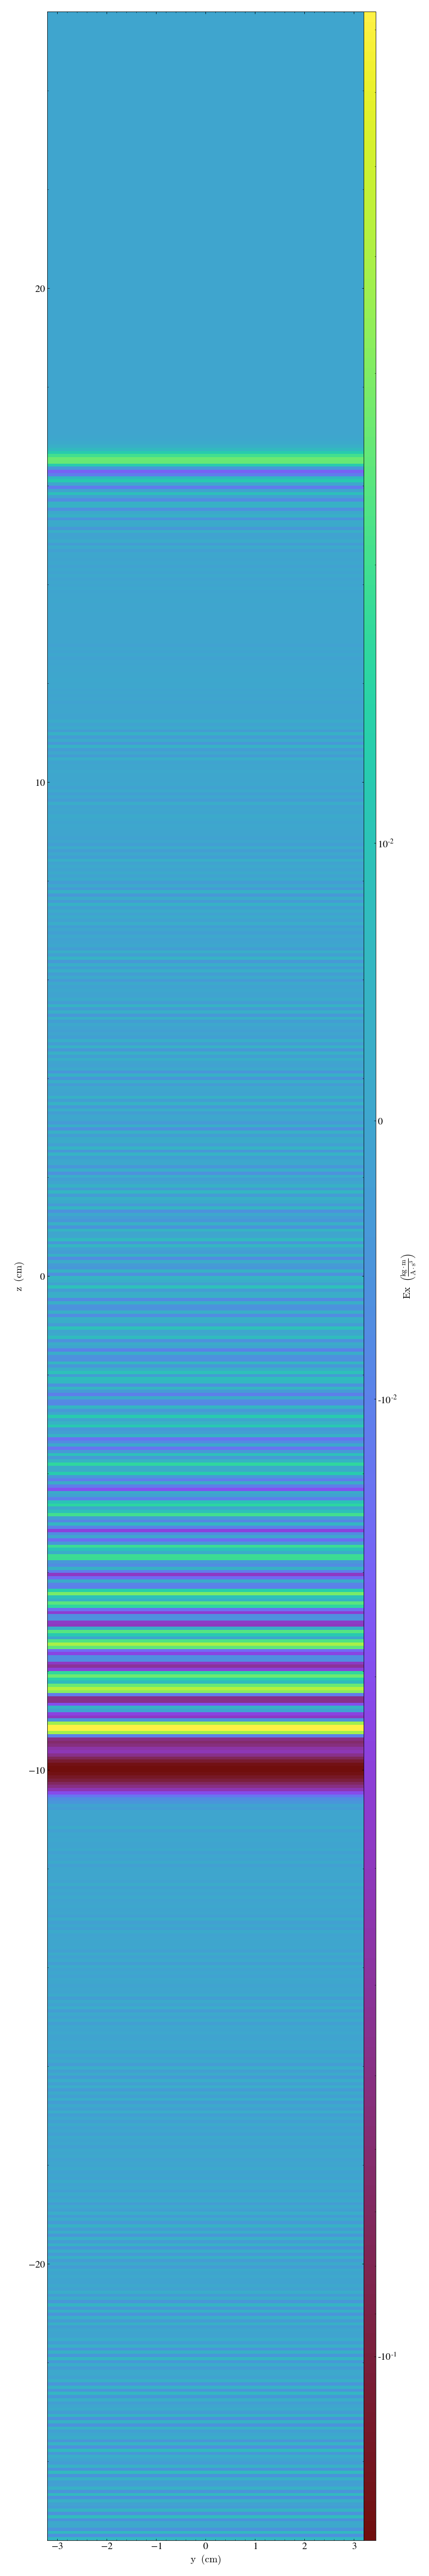

speed of light in vacuum 299694109.563299
speed of light in media (49949018.260549836+0j)
frequency =  9365440923.853092
propagation const =  1178.0972450961722j
intrinsic impedance =  (376.60672517127796+0j)
tranmission coef =  (0.9994899225591466+0j)
reflection coef = (-0.0005100774408534152+0j)
observation time point 250
observation point z = 0.1
attenuation term =  1.0


In [14]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
import cmath
import os
#%matplotlib notebook
iteration = 0
dt_iter = 10
while iteration < 1001 :
    ds = yt.load( './diags/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    sl = yt.SlicePlot(ds,0,'Ex', aspect=1)
    sl.show()
    sl.save(str(iteration).zfill(5)+'_slice_.png')
    iteration = iteration + dt_iter
    
wavelength = 32.e-3
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
epr = 6
mur = 6
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
sigma = 0 # conductivity of media
gamma = 1j*omega*math.sqrt(mur*epr*mu0*epsilon0)*cmath.sqrt(1-1j*sigma/omega/epr/epsilon0)
eta = 1j*omega*mur*mu0/gamma # intrinsic impedance of media
#eta = math.sqrt(mu0*mur/epr/epsilon0)
c = 1/cmath.sqrt(mu0*mur*(epr*epsilon0-1j*sigma/omega)) #speed of light in media
dt = 1.225592745e-12
#z_obs = 128e-3
#nt = z_obs/c0/dt
nt = 250
z_obs = nt*dt*np.real(c)
z_obs = 0.1
print("speed of light in vacuum", c0)
print("speed of light in media", c)
print("frequency = ", omega/2/math.pi)
print("propagation const = ", gamma)
print("intrinsic impedance = ", eta)
print("tranmission coef = ", 2*eta/(eta+120*math.pi))
print("reflection coef =", (eta-120*math.pi)/(eta+120*math.pi))
print("observation time point", nt)
print("observation point z =", z_obs)
print("attenuation term = ", math.exp(-np.real(gamma)*z_obs))